# Filter Prices

In [1]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from fuzzywuzzy import fuzz
import re

In [2]:
filtered_df = pd.read_csv("../Dataset/New_Data/4_bare_land_filtered_df.csv", low_memory=False)

In [3]:
filtered_df = filtered_df.drop(filtered_df[filtered_df['main_city'] == 'Colombo 11'].index)

In [4]:
filtered_df = filtered_df[filtered_df['main_city'] != 'Kadawatha']

In [5]:
pd.set_option("display.max_rows", 10)
filtered_df

ad_id     UID            street          city   
0       232745   71194      Fussels lane     Colombo 6  \
1       237182   29192     Highlevel Rd.      Nugegoda   
2       245752   71194    Karshue Avenue     Colombo 8   
3       251172   17540               NaN  Battaramulla   
4       253432   71194       Cotta Road      Colombo 8   
...        ...     ...               ...           ...   
42958  5528437  193404               NaN   Kahathuduwa   
42959  5410000   53682     Hospital Road      Dehiwala   
42960  5446833  120689            Malabe        Malabe   
42961  5447305  195582         madapatha   Piliyandala   
42962  5520807    3905  Anganpitiya Road   Ethul Kotte   

                                                 heading   
0                       Ideal plot of land in Colombo 06  \
1      Excellent Block Of 69 Perches Facing Highlevel...   
2                       6 perch land at Borella for sale   
3      56.7P Land Directly Overlooking Parliment Grou...   
4                              Land for sale in Borella    
...                                                  ...   
42958               Land For Sale In Near To Kahathuduwa   
42959               Land for Sale in Dehiwela Kalubowila   
42960                           Commercial Land For Sale   
42961              Land for Sale in Kahapola-Piliyandala   
42962                           70 perch land sale kotte   

                                                    desc      posted_date   
0      The perfect plot of land for your residence in...  1/19/2018 18:48  \
1      This Valuable Block is Located Next to Prime L...   2/23/2018 0:33   
2      The perfect location to build your dream home ...   5/8/2018 13:44   
3      ?Our Reference No. SL 8551<br />\n<br />\n(Ple...  6/25/2018 10:26   
4      The perfect plot of land for your business or ...  7/12/2018 14:46   
...                                                  ...              ...   
42958  ?120 ප්‍රධාන බස් පාරගයට මීටර 30ක දුරකි..<br />...   8/10/2023 8:50   
42959  Land for Sale in Dehiwela Kalubowila, 19.5p, P...    1/3/2023 8:45   
42960  Address: Kaduwela Main Road (New Kandy Road), ...   3/12/2023 2:49   
42961  Valuable Land situated at the Kahapola junctio...   3/12/2023 9:29   
42962  70 P Land for SALE in Ethukotte ( sri jayawarr...   7/29/2023 9:10   

           price price_type  price_land_pp  ...  land_shape  city_no   
0       45000000  Per Perch     45000000.0  ...         NaN        6  \
1       10000000  Per Perch     10000000.0  ...      Square       27   
2       42000000                 7000000.0  ...         NaN        8   
3      141750000                 2500000.0  ...         NaN     1710   
4       65000000                 7926829.0  ...         NaN        8   
...          ...        ...            ...  ...         ...      ...   
42958     875000  Per Perch       875000.0  ...         NaN     5128   
42959    4000000  Per Perch      4000000.0  ...         NaN       24   
42960   23250000  Per Perch     23250000.0  ...    triangle       69   
42961     675000  Per Perch       675000.0  ...   rectangle       36   
42962    3000000  Per Perch      3000000.0  ...         NaN     1994   

          city_name                 alt_name  city_lat   city_lon  g_city_lat   
0         Colombo 6   Wellawatte / Pamankada  6.874691  79.860748    6.874691  \
1          Nugegoda                      NaN  6.864908  79.899681    6.864908   
2         Colombo 8                  Borella  6.914720  79.877800    6.912180   
3      Battaramulla                      NaN  6.898378  79.922256    6.897994   
4         Colombo 8                  Borella  6.914720  79.877800    6.912180   
...             ...                      ...       ...        ...         ...   
42958   Kahathuduwa                      NaN  6.782298  79.994797    6.782298   
42959      Dehiwala                 Dehiwela  6.830119  79.880081    6.830119   
42960        Malabe                  Malambe  6.906079  79.969627    6.9

In [6]:
def filter_outliers(city_data):
    ordered_data = sorted(city_data)
    median = ordered_data[len(ordered_data) // 2]
    range_threshold = median * 0.25

    ordered_data_tail = [value for value in ordered_data if value < median]

    ordered_data_head = [value for value in ordered_data if value >= median]

    new_dataset_indexes = [] 

    lower_bound, upper_bound = median - range_threshold, median + range_threshold

    for idx, value in reversed(list(city_data[city_data < median].items())):
        if lower_bound <= value:
            new_dataset_indexes.append(idx)
            lower_bound = value - range_threshold

    for idx, value in city_data[city_data >= median].items():
        if value <= upper_bound:
            new_dataset_indexes.append(idx)
            upper_bound = value + range_threshold

    return new_dataset_indexes

result_df = pd.DataFrame()

for city in filtered_df['main_city'].unique():
   
    city_data = filtered_df[filtered_df['main_city'] == city]['price_land_pp']
    
    filtered_city_indexes = filter_outliers(city_data)
    
    city_df = filtered_df.loc[filtered_city_indexes].copy()
    
    result_df = pd.concat([result_df, city_df], ignore_index=False)

result_df_sorted = result_df.sort_index()

price_filtered_df = result_df_sorted.reset_index(drop=True)

In [7]:
pd.set_option("display.max_rows", 10)
price_filtered_df

ad_id     UID            street          city   
0       245752   71194    Karshue Avenue     Colombo 8  \
1       251172   17540               NaN  Battaramulla   
2       253432   71194       Cotta Road      Colombo 8   
3       254226   71194   Clifford place      Colombo 4   
4       254241   71194    Clifford place     Colombo 4   
...        ...     ...               ...           ...   
27354  5527062  193404               NaN       Kesbewa   
27355  5528131  193404               NaN   Piliyandala   
27356  5410000   53682     Hospital Road      Dehiwala   
27357  5447305  195582         madapatha   Piliyandala   
27358  5520807    3905  Anganpitiya Road   Ethul Kotte   

                                                 heading   
0                       6 perch land at Borella for sale  \
1      56.7P Land Directly Overlooking Parliment Grou...   
2                              Land for sale in Borella    
3                       Large plot of land at Colombo 04   
4                    Plot of land for sale at Colombo 04   
...                                                  ...   
27354                        Best Plots for sale-Kesbewa   
27355                  Luxury Land for Sale -Piliyandala   
27356               Land for Sale in Dehiwela Kalubowila   
27357              Land for Sale in Kahapola-Piliyandala   
27358                           70 perch land sale kotte   

                                                    desc      posted_date   
0      The perfect location to build your dream home ...   5/8/2018 13:44  \
1      ?Our Reference No. SL 8551<br />\n<br />\n(Ple...  6/25/2018 10:26   
2      The perfect plot of land for your business or ...  7/12/2018 14:46   
3      The perfect location to build your dream home ...  7/19/2018 12:16   
4      The perfect plot of land for your business or ...  7/19/2018 13:44   
...                                                  ...              ...   
27354  කැස්බෑව නගරයට අතේ දුරින් <br />\n<br />\nනව ඉඩ...   8/8/2023 10:07   
27355  පිලියන්දල,කැස්බෑව නගරයන්ට මැදිව <br />\n<br />...    8/9/2023 3:40   
27356  Land for Sale in Dehiwela Kalubowila, 19.5p, P...    1/3/2023 8:45   
27357  Valuable Land situated at the Kahapola junctio...   3/12/2023 9:29   
27358  70 P Land for SALE in Ethukotte ( sri jayawarr...   7/29/2023 9:10   

           price price_type  price_land_pp  ...  land_shape  city_no   
0       42000000                 7000000.0  ...         NaN        8  \
1      141750000                 2500000.0  ...         NaN     1710   
2       65000000                 7926829.0  ...         NaN        8   
3      297000000                10000000.0  ...         NaN        4   
4       99000000                10000000.0  ...         NaN        4   
...          ...        ...            ...  ...         ...      ...   
27354    1000000  Per Perch      1000000.0  ...         NaN       73   
27355    1000000  Per Perch      1000000.0  ...         NaN       36   
27356    4000000  Per Perch      4000000.0  ...         NaN       24   
27357     675000  Per Perch       675000.0  ...   rectangle       36   
27358    3000000  Per Perch      3000000.0  ...         NaN     1994   

          city_name            alt_name  city_lat   city_lon  g_city_lat   
0         Colombo 8             Borella  6.914720  79.877800    6.912180  \
1      Battaramulla                 NaN  6.898378  79.922256    6.897994   
2         Colombo 8             Borella  6.914720  79.877800    6.912180   
3         Colombo 4       Bambalapitiya  6.896134  79.857147    6.896134   
4         Colombo 4       Bambalapitiya  6.896134  79.857147    6.896134   
...             ...                 ...       ...        ...         ...   
27354       Kesbewa   Kesbawa / Kasbawa  6.778670  79.947250    6.778670   
27355   Piliyandala                 NaN  6.801757  79.922729    6.801757   
27356      Dehiwala            Dehiwela  6.830119  79.880081    6.830119   
27357   Piliyandala                 NaN  

In [8]:
output_csv_path = '../Dataset/New_Data/7_price_filtered.csv' 
price_filtered_df.to_csv(output_csv_path, index=False)

In [14]:
aggregations = {
    'price_land_pp': ['min', 'max', 'mean', 'std', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]
}

# Remove trailing spaces from 'main_city' column before grouping
price_filtered_df['main_city'] = price_filtered_df['main_city'].str.strip()

price_by_city = price_filtered_df.groupby('main_city').agg(aggregations)

price_by_city.columns = ['min_price', 'max_price', 'average_price', 'std_price', 'median_price', '25%_percentile', '75%_percentile']

price_by_city.reset_index(inplace=True)

price_by_city.fillna(0, inplace=True)  

pd.set_option('display.max_rows', None)

def format_millions(x):
    return '{:.3f}Mn'.format(x / 1e6)

pd.set_option('display.float_format', format_millions)

price_by_city


main_city  min_price  max_price  average_price  std_price   
0           Angoda    0.200Mn    1.160Mn        0.697Mn    0.224Mn  \
1     Athurugiriya    0.250Mn    1.300Mn        0.837Mn    0.249Mn   
2      Avissawella    0.074Mn    0.240Mn        0.171Mn    0.037Mn   
3     Battaramulla    0.800Mn    4.000Mn        2.459Mn    0.618Mn   
4    Boralesgamuwa    0.750Mn    2.800Mn        1.693Mn    0.378Mn   
5        Colombo 1    0.250Mn    0.685Mn        0.496Mn    0.140Mn   
6       Colombo 10    0.340Mn    0.704Mn        0.618Mn    0.049Mn   
7       Colombo 12    7.500Mn    8.500Mn        7.629Mn    0.278Mn   
8       Colombo 13    2.600Mn    7.083Mn        4.774Mn    1.150Mn   
9       Colombo 14    3.000Mn    9.000Mn        6.158Mn    1.562Mn   
10      Colombo 15    1.650Mn    4.717Mn        3.457Mn    0.628Mn   
11       Colombo 2   12.000Mn   25.000Mn       17.191Mn    2.613Mn   
12       Colombo 3    9.000Mn   28.000Mn       18.733Mn    3.291Mn   
13       Colombo 4    5.435Mn   30.000Mn       14.705Mn    3.105Mn   
14       Colombo 5    3.000Mn   13.500Mn        6.914Mn    1.782Mn   
15       Colombo 6    3.200Mn   14.286Mn        8.309Mn    1.882Mn   
16       Colombo 7    9.500Mn   25.000Mn       16.163Mn    2.517Mn   
17       Colombo 8    3.300Mn   12.000Mn        7.634Mn    1.747Mn   
18       Colombo 9    2.100Mn    6.065Mn        4.496Mn    0.973Mn   
19        Dehiwala    1.300Mn    5.700Mn        3.442Mn    0.680Mn   
20     Ethul Kotte    0.900Mn    4.500Mn        2.990Mn    0.711Mn   
21        Hanwella    0.048Mn    0.400Mn        0.301Mn    0.061Mn   
22       Hokandara    0.450Mn    1.850Mn        1.068Mn    0.319Mn   
23        Homagama    0.121Mn    0.884Mn        0.557Mn    0.106Mn   
24        Kaduwela    0.165Mn    0.565Mn        0.405Mn    0.067Mn   
25     Kahathuduwa    0.180Mn    0.800Mn        0.520Mn    0.109Mn   
26         Kesbewa    0.265Mn    1.200Mn        0.813Mn    0.185Mn   
27       Kolonnawa    0.350Mn    1.675Mn        0.944Mn    0.282Mn   
28         Kosgama    0.075Mn    0.700Mn        0.216Mn    0.127Mn   
29         Kottawa    0.375Mn    1.875Mn        1.086Mn    0.305Mn   
30      Maharagama    0.520Mn    3.000Mn        1.789Mn    0.407Mn   
31          Malabe    0.460Mn    2.500Mn        1.319Mn    0.347Mn   
32        Moratuwa    0.520Mn    2.000Mn        1.223Mn    0.293Mn   
33   Mount Lavinia    1.300Mn    4.643Mn        2.881Mn    0.559Mn   
34          Nawala    2.000Mn    6.500Mn        4.147Mn    0.788Mn   
35        Nugegoda    0.000Mn    5.273Mn        2.840Mn    0.727Mn   
36         Padukka    0.080Mn    0.450Mn        0.268Mn    0.041Mn   
37     Pannipitiya    0.420Mn    2.700Mn        1.830Mn    0.313Mn   
38     Piliyandala    0.240Mn    1.450Mn        0.812Mn    0.232Mn   
39      Pita Kotte    1.150Mn    4.306Mn        2.681Mn    0.636Mn   
40     Polgasowita    0.180Mn    0.950Mn        0.420Mn    0.082Mn   
41      Rajagiriya    0.000Mn    7.000Mn        3.581Mn    1.146Mn   
42      Rathmalana    1.000Mn    3.500Mn        1.961Mn    0.466Mn   
43       Thalagala    0.500Mn    0.662Mn        0.602Mn    0.063Mn   
44       Thalahena    0.800Mn    2.100Mn        1.428Mn    0.298Mn   
45      Thalangama    1.100Mn    2.700Mn        1.948Mn    0.408Mn   
46  Thalawathugoda    0.500Mn    3.000Mn        1.823Mn    0.415Mn   
47        Watareka    0.275Mn    0.550Mn        0.417Mn    0.035Mn   
48         Wattala    1.500Mn    1.500Mn        1.500Mn    0.000Mn   
49    Wellampitiya    0.400Mn    1.100Mn        0.769Mn    0.173Mn   

    median_price  25%_percentile  75%_percentile  
0        0.698Mn         0.539Mn         0.868Mn  
1        0.850Mn         0.650Mn         1.025Mn  
2        0.170Mn         0.139Mn         0.200Mn  
3        2.500Mn         2.000Mn         2.950Mn  
4        1.700Mn         1.400Mn         1.950Mn  
5        0.550Mn         0.380Mn         0.600Mn  
6        0.638Mn         0.600Mn         0.650Mn  
7        7.500Mn         7.500

In [9]:
output_csv_path = '../Dataset/New_Data/city_metrics.csv' 
price_by_city.to_csv(output_csv_path, index=False)

In [10]:
sorted_price_by_city = price_by_city.sort_values(by='average_price')

sorted_price_by_city

columns_to_keep = ['main_city', 'average_price', 'std_price']
city_avg_prices = sorted_price_by_city[columns_to_keep].copy()
city_avg_prices

main_city  average_price  std_price
3     Avissawella         0.156Mn    0.040Mn
2      Avissawella        0.173Mn    0.036Mn
29         Kosgama        0.183Mn    0.052Mn
39         Padukka        0.268Mn    0.041Mn
22        Hanwella        0.301Mn    0.061Mn
25        Kaduwela        0.405Mn    0.067Mn
51        Watareka        0.417Mn    0.035Mn
43     Polgasowita        0.420Mn    0.082Mn
6        Colombo 1        0.496Mn    0.140Mn
26     Kahathuduwa        0.520Mn    0.109Mn
24        Homagama        0.557Mn    0.106Mn
46       Thalagala        0.602Mn    0.063Mn
30        Kosgama         0.617Mn    0.076Mn
7       Colombo 10        0.618Mn    0.049Mn
0           Angoda        0.697Mn    0.224Mn
53    Wellampitiya        0.769Mn    0.173Mn
34         Malabe         0.797Mn    0.052Mn
41     Piliyandala        0.812Mn    0.232Mn
27         Kesbewa        0.813Mn    0.185Mn
1     Athurugiriya        0.837Mn    0.249Mn
28       Kolonnawa        0.944Mn    0.282Mn
23       Hokandara        1.068Mn    0.319Mn
31         Kottawa        1.086Mn    0.305Mn
35        Moratuwa        1.223Mn    0.293Mn
33          Malabe        1.321Mn    0.346Mn
47       Thalahena        1.428Mn    0.298Mn
52         Wattala        1.500Mn    0.000Mn
49     Thalangama         1.546Mn    0.290Mn
5    Boralesgamuwa        1.693Mn    0.378Mn
32      Maharagama        1.789Mn    0.407Mn
50  Thalawathugoda        1.823Mn    0.415Mn
40     Pannipitiya        1.830Mn    0.313Mn
45      Rathmalana        1.961Mn    0.466Mn
48      Thalangama        2.163Mn    0.279Mn
4     Battaramulla        2.459Mn    0.618Mn
42      Pita Kotte        2.681Mn    0.636Mn
38        Nugegoda        2.840Mn    0.727Mn
36   Mount Lavinia        2.881Mn    0.559Mn
21     Ethul Kotte        2.990Mn    0.711Mn
20        Dehiwala        3.442Mn    0.680Mn
11      Colombo 15        3.457Mn    0.628Mn
44      Rajagiriya        3.581Mn    1.146Mn
37          Nawala        4.147Mn    0.788Mn
19       Colombo 9        4.496Mn    0.973Mn
9       Colombo 13        4.774Mn    1.150Mn
10      Colombo 14        6.158Mn    1.562Mn
15       Colombo 5        6.914Mn    1.782Mn
8       Colombo 12        7.629Mn    0.278Mn
18       Colombo 8        7.634Mn    1.747Mn
16       Colombo 6        8.309Mn    1.882Mn
14       Colombo 4       14.705Mn    3.105Mn
17       Colombo 7       16.163Mn    2.517Mn
12       Colombo 2       17.191Mn    2.613Mn
13       Colombo 3       18.733Mn    3.291Mn

In [11]:
output_csv_path = '../Dataset/New_Data/7.1_city_average_prices.csv' 
city_avg_prices.to_csv(output_csv_path, index=False)

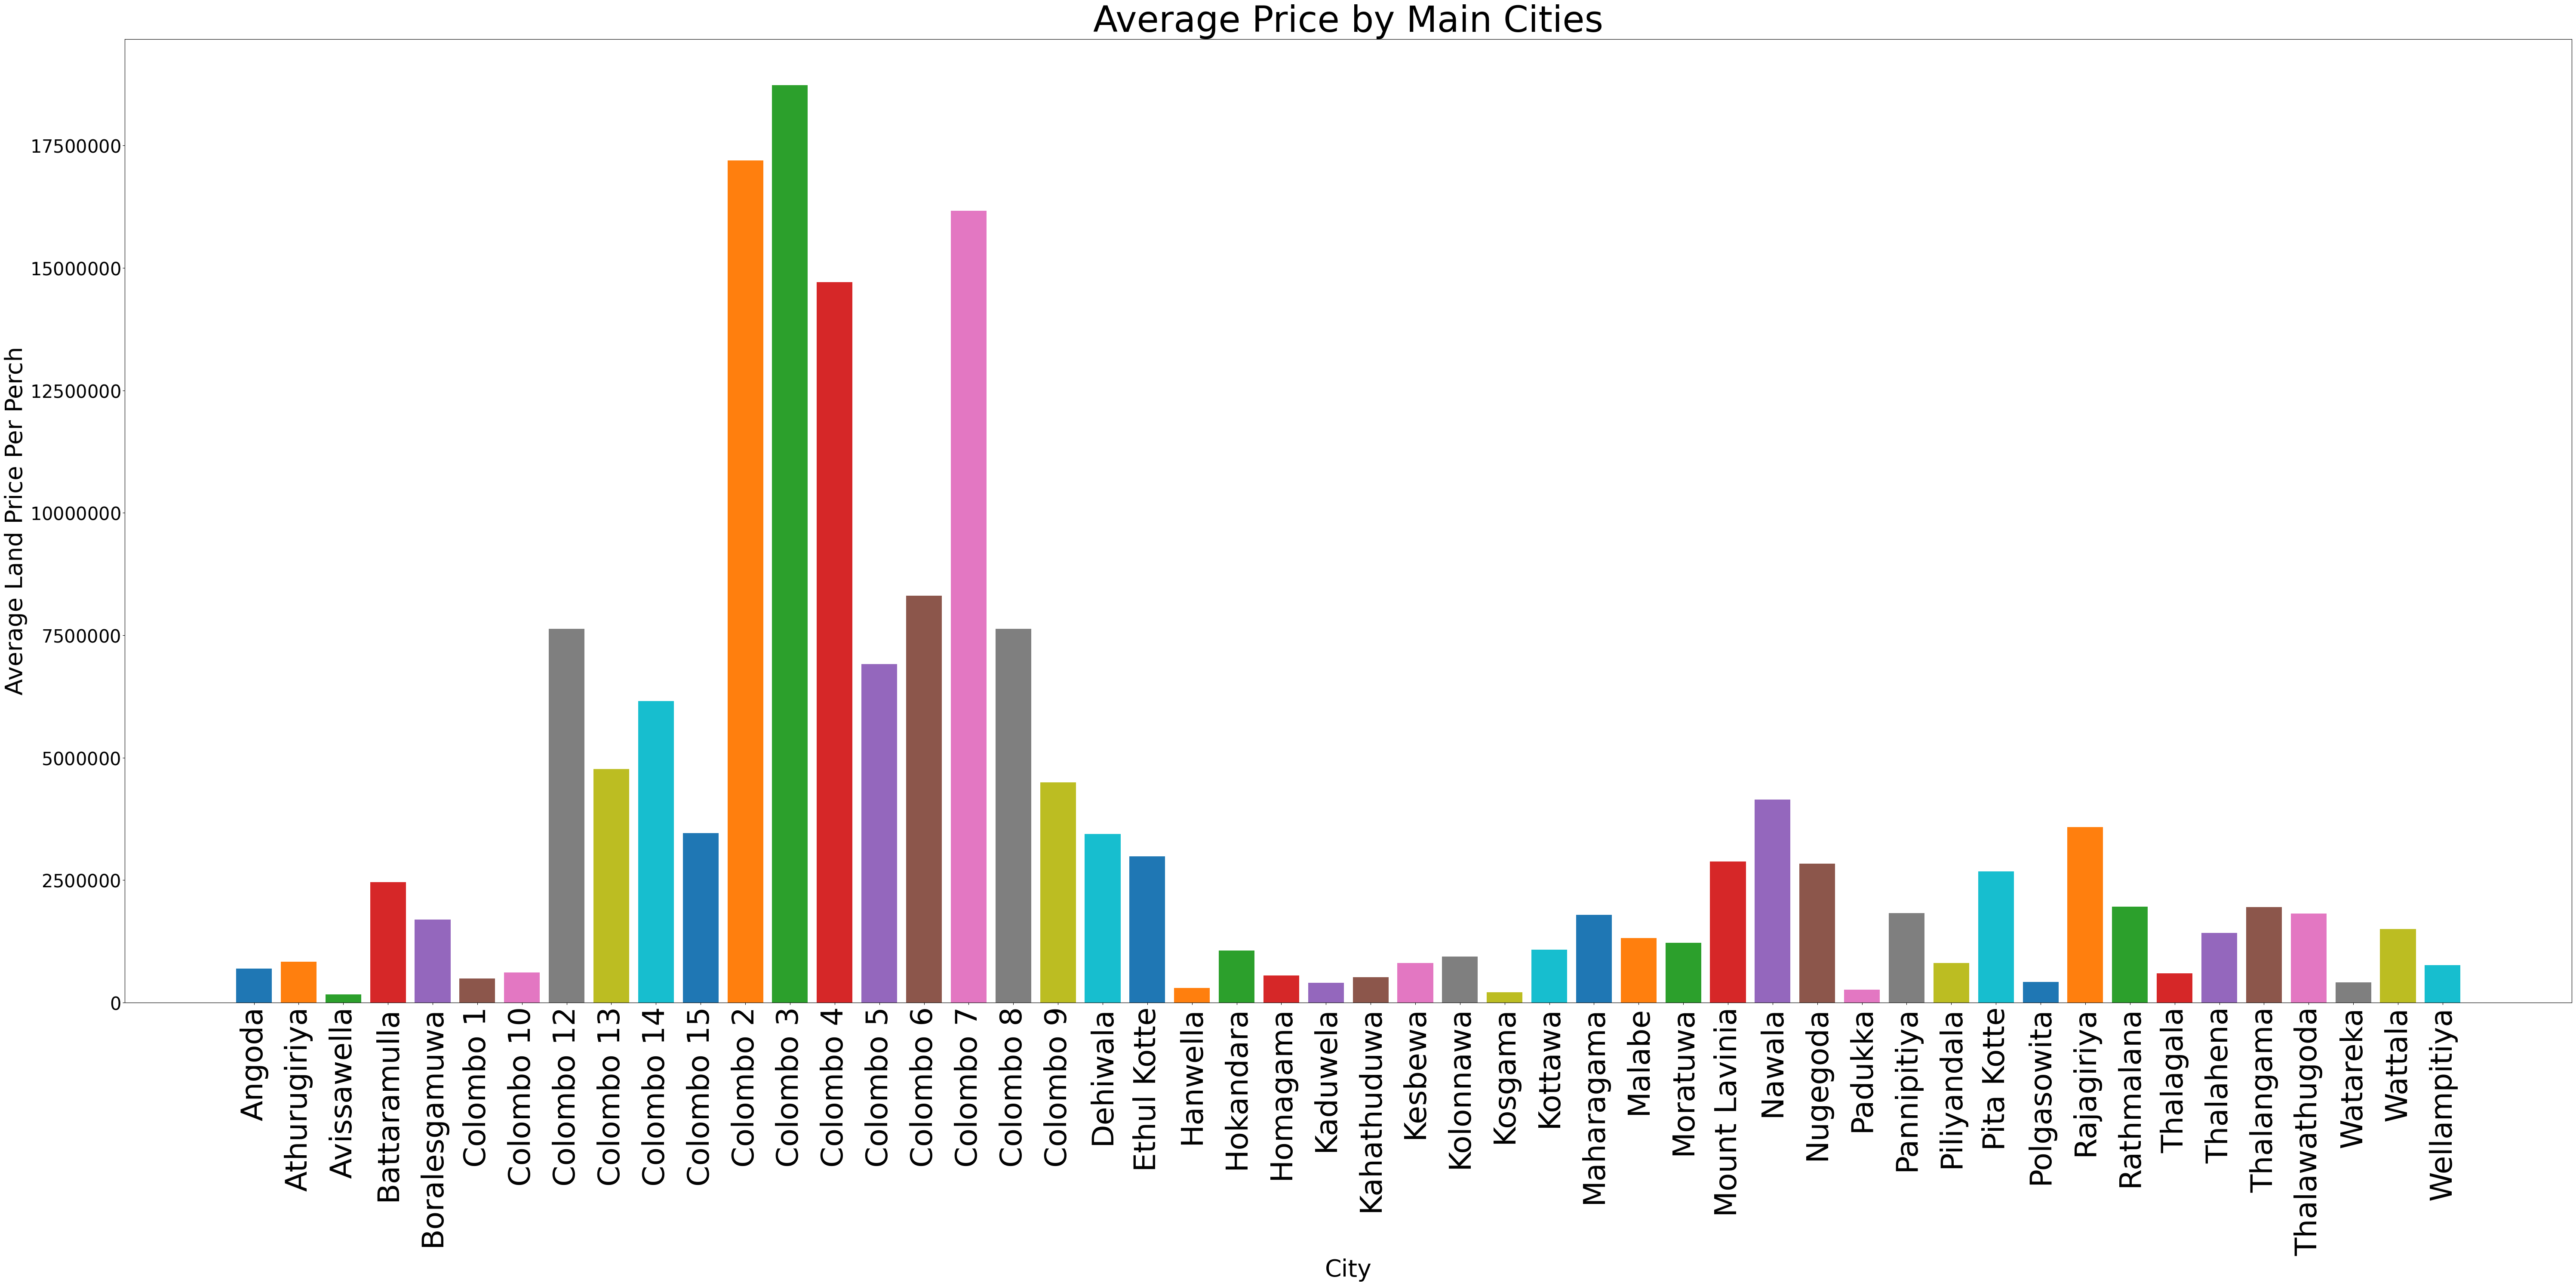

In [17]:
city_grouped = price_filtered_df.groupby('main_city')

plt.figure(figsize=(60, 30)) 

for name, group in city_grouped:
    filtered_data = group.dropna(subset=['price_land_pp'])
    plt.bar(name, filtered_data['price_land_pp'].mean())

plt.xlabel('City', fontsize=40)  
plt.ylabel('Average Land Price Per Perch', fontsize=40)  

plt.xticks(rotation=90, fontsize=50)  
plt.title('Average Price by Main Cities', fontsize=60)

plt.yticks(fontsize=30)  

plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='plain', axis='y')

plt.tight_layout()  
plt.show()

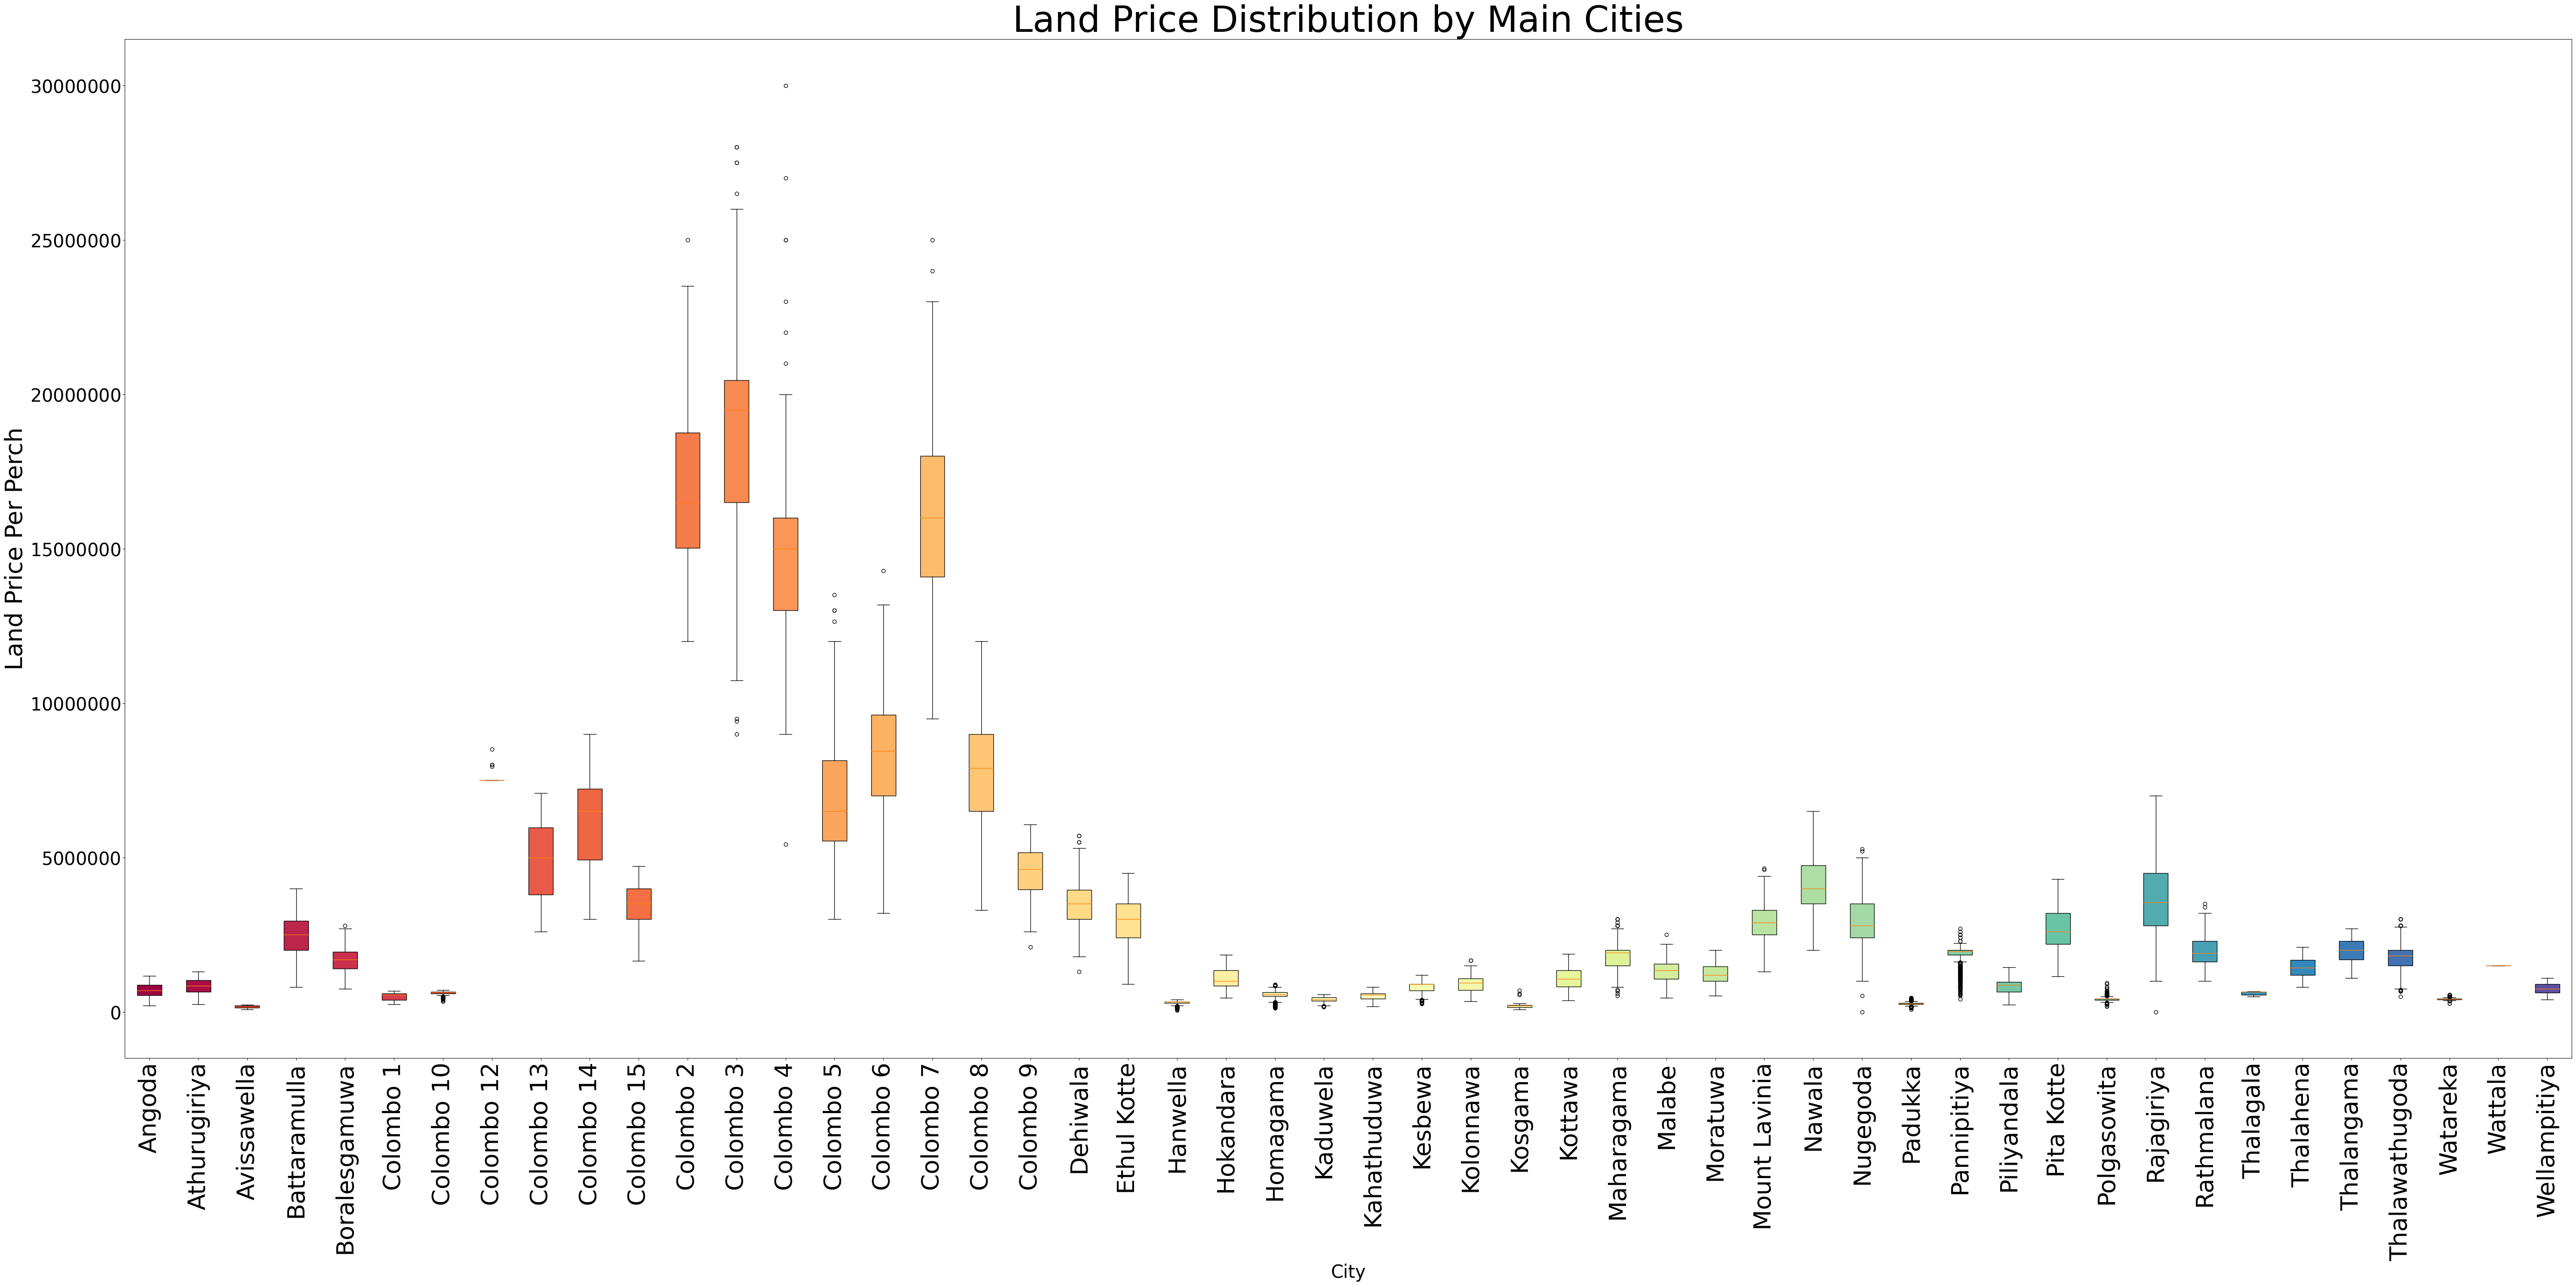

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'price_land_pp' is the column you want to create boxplots for

city_grouped = price_filtered_df.groupby('main_city')

plt.figure(figsize=(60, 30)) 

# Create an empty list to store data for boxplots
data_for_boxplots = []

for name, group in city_grouped:
    filtered_data = group.dropna(subset=['price_land_pp'])
    
    # Append the price_land_pp column to the list for boxplot
    data_for_boxplots.append(filtered_data['price_land_pp'])

# Generate colors for boxplots using a matplotlib colormap
cmap = plt.get_cmap('Spectral')
colors = cmap(np.linspace(0, 1, len(city_grouped)))

# Create boxplots with colors
boxplot = plt.boxplot(data_for_boxplots, labels=city_grouped.groups.keys(), vert=True, patch_artist=True)

# Set colors for the boxplots
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

plt.xlabel('City', fontsize=30)  
plt.ylabel('Land Price Per Perch', fontsize=40)  

plt.xticks(rotation=90, fontsize=40)  
plt.title('Land Price Distribution by Main Cities', fontsize=60)

plt.yticks(fontsize=30)  

plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='plain', axis='y')

plt.tight_layout()  
plt.show()


'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia',

### 2018

In [20]:
df = price_filtered_df

df['posted_date'] = pd.to_datetime(df['posted_date'], format='%m/%d/%Y %H:%M')

df_2018 = df[(df['posted_date'] >= '01/01/2018') & (df['posted_date'] <= '31/12/2018')]

city_stats = df_2018.groupby('main_city')['price_land_pp'].agg(['min', 'max', 'mean', 'std', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

city_stats.columns = ['min_price', 'max_price', 'mean_price', 'std_price', 'median_price', '25%_percentile', '75%_percentile']

city_stats.reset_index(inplace=True)

city_stats

main_city  min_price  max_price  mean_price  std_price  median_price   
0           Angoda    0.200Mn    1.000Mn     0.545Mn    0.207Mn       0.536Mn  \
1     Athurugiriya    0.250Mn    1.000Mn     0.501Mn    0.182Mn       0.443Mn   
2      Avissawella    0.085Mn    0.200Mn     0.136Mn    0.053Mn       0.129Mn   
3     Battaramulla    0.800Mn    4.000Mn     2.252Mn    0.618Mn       2.300Mn   
4    Boralesgamuwa    0.850Mn    2.400Mn     1.514Mn    0.417Mn       1.450Mn   
5       Colombo 10    0.425Mn    0.425Mn     0.425Mn        NaN       0.425Mn   
6       Colombo 12    7.500Mn    8.000Mn     7.750Mn    0.354Mn       7.750Mn   
7       Colombo 13    3.000Mn    5.867Mn     4.043Mn    0.880Mn       4.000Mn   
8       Colombo 14    4.000Mn    4.900Mn     4.450Mn    0.636Mn       4.450Mn   
9       Colombo 15    1.650Mn    3.500Mn     2.868Mn    0.579Mn       2.917Mn   
10       Colombo 2   15.000Mn   20.035Mn    16.442Mn    1.689Mn      16.250Mn   
11       Colombo 3    9.500Mn   26.000Mn    18.714Mn    3.512Mn      19.000Mn   
12       Colombo 4    9.000Mn   19.000Mn    14.689Mn    2.756Mn      15.000Mn   
13       Colombo 5    3.000Mn   10.745Mn     6.451Mn    1.744Mn       5.800Mn   
14       Colombo 6    6.000Mn   10.600Mn     8.412Mn    1.122Mn       8.162Mn   
15       Colombo 7   12.000Mn   22.000Mn    16.309Mn    2.324Mn      16.000Mn   
16       Colombo 8    3.800Mn   10.000Mn     7.569Mn    1.796Mn       7.500Mn   
17       Colombo 9    3.200Mn    3.941Mn     3.571Mn    0.524Mn       3.571Mn   
18        Dehiwala    1.300Mn    5.500Mn     3.193Mn    0.748Mn       3.100Mn   
19     Ethul Kotte    0.900Mn    4.000Mn     2.328Mn    0.685Mn       2.200Mn   
20        Hanwella    0.175Mn    0.320Mn     0.238Mn    0.047Mn       0.228Mn   
21       Hokandara    0.495Mn    1.225Mn     0.857Mn    0.180Mn       0.897Mn   
22        Homagama    0.121Mn    0.650Mn     0.376Mn    0.146Mn       0.350Mn   
23        Kaduwela    0.165Mn    0.500Mn     0.323Mn    0.094Mn       0.310Mn   
24         Kesbewa    0.265Mn    0.800Mn     0.578Mn    0.150Mn       0.600Mn   
25       Kolonnawa    0.700Mn    1.200Mn     0.912Mn    0.154Mn       0.887Mn   
26         Kosgama    0.075Mn    0.600Mn     0.254Mn    0.236Mn       0.170Mn   
27         Kottawa    0.438Mn    1.500Mn     0.877Mn    0.253Mn       0.815Mn   
28      Maharagama    0.520Mn    2.150Mn     1.293Mn    0.339Mn       1.310Mn   
29          Malabe    0.490Mn    1.750Mn     0.948Mn    0.312Mn       0.900Mn   
30        Moratuwa    0.520Mn    1.600Mn     1.055Mn    0.259Mn       1.000Mn   
31   Mount Lavinia    1.300Mn    3.500Mn     2.528Mn    0.464Mn       2.500Mn   
32          Nawala    2.000Mn    5.800Mn     3.725Mn    0.727Mn       3.600Mn   
33        Nugegoda    0.000Mn    4.500Mn     2.441Mn    0.791Mn       2.500Mn   
34         Padukka    0.180Mn    0.300Mn     0.249Mn    0.047Mn       0.250Mn   
35     Pannipitiya    0.530Mn    2.222Mn     1.357Mn    0.488Mn       1.450Mn   
36     Piliyandala    0.390Mn    1.200Mn     0.668Mn    0.194Mn       0.613Mn   
37      Pita Kotte    1.250Mn    3.200Mn     2.294Mn    0.588Mn       2.200Mn   
38     Polgasowita    0.250Mn    0.450Mn     0.336Mn    0.061Mn       0.325Mn   
39      Rajagiriya    1.100Mn    5.500Mn     3.597Mn    1.078Mn       3.600Mn   
40      Rathmalana    1.200Mn    2.300Mn     1.763Mn    0.311Mn       1.626Mn   
41       Thalahena    0.950Mn    1.600Mn     1.286Mn    0.234Mn       1.257Mn   
42      Thalangama    1.100Mn    1.100Mn     1.100Mn        NaN       1.100Mn   
43  Thalawathugoda    0.500Mn    2.400Mn     1.556Mn    0.320Mn       1.550Mn   
44        Watareka    0.450Mn    0.450Mn     0.450Mn        NaN       0.450Mn   
45    Wellampitiya    0.400Mn    0.750Mn     0.627Mn    0.097Mn       0.635Mn   

    25%_percentile  75%_percentile  
0          0.400Mn         0.605Mn  
1          0.388Mn         0.596Mn  
2          0.096Mn         0.168Mn  
3          1.800Mn         2.650Mn  
4          1.275

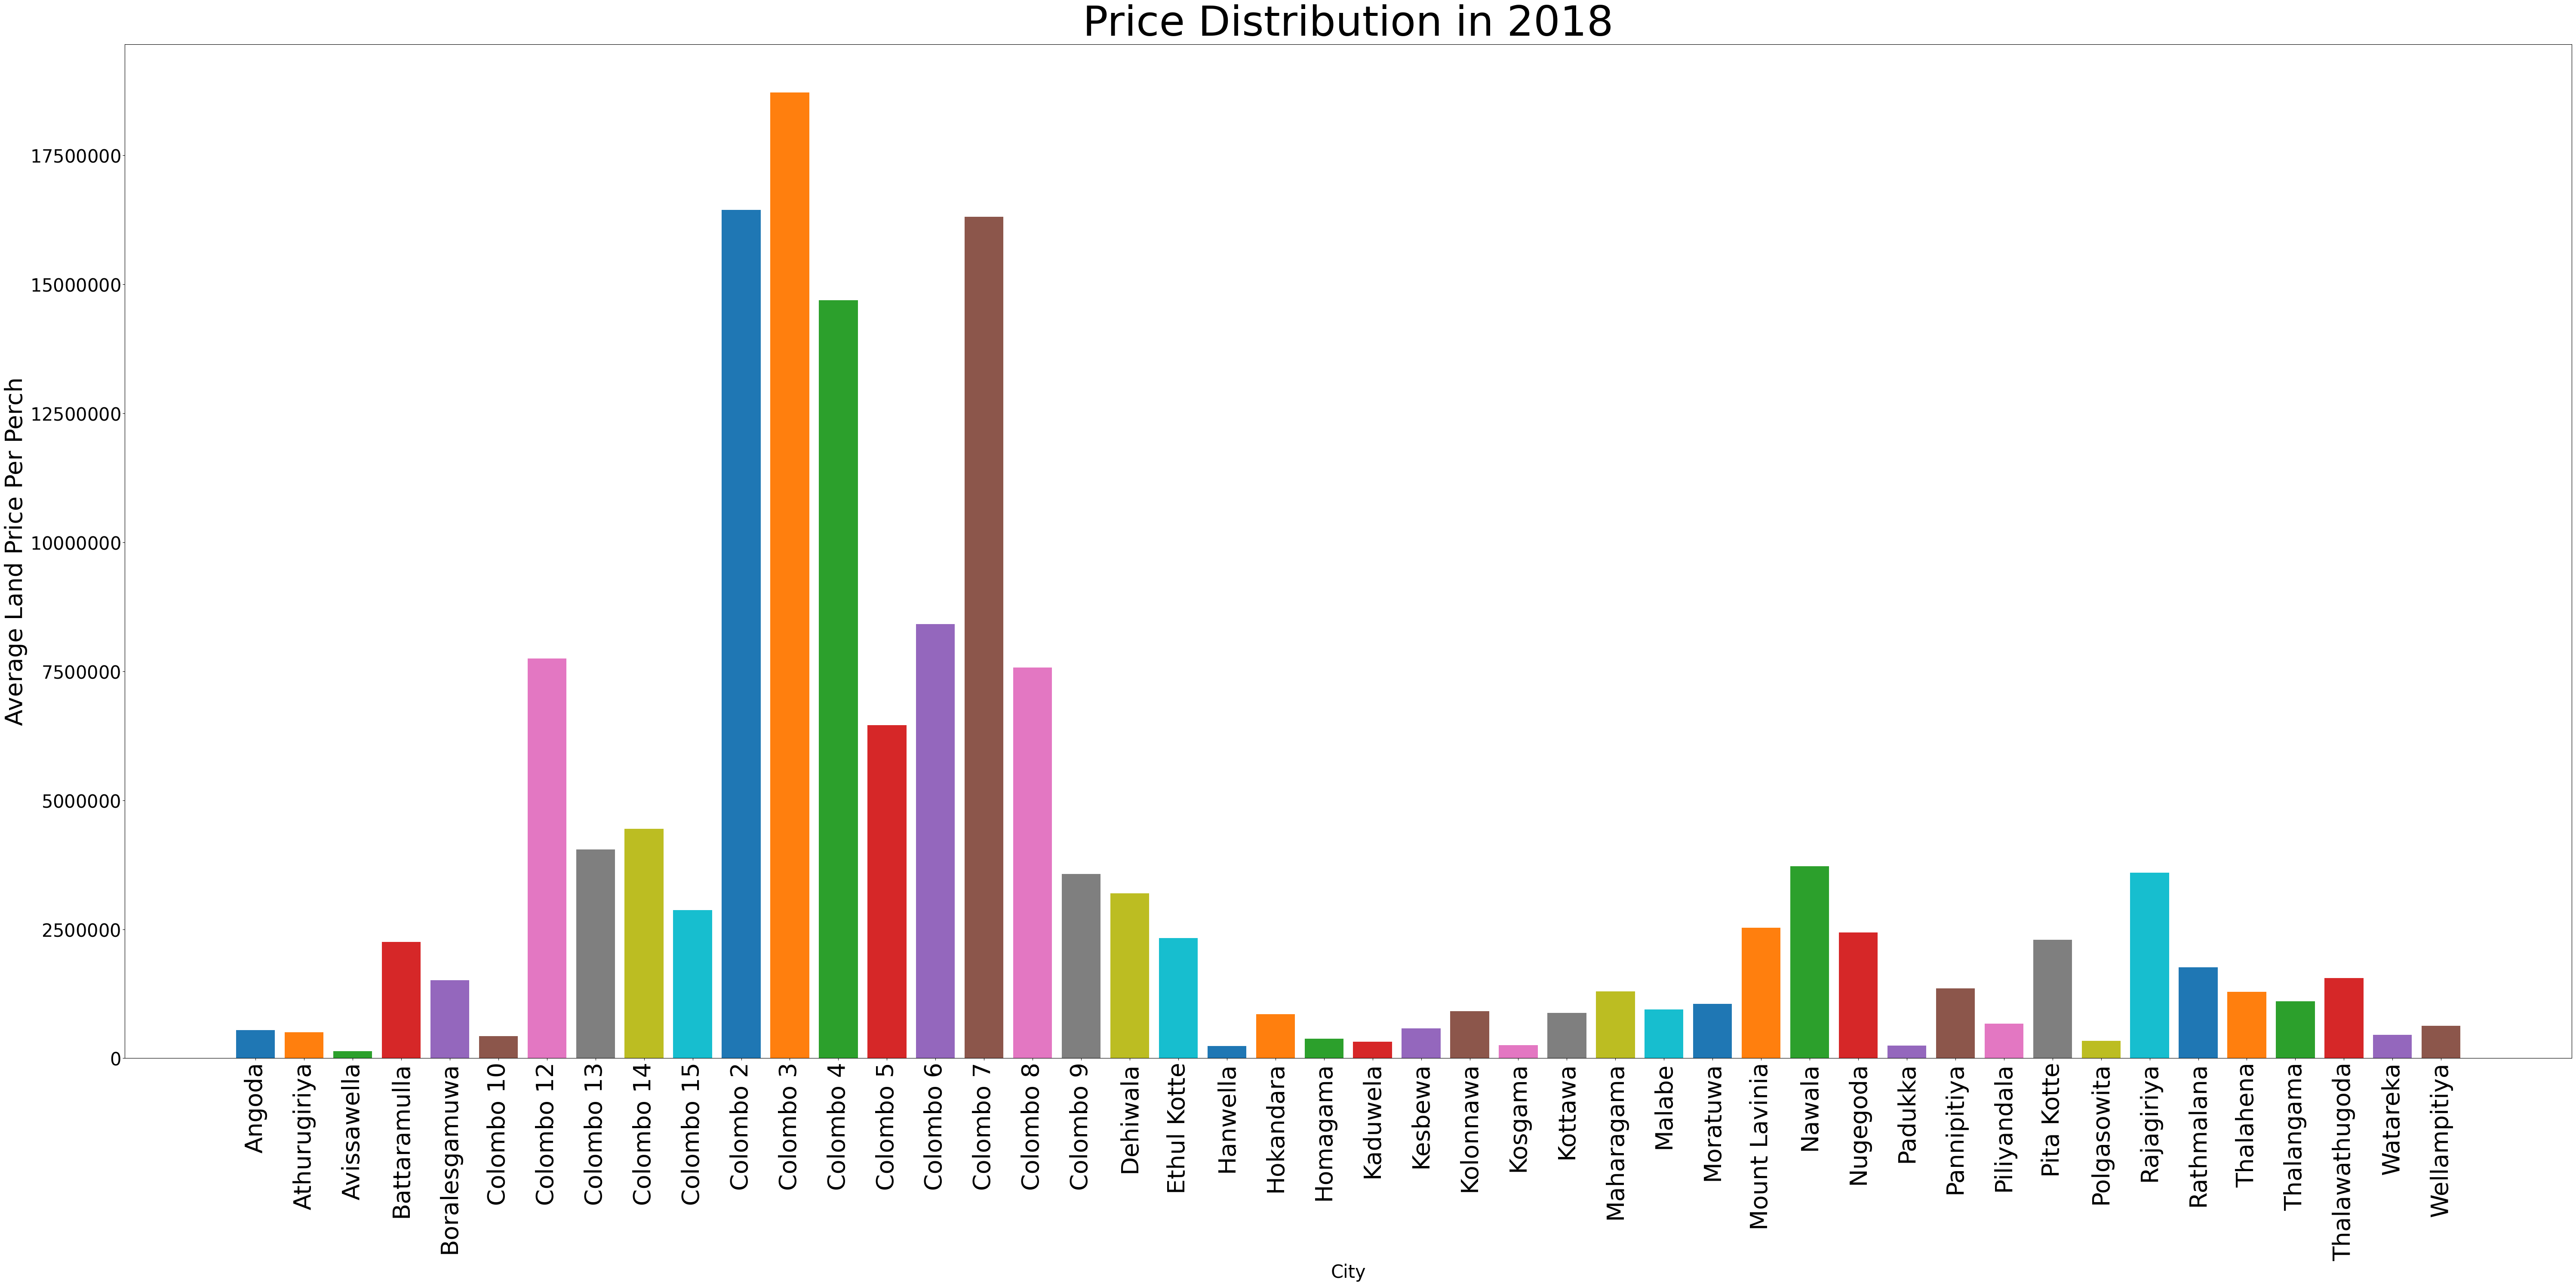

In [21]:
city_grouped_2018 = df_2018.groupby('main_city')

plt.figure(figsize=(60, 30)) 

for name, group in city_grouped_2018:
    filtered_data = group.dropna(subset=['price_land_pp'])
    plt.bar(name, filtered_data['price_land_pp'].mean())

plt.xlabel('City', fontsize=30)
plt.title('Price Distribution in 2018', fontsize=70)
plt.ylabel('Average Land Price Per Perch', fontsize=40)  

plt.xticks(rotation=90, fontsize=40)  

plt.yticks(fontsize=30)  

plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='plain', axis='y')

plt.tight_layout()  
plt.show()

### 2019

In [22]:
df = price_filtered_df

df['posted_date'] = pd.to_datetime(df['posted_date'], format='%m/%d/%Y %H:%M')

df_2019 = df[(df['posted_date'] >= '01/01/2019') & (df['posted_date'] <= '31/12/2019')]

city_stats = df_2019.groupby('main_city')['price_land_pp'].agg(['min', 'max', 'mean', 'std', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

city_stats.columns = ['min_price', 'max_price', 'mean_price', 'std_price', 'median_price', '25%_percentile', '75%_percentile']

city_stats.reset_index(inplace=True)

city_stats

main_city  min_price  max_price  mean_price  std_price  median_price   
0           Angoda    0.350Mn    0.950Mn     0.620Mn    0.150Mn       0.600Mn  \
1     Athurugiriya    0.380Mn    1.000Mn     0.562Mn    0.119Mn       0.550Mn   
2      Avissawella    0.074Mn    0.230Mn     0.156Mn    0.055Mn       0.145Mn   
3     Battaramulla    1.050Mn    3.529Mn     2.256Mn    0.602Mn       2.375Mn   
4    Boralesgamuwa    0.750Mn    2.000Mn     1.500Mn    0.314Mn       1.600Mn   
5        Colombo 1    0.565Mn    0.565Mn     0.565Mn        NaN       0.565Mn   
6       Colombo 12    8.000Mn    8.000Mn     8.000Mn        NaN       8.000Mn   
7       Colombo 13    2.600Mn    6.000Mn     4.054Mn    0.945Mn       3.800Mn   
8       Colombo 14    5.000Mn    7.500Mn     6.600Mn    1.389Mn       7.300Mn   
9       Colombo 15    2.000Mn    3.800Mn     3.336Mn    0.472Mn       3.500Mn   
10       Colombo 2   13.000Mn   22.000Mn    16.585Mn    2.289Mn      16.000Mn   
11       Colombo 3   12.000Mn   24.000Mn    18.698Mn    2.965Mn      20.000Mn   
12       Colombo 4    5.435Mn   19.500Mn    14.154Mn    3.110Mn      15.000Mn   
13       Colombo 5    3.095Mn   11.000Mn     6.688Mn    1.938Mn       6.106Mn   
14       Colombo 6    3.200Mn   13.000Mn     8.201Mn    2.237Mn       8.250Mn   
15       Colombo 7   12.000Mn   22.000Mn    16.325Mn    2.200Mn      16.500Mn   
16       Colombo 8    3.300Mn   12.000Mn     8.304Mn    1.884Mn       8.000Mn   
17       Colombo 9    3.235Mn    5.500Mn     4.455Mn    0.769Mn       4.623Mn   
18        Dehiwala    1.900Mn    5.000Mn     3.213Mn    0.634Mn       3.100Mn   
19     Ethul Kotte    1.900Mn    3.600Mn     2.344Mn    0.419Mn       2.300Mn   
20        Hanwella    0.250Mn    0.350Mn     0.275Mn    0.050Mn       0.250Mn   
21       Hokandara    0.550Mn    1.450Mn     0.844Mn    0.268Mn       0.800Mn   
22        Homagama    0.135Mn    0.884Mn     0.407Mn    0.166Mn       0.365Mn   
23        Kaduwela    0.188Mn    0.488Mn     0.306Mn    0.079Mn       0.288Mn   
24     Kahathuduwa    0.345Mn    0.550Mn     0.469Mn    0.078Mn       0.500Mn   
25         Kesbewa    0.285Mn    0.975Mn     0.643Mn    0.151Mn       0.680Mn   
26       Kolonnawa    0.350Mn    1.350Mn     0.842Mn    0.218Mn       0.950Mn   
27         Kosgama    0.100Mn    0.210Mn     0.133Mn    0.047Mn       0.110Mn   
28         Kottawa    0.375Mn    1.400Mn     0.875Mn    0.235Mn       0.850Mn   
29      Maharagama    0.675Mn    2.500Mn     1.490Mn    0.389Mn       1.500Mn   
30          Malabe    0.460Mn    1.790Mn     0.984Mn    0.292Mn       0.927Mn   
31        Moratuwa    0.625Mn    1.600Mn     1.019Mn    0.206Mn       1.000Mn   
32   Mount Lavinia    1.500Mn    3.700Mn     2.771Mn    0.438Mn       2.800Mn   
33          Nawala    2.700Mn    5.000Mn     3.703Mn    0.472Mn       3.628Mn   
34        Nugegoda    1.200Mn    4.000Mn     2.698Mn    0.554Mn       2.700Mn   
35         Padukka    0.250Mn    0.300Mn     0.285Mn    0.024Mn       0.295Mn   
36     Pannipitiya    0.640Mn    2.500Mn     1.403Mn    0.468Mn       1.300Mn   
37     Piliyandala    0.310Mn    1.200Mn     0.656Mn    0.194Mn       0.636Mn   
38      Pita Kotte    1.290Mn    3.600Mn     2.225Mn    0.492Mn       2.200Mn   
39     Polgasowita    0.247Mn    0.550Mn     0.346Mn    0.083Mn       0.350Mn   
40      Rajagiriya    1.200Mn    7.000Mn     3.624Mn    1.212Mn       3.800Mn   
41      Rathmalana    1.447Mn    2.500Mn     1.867Mn    0.298Mn       1.850Mn   
42       Thalahena    0.800Mn    1.500Mn     1.164Mn    0.246Mn       1.200Mn   
43      Thalangama    1.500Mn    1.500Mn     1.500Mn        NaN       1.500Mn   
44  Thalawathugoda    0.850Mn    2.750Mn     1.635Mn    0.402Mn       1.600Mn   
45    Wellampitiya    0.550Mn    0.870Mn     0.743Mn    0.135Mn       0.796Mn   

    25%_percentile  75%_percentile  
0          0.542Mn         0.726Mn  
1          0.480Mn         0.625Mn  
2          0.124Mn         0.197Mn  
3          1.800Mn         2.700Mn  
4          1.337

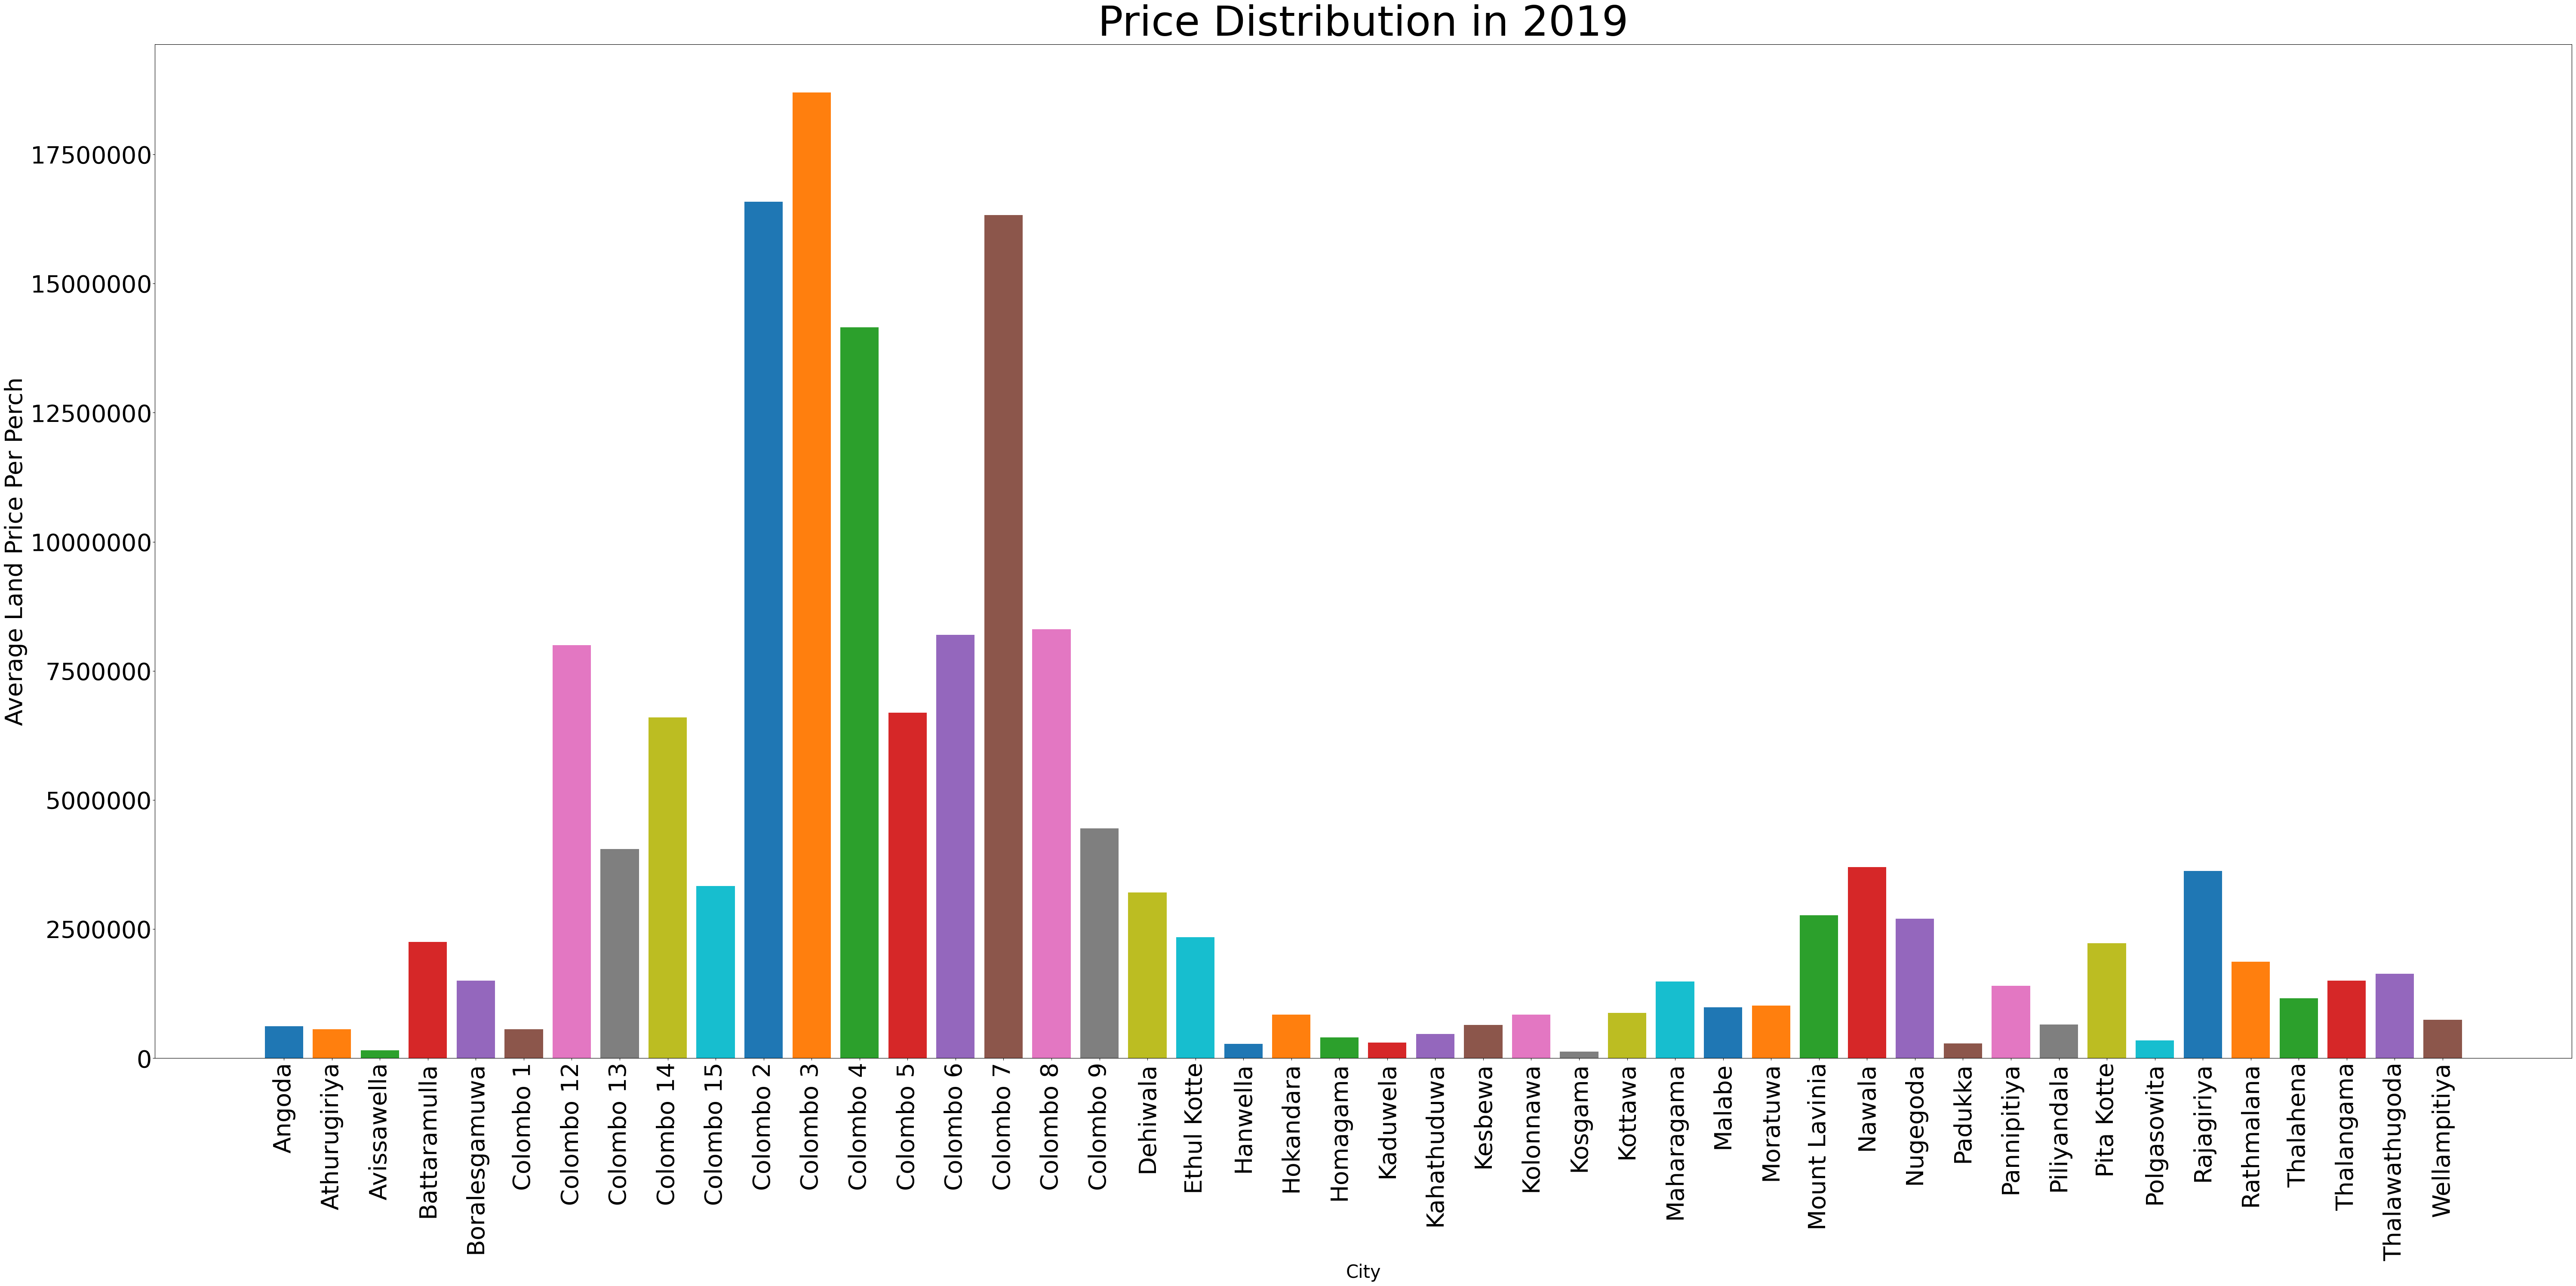

In [23]:
city_grouped_2019 = df_2019.groupby('main_city')

plt.figure(figsize=(60, 30)) 

for name, group in city_grouped_2019:
    filtered_data = group.dropna(subset=['price_land_pp'])
    plt.bar(name, filtered_data['price_land_pp'].mean())

plt.xlabel('City', fontsize=30)
plt.title('Price Distribution in 2019', fontsize=70)
plt.ylabel('Average Land Price Per Perch', fontsize=40)  

plt.xticks(rotation=90, fontsize=40)  

plt.yticks(fontsize=40)  

plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='plain', axis='y')

plt.tight_layout()  
plt.show()

### 2020

In [24]:
df = price_filtered_df

df['posted_date'] = pd.to_datetime(df['posted_date'], format='%m/%d/%Y %H:%M')

df_2020 = df[(df['posted_date'] >= '01/01/2020') & (df['posted_date'] <= '31/12/2020')]

city_stats = df_2020.groupby('main_city')['price_land_pp'].agg(['min', 'max', 'mean', 'std', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

city_stats.columns = ['min_price', 'max_price', 'mean_price', 'std_price', 'median_price', '25%_percentile', '75%_percentile']

city_stats.reset_index(inplace=True)

city_stats

main_city  min_price  max_price  mean_price  std_price  median_price   
0           Angoda    0.350Mn    1.000Mn     0.814Mn    0.255Mn       0.930Mn  \
1     Athurugiriya    0.367Mn    1.300Mn     0.679Mn    0.191Mn       0.650Mn   
2      Avissawella    0.115Mn    0.225Mn     0.164Mn    0.040Mn       0.155Mn   
3     Battaramulla    1.100Mn    3.900Mn     2.348Mn    0.612Mn       2.414Mn   
4    Boralesgamuwa    0.938Mn    2.200Mn     1.637Mn    0.295Mn       1.700Mn   
5       Colombo 10    0.450Mn    0.450Mn     0.450Mn        NaN       0.450Mn   
6       Colombo 12    7.500Mn    7.500Mn     7.500Mn    0.000Mn       7.500Mn   
7       Colombo 13    4.000Mn    4.000Mn     4.000Mn        NaN       4.000Mn   
8       Colombo 14    3.000Mn    7.965Mn     5.984Mn    2.149Mn       6.486Mn   
9       Colombo 15    2.394Mn    4.717Mn     3.873Mn    0.565Mn       4.000Mn   
10       Colombo 2   13.000Mn   18.000Mn    16.167Mn    1.581Mn      17.000Mn   
11       Colombo 3    9.417Mn   26.000Mn    19.193Mn    3.103Mn      20.455Mn   
12       Colombo 4    9.000Mn   18.000Mn    12.917Mn    2.573Mn      12.750Mn   
13       Colombo 5    3.000Mn   13.500Mn     7.487Mn    2.424Mn       7.300Mn   
14       Colombo 6    4.000Mn   12.000Mn     8.221Mn    1.840Mn       8.000Mn   
15       Colombo 7   13.000Mn   20.500Mn    15.403Mn    1.874Mn      14.682Mn   
16       Colombo 8    3.500Mn   10.000Mn     7.103Mn    1.484Mn       7.250Mn   
17       Colombo 9    2.600Mn    6.065Mn     4.302Mn    1.400Mn       4.348Mn   
18        Dehiwala    1.800Mn    5.000Mn     3.296Mn    0.659Mn       3.300Mn   
19     Ethul Kotte    1.800Mn    3.800Mn     2.658Mn    0.554Mn       2.500Mn   
20        Hanwella    0.048Mn    0.380Mn     0.203Mn    0.110Mn       0.170Mn   
21       Hokandara    0.450Mn    1.500Mn     0.961Mn    0.272Mn       0.927Mn   
22        Homagama    0.138Mn    0.800Mn     0.465Mn    0.148Mn       0.460Mn   
23        Kaduwela    0.200Mn    0.460Mn     0.354Mn    0.072Mn       0.360Mn   
24     Kahathuduwa    0.250Mn    0.560Mn     0.387Mn    0.109Mn       0.415Mn   
25         Kesbewa    0.350Mn    1.000Mn     0.705Mn    0.168Mn       0.750Mn   
26       Kolonnawa    0.650Mn    1.000Mn     0.744Mn    0.123Mn       0.675Mn   
27         Kosgama    0.200Mn    0.700Mn     0.380Mn    0.230Mn       0.225Mn   
28         Kottawa    0.400Mn    1.500Mn     0.864Mn    0.257Mn       0.795Mn   
29      Maharagama    0.800Mn    2.500Mn     1.594Mn    0.425Mn       1.550Mn   
30          Malabe    0.700Mn    1.800Mn     1.107Mn    0.258Mn       1.050Mn   
31        Moratuwa    0.700Mn    1.500Mn     1.095Mn    0.256Mn       1.000Mn   
32   Mount Lavinia    1.600Mn    3.600Mn     2.665Mn    0.415Mn       2.600Mn   
33          Nawala    2.350Mn    6.000Mn     4.016Mn    0.686Mn       3.975Mn   
34        Nugegoda    1.100Mn    5.273Mn     2.603Mn    0.755Mn       2.500Mn   
35         Padukka    0.250Mn    0.360Mn     0.310Mn    0.051Mn       0.326Mn   
36     Pannipitiya    0.420Mn    2.700Mn     1.339Mn    0.500Mn       1.300Mn   
37     Piliyandala    0.438Mn    1.200Mn     0.740Mn    0.180Mn       0.700Mn   
38      Pita Kotte    1.250Mn    4.000Mn     2.464Mn    0.659Mn       2.400Mn   
39     Polgasowita    0.180Mn    0.684Mn     0.483Mn    0.150Mn       0.525Mn   
40      Rajagiriya    0.000Mn    6.000Mn     3.120Mn    1.404Mn       3.000Mn   
41      Rathmalana    1.000Mn    3.000Mn     1.793Mn    0.458Mn       1.650Mn   
42       Thalahena    1.000Mn    1.300Mn     1.117Mn    0.098Mn       1.100Mn   
43      Thalangama    1.250Mn    1.900Mn     1.575Mn    0.460Mn       1.575Mn   
44  Thalawathugoda    0.700Mn    2.500Mn     1.593Mn    0.355Mn       1.600Mn   
45        Watareka    0.400Mn    0.400Mn     0.400Mn        NaN       0.400Mn   
46    Wellampitiya    0.575Mn    0.900Mn     0.742Mn    0.163Mn       0.750Mn   

    25%_percentile  75%_percentile  
0          0.725Mn         1.000Mn  
1          0.550Mn         0.750Mn  
2        

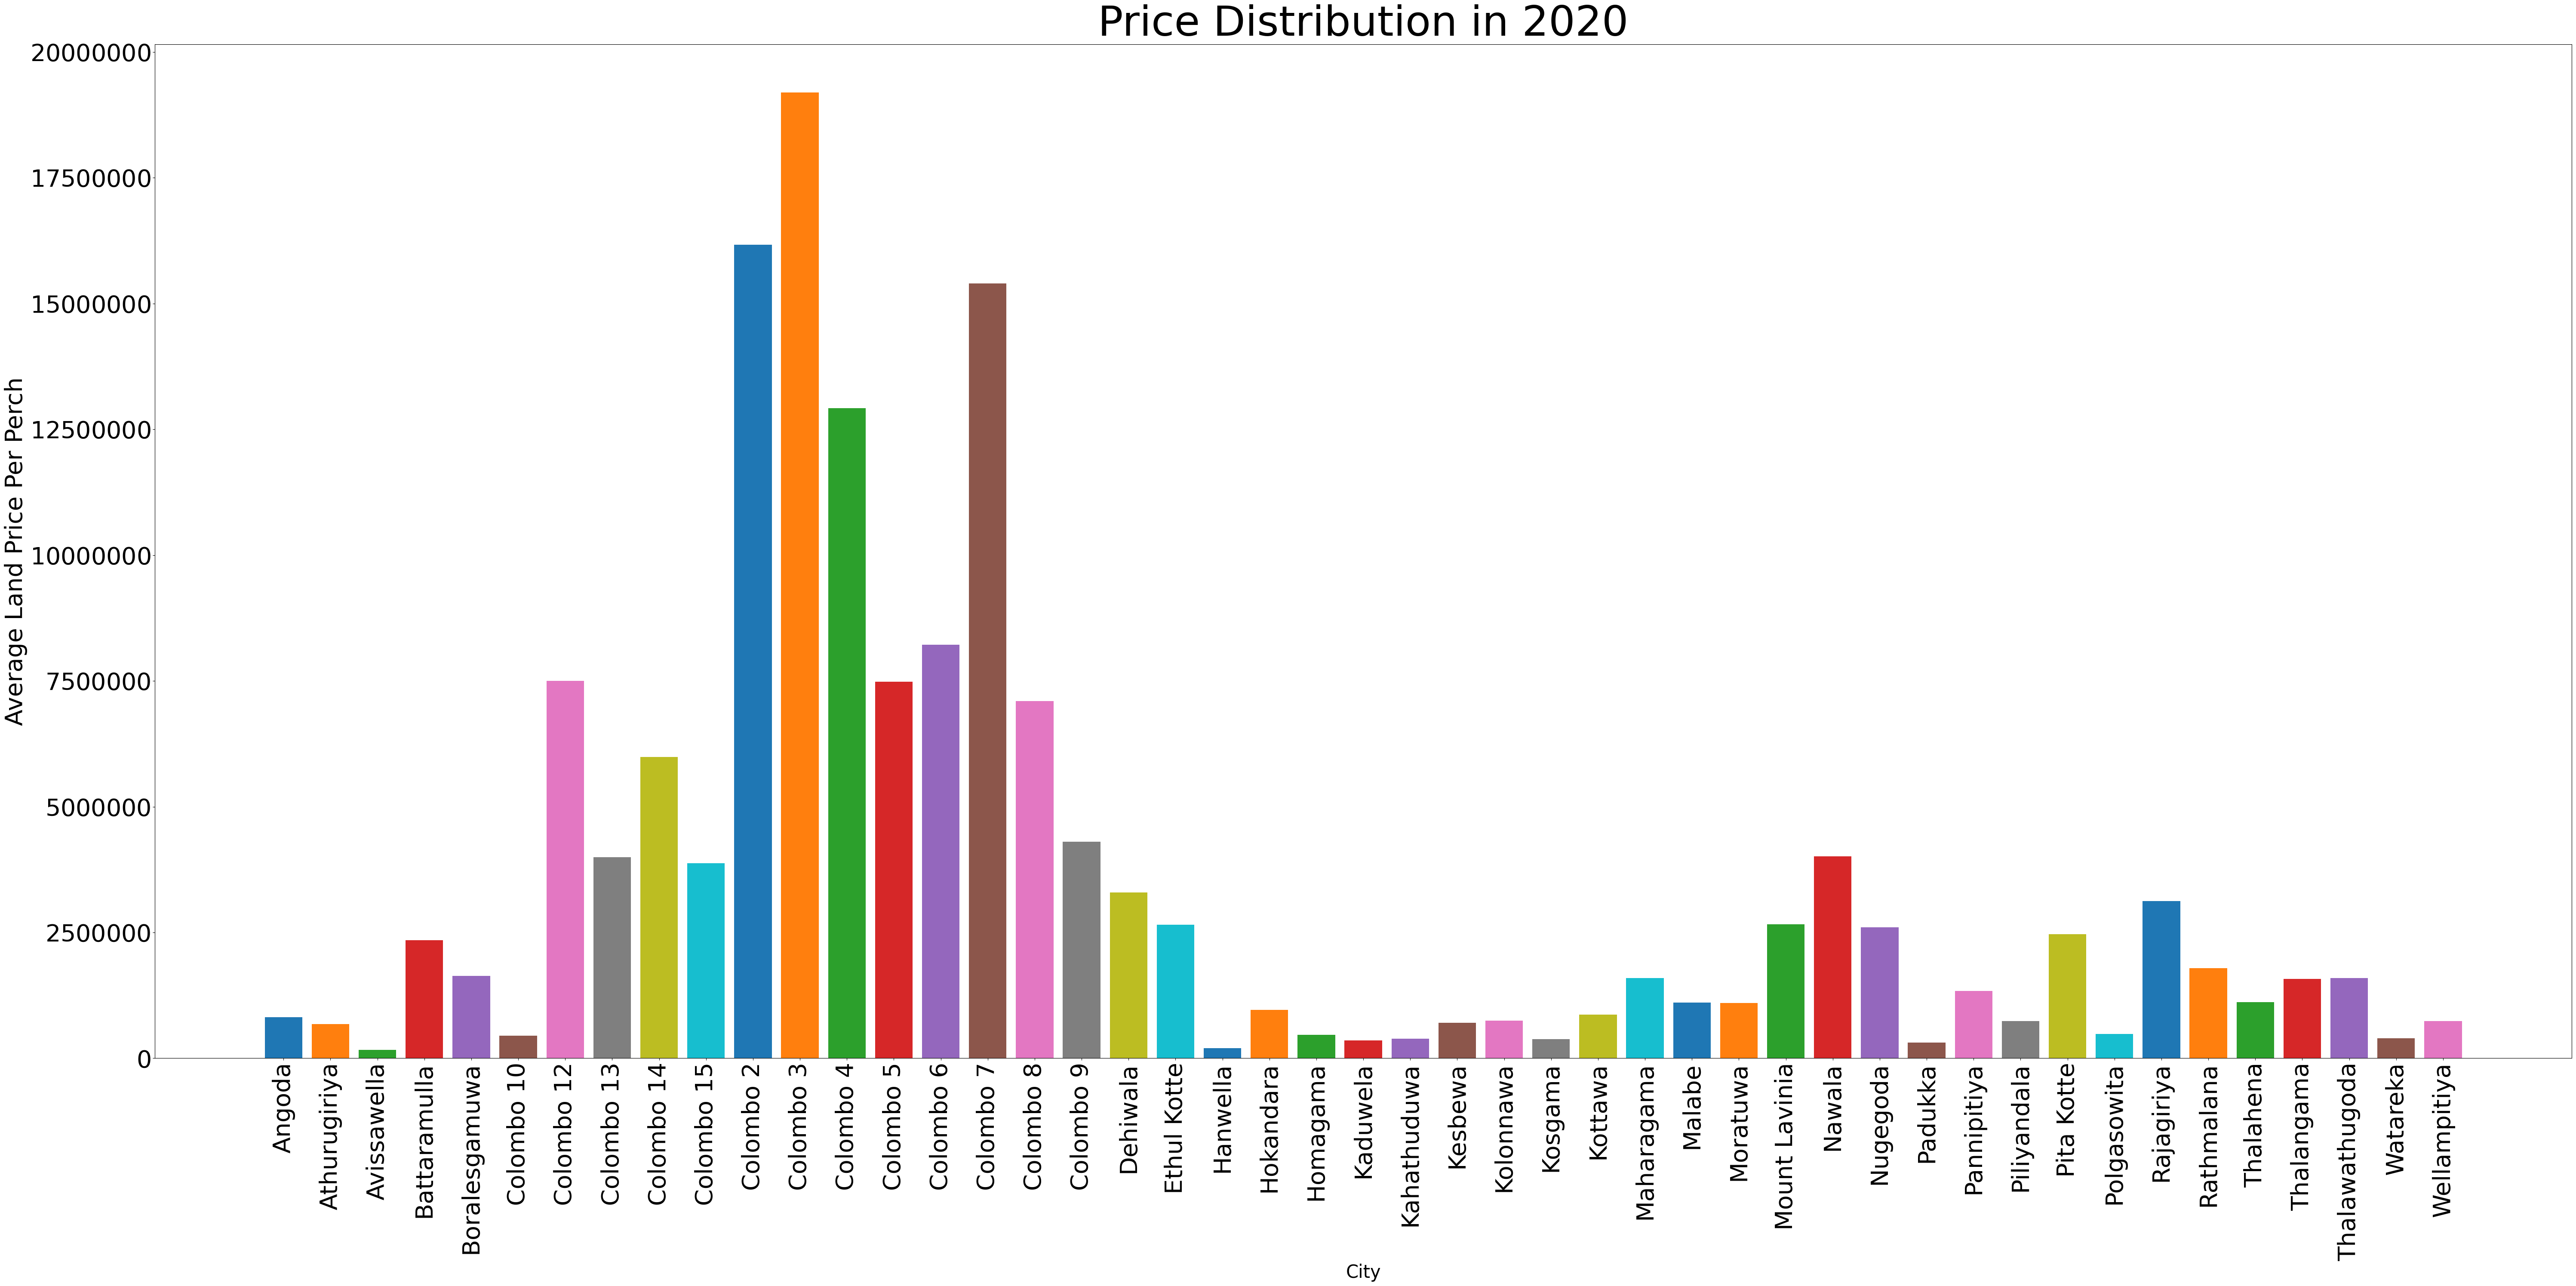

In [25]:
city_grouped_2020 = df_2020.groupby('main_city')

plt.figure(figsize=(60, 30)) 

for name, group in city_grouped_2020:
    filtered_data = group.dropna(subset=['price_land_pp'])
    plt.bar(name, filtered_data['price_land_pp'].mean())

plt.xlabel('City', fontsize=30)
plt.title('Price Distribution in 2020', fontsize=70)
plt.ylabel('Average Land Price Per Perch', fontsize=40)  

plt.xticks(rotation=90, fontsize=40)  

plt.yticks(fontsize=40)  

plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='plain', axis='y')

plt.tight_layout()  
plt.show()

### 2021


In [26]:
df = price_filtered_df

df['posted_date'] = pd.to_datetime(df['posted_date'], format='%m/%d/%Y %H:%M')

df_2021 = df[(df['posted_date'] >= '01/01/2021') & (df['posted_date'] <= '31/12/2021')]

city_stats = df_2021.groupby('main_city')['price_land_pp'].agg(['min', 'max', 'mean', 'std', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

city_stats.columns = ['min_price', 'max_price', 'mean_price', 'std_price', 'median_price', '25%_percentile', '75%_percentile']

city_stats.reset_index(inplace=True)

city_stats

main_city  min_price  max_price  mean_price  std_price  median_price   
0           Angoda    0.525Mn    1.000Mn     0.815Mn    0.166Mn       0.825Mn  \
1     Athurugiriya    0.250Mn    1.250Mn     0.625Mn    0.211Mn       0.625Mn   
2      Avissawella    0.079Mn    0.238Mn     0.160Mn    0.042Mn       0.145Mn   
3     Battaramulla    1.250Mn    4.000Mn     2.554Mn    0.625Mn       2.500Mn   
4    Boralesgamuwa    0.850Mn    2.530Mn     1.716Mn    0.329Mn       1.750Mn   
5        Colombo 1    0.557Mn    0.557Mn     0.557Mn        NaN       0.557Mn   
6       Colombo 10    0.380Mn    0.450Mn     0.415Mn    0.049Mn       0.415Mn   
7       Colombo 12    7.500Mn    8.500Mn     7.600Mn    0.316Mn       7.500Mn   
8       Colombo 13    3.250Mn    6.000Mn     5.016Mn    1.303Mn       5.407Mn   
9       Colombo 14    4.000Mn    9.000Mn     6.246Mn    2.151Mn       5.500Mn   
10      Colombo 15    2.500Mn    4.088Mn     3.305Mn    0.535Mn       3.350Mn   
11       Colombo 2   12.000Mn   23.500Mn    19.214Mn    3.599Mn      20.000Mn   
12       Colombo 3   10.734Mn   27.500Mn    18.660Mn    3.662Mn      18.000Mn   
13       Colombo 4    9.118Mn   18.000Mn    14.246Mn    1.966Mn      15.000Mn   
14       Colombo 5    3.500Mn   11.500Mn     6.747Mn    1.623Mn       6.500Mn   
15       Colombo 6    4.300Mn   10.630Mn     7.297Mn    1.476Mn       7.312Mn   
16       Colombo 7   12.500Mn   22.000Mn    17.302Mn    2.333Mn      17.500Mn   
17       Colombo 8    4.000Mn   11.500Mn     7.343Mn    1.807Mn       7.000Mn   
18       Colombo 9    3.000Mn    5.500Mn     4.452Mn    0.636Mn       4.510Mn   
19        Dehiwala    2.456Mn    5.300Mn     3.502Mn    0.555Mn       3.500Mn   
20     Ethul Kotte    1.715Mn    4.500Mn     3.022Mn    0.651Mn       2.850Mn   
21        Hanwella    0.100Mn    0.400Mn     0.217Mn    0.079Mn       0.170Mn   
22       Hokandara    0.800Mn    1.850Mn     1.170Mn    0.277Mn       1.100Mn   
23        Homagama    0.160Mn    0.845Mn     0.445Mn    0.154Mn       0.375Mn   
24        Kaduwela    0.250Mn    0.550Mn     0.410Mn    0.053Mn       0.430Mn   
25     Kahathuduwa    0.180Mn    0.570Mn     0.444Mn    0.103Mn       0.450Mn   
26         Kesbewa    0.450Mn    1.050Mn     0.889Mn    0.048Mn       0.900Mn   
27       Kolonnawa    0.625Mn    1.500Mn     1.130Mn    0.321Mn       1.250Mn   
28         Kosgama    0.095Mn    0.275Mn     0.174Mn    0.055Mn       0.171Mn   
29         Kottawa    0.580Mn    1.450Mn     0.956Mn    0.191Mn       0.975Mn   
30      Maharagama    0.980Mn    2.500Mn     1.738Mn    0.369Mn       1.700Mn   
31          Malabe    0.650Mn    2.000Mn     1.342Mn    0.257Mn       1.350Mn   
32        Moratuwa    0.770Mn    1.800Mn     1.321Mn    0.245Mn       1.350Mn   
33   Mount Lavinia    1.700Mn    4.000Mn     2.742Mn    0.541Mn       2.800Mn   
34          Nawala    2.500Mn    6.500Mn     4.306Mn    0.801Mn       4.350Mn   
35        Nugegoda    1.200Mn    4.500Mn     3.009Mn    0.693Mn       3.000Mn   
36         Padukka    0.080Mn    0.380Mn     0.237Mn    0.089Mn       0.245Mn   
37     Pannipitiya    0.725Mn    2.300Mn     1.580Mn    0.434Mn       1.600Mn   
38     Piliyandala    0.395Mn    1.175Mn     0.860Mn    0.111Mn       0.895Mn   
39      Pita Kotte    1.150Mn    4.306Mn     2.813Mn    0.618Mn       2.800Mn   
40     Polgasowita    0.185Mn    0.606Mn     0.391Mn    0.142Mn       0.350Mn   
41      Rajagiriya    2.000Mn    6.200Mn     3.897Mn    0.916Mn       3.800Mn   
42      Rathmalana    1.000Mn    3.400Mn     2.020Mn    0.555Mn       1.900Mn   
43       Thalahena    1.200Mn    2.100Mn     1.607Mn    0.221Mn       1.675Mn   
44      Thalangama    1.800Mn    2.000Mn     1.935Mn    0.093Mn       2.000Mn   
45  Thalawathugoda    0.985Mn    3.000Mn     1.942Mn    0.397Mn       1.938Mn   
46    Wellampitiya    0.550Mn    1.100Mn     0.854Mn    0.192Mn       0.892Mn   

    25%_percentile  75%_percentile  
0          0.738Mn         0.950Mn  
1          0.450Mn         0.754Mn  
2        

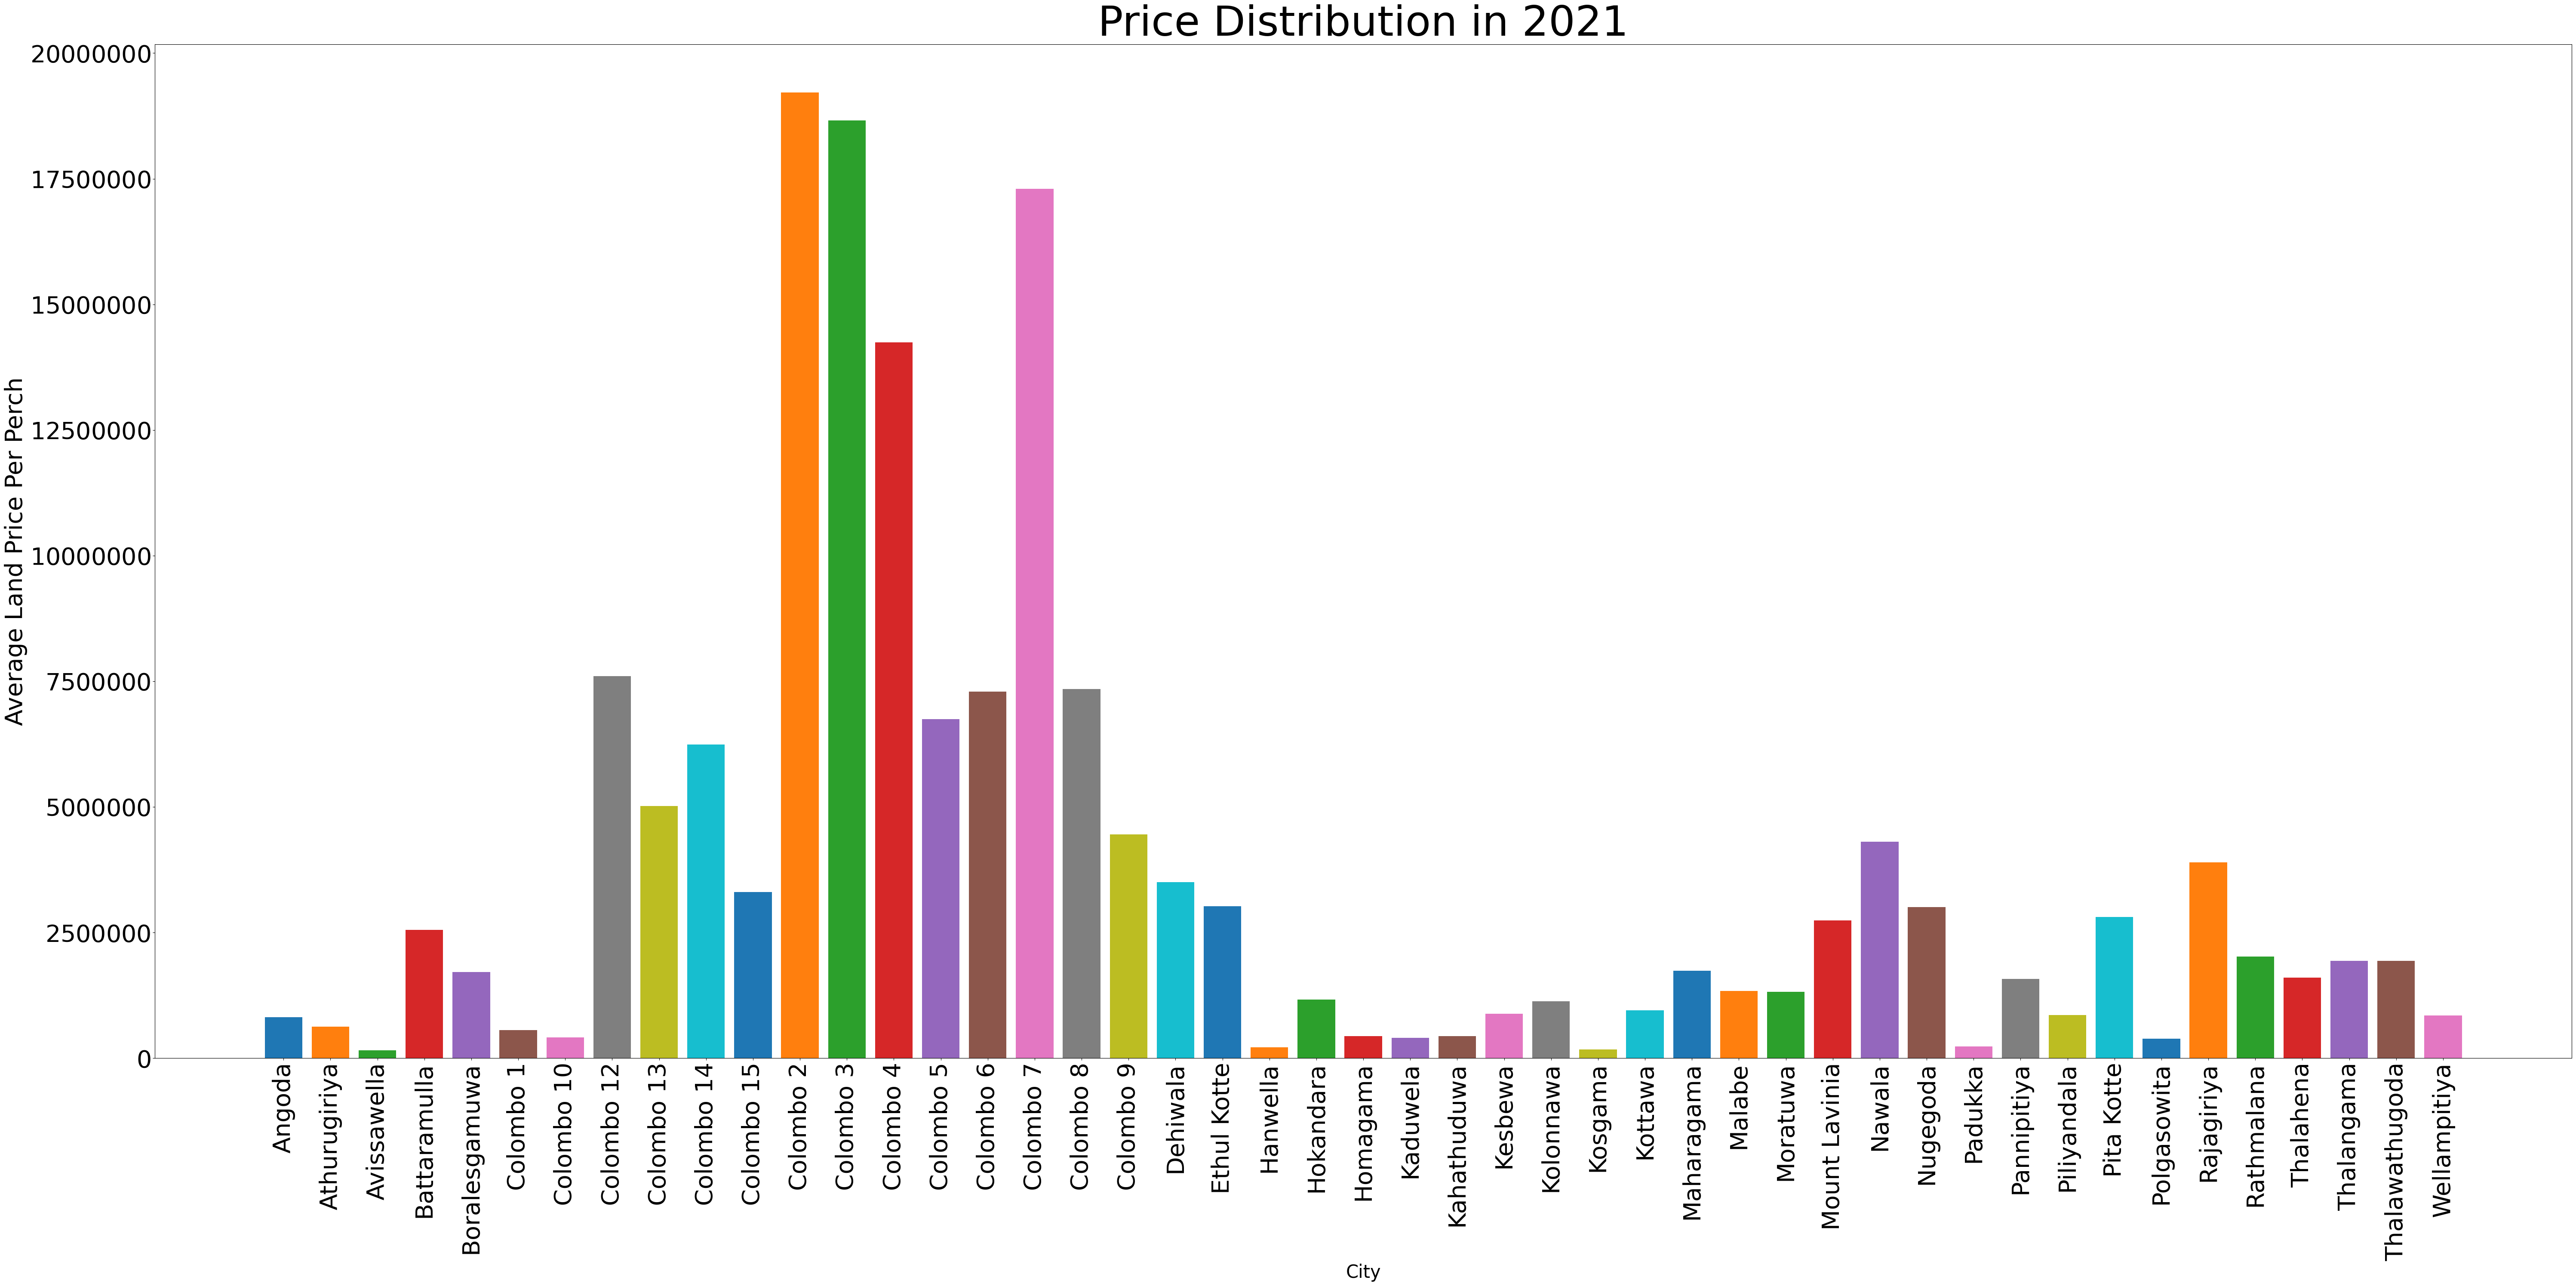

In [27]:
city_grouped_2021 = df_2021.groupby('main_city')

plt.figure(figsize=(60, 30)) 

for name, group in city_grouped_2021:
    filtered_data = group.dropna(subset=['price_land_pp'])
    plt.bar(name, filtered_data['price_land_pp'].mean())

plt.xlabel('City', fontsize=30)
plt.title('Price Distribution in 2021', fontsize=70)
plt.ylabel('Average Land Price Per Perch', fontsize=40)  

plt.xticks(rotation=90, fontsize=40)  

plt.yticks(fontsize=40)  

plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='plain', axis='y')

plt.tight_layout()  
plt.show()

### 2022

In [28]:
df = price_filtered_df

df['posted_date'] = pd.to_datetime(df['posted_date'], format='%m/%d/%Y')

df_2022 = df[(df['posted_date'] >= '01/01/2022') & (df['posted_date'] <= '31/12/2022')]

city_stats = df_2022.groupby('main_city')['price_land_pp'].agg(['min', 'max', 'mean', 'std', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

city_stats.columns = ['min_price', 'max_price', 'mean_price', 'std_price', 'median_price', '25%_percentile', '75%_percentile']

city_stats.reset_index(inplace=True)

city_stats

main_city  min_price  max_price  mean_price  std_price  median_price   
0           Angoda    0.650Mn    1.160Mn     0.987Mn    0.162Mn       1.000Mn  \
1     Athurugiriya    0.370Mn    1.255Mn     1.006Mn    0.153Mn       1.025Mn   
2      Avissawella    0.120Mn    0.240Mn     0.174Mn    0.028Mn       0.174Mn   
3     Battaramulla    1.300Mn    4.000Mn     2.562Mn    0.585Mn       2.500Mn   
4    Boralesgamuwa    1.000Mn    2.600Mn     1.794Mn    0.394Mn       1.750Mn   
5        Colombo 1    0.250Mn    0.660Mn     0.463Mn    0.177Mn       0.550Mn   
6       Colombo 10    0.340Mn    0.704Mn     0.634Mn    0.052Mn       0.650Mn   
7       Colombo 12    7.500Mn    7.950Mn     7.725Mn    0.318Mn       7.725Mn   
8       Colombo 13    5.000Mn    7.083Mn     6.043Mn    0.553Mn       6.000Mn   
9       Colombo 14    5.000Mn    7.500Mn     6.417Mn    0.801Mn       6.500Mn   
10      Colombo 15    2.500Mn    4.000Mn     3.426Mn    0.605Mn       3.600Mn   
11       Colombo 2   13.500Mn   20.000Mn    16.286Mn    1.841Mn      16.000Mn   
12       Colombo 3   11.429Mn   25.000Mn    18.128Mn    2.598Mn      18.000Mn   
13       Colombo 4   10.000Mn   30.000Mn    16.173Mn    4.026Mn      15.300Mn   
14       Colombo 5    5.000Mn   12.640Mn     7.098Mn    1.520Mn       6.500Mn   
15       Colombo 6    4.700Mn   11.920Mn     8.698Mn    1.805Mn       9.000Mn   
16       Colombo 7    9.500Mn   20.000Mn    15.286Mn    2.491Mn      16.000Mn   
17       Colombo 8    4.900Mn   11.000Mn     7.604Mn    1.673Mn       8.000Mn   
18       Colombo 9    2.100Mn    4.800Mn     3.413Mn    1.145Mn       3.375Mn   
19        Dehiwala    1.800Mn    5.700Mn     3.620Mn    0.663Mn       3.500Mn   
20     Ethul Kotte    2.500Mn    4.350Mn     3.458Mn    0.476Mn       3.500Mn   
21        Hanwella    0.140Mn    0.375Mn     0.317Mn    0.041Mn       0.335Mn   
22       Hokandara    0.850Mn    1.850Mn     1.333Mn    0.257Mn       1.387Mn   
23        Homagama    0.185Mn    0.870Mn     0.578Mn    0.083Mn       0.600Mn   
24        Kaduwela    0.175Mn    0.530Mn     0.377Mn    0.033Mn       0.375Mn   
25     Kahathuduwa    0.270Mn    0.775Mn     0.575Mn    0.127Mn       0.650Mn   
26         Kesbewa    0.270Mn    1.200Mn     0.844Mn    0.170Mn       0.900Mn   
27       Kolonnawa    1.030Mn    1.675Mn     1.363Mn    0.290Mn       1.350Mn   
28         Kosgama    0.140Mn    0.250Mn     0.210Mn    0.039Mn       0.225Mn   
29         Kottawa    0.650Mn    1.875Mn     1.286Mn    0.267Mn       1.425Mn   
30      Maharagama    1.175Mn    3.000Mn     1.973Mn    0.307Mn       1.965Mn   
31          Malabe    0.725Mn    2.200Mn     1.471Mn    0.296Mn       1.500Mn   
32        Moratuwa    0.850Mn    2.000Mn     1.323Mn    0.280Mn       1.250Mn   
33   Mount Lavinia    1.800Mn    4.404Mn     3.028Mn    0.564Mn       3.000Mn   
34          Nawala    2.800Mn    6.000Mn     4.631Mn    0.674Mn       4.545Mn   
35        Nugegoda    1.590Mn    4.900Mn     3.080Mn    0.660Mn       3.000Mn   
36         Padukka    0.125Mn    0.450Mn     0.266Mn    0.036Mn       0.260Mn   
37     Pannipitiya    0.950Mn    2.500Mn     1.924Mn    0.189Mn       1.980Mn   
38     Piliyandala    0.350Mn    1.450Mn     0.887Mn    0.191Mn       0.900Mn   
39      Pita Kotte    2.000Mn    4.200Mn     3.012Mn    0.492Mn       3.000Mn   
40     Polgasowita    0.350Mn    0.950Mn     0.440Mn    0.137Mn       0.375Mn   
41      Rajagiriya    1.705Mn    5.200Mn     3.497Mn    0.875Mn       3.702Mn   
42      Rathmalana    1.150Mn    3.500Mn     2.155Mn    0.494Mn       2.050Mn   
43       Thalagala    0.550Mn    0.662Mn     0.624Mn    0.051Mn       0.650Mn   
44       Thalahena    1.290Mn    1.800Mn     1.560Mn    0.253Mn       1.575Mn   
45      Thalangama    1.575Mn    1.700Mn     1.658Mn    0.072Mn       1.700Mn   
46  Thalawathugoda    1.090Mn    3.000Mn     2.029Mn    0.356Mn       1.968Mn   
47        Watareka    0.275Mn    0.500Mn     0.415Mn    0.032Mn       0.410Mn   
48         Wattala    1.500Mn    1.500Mn

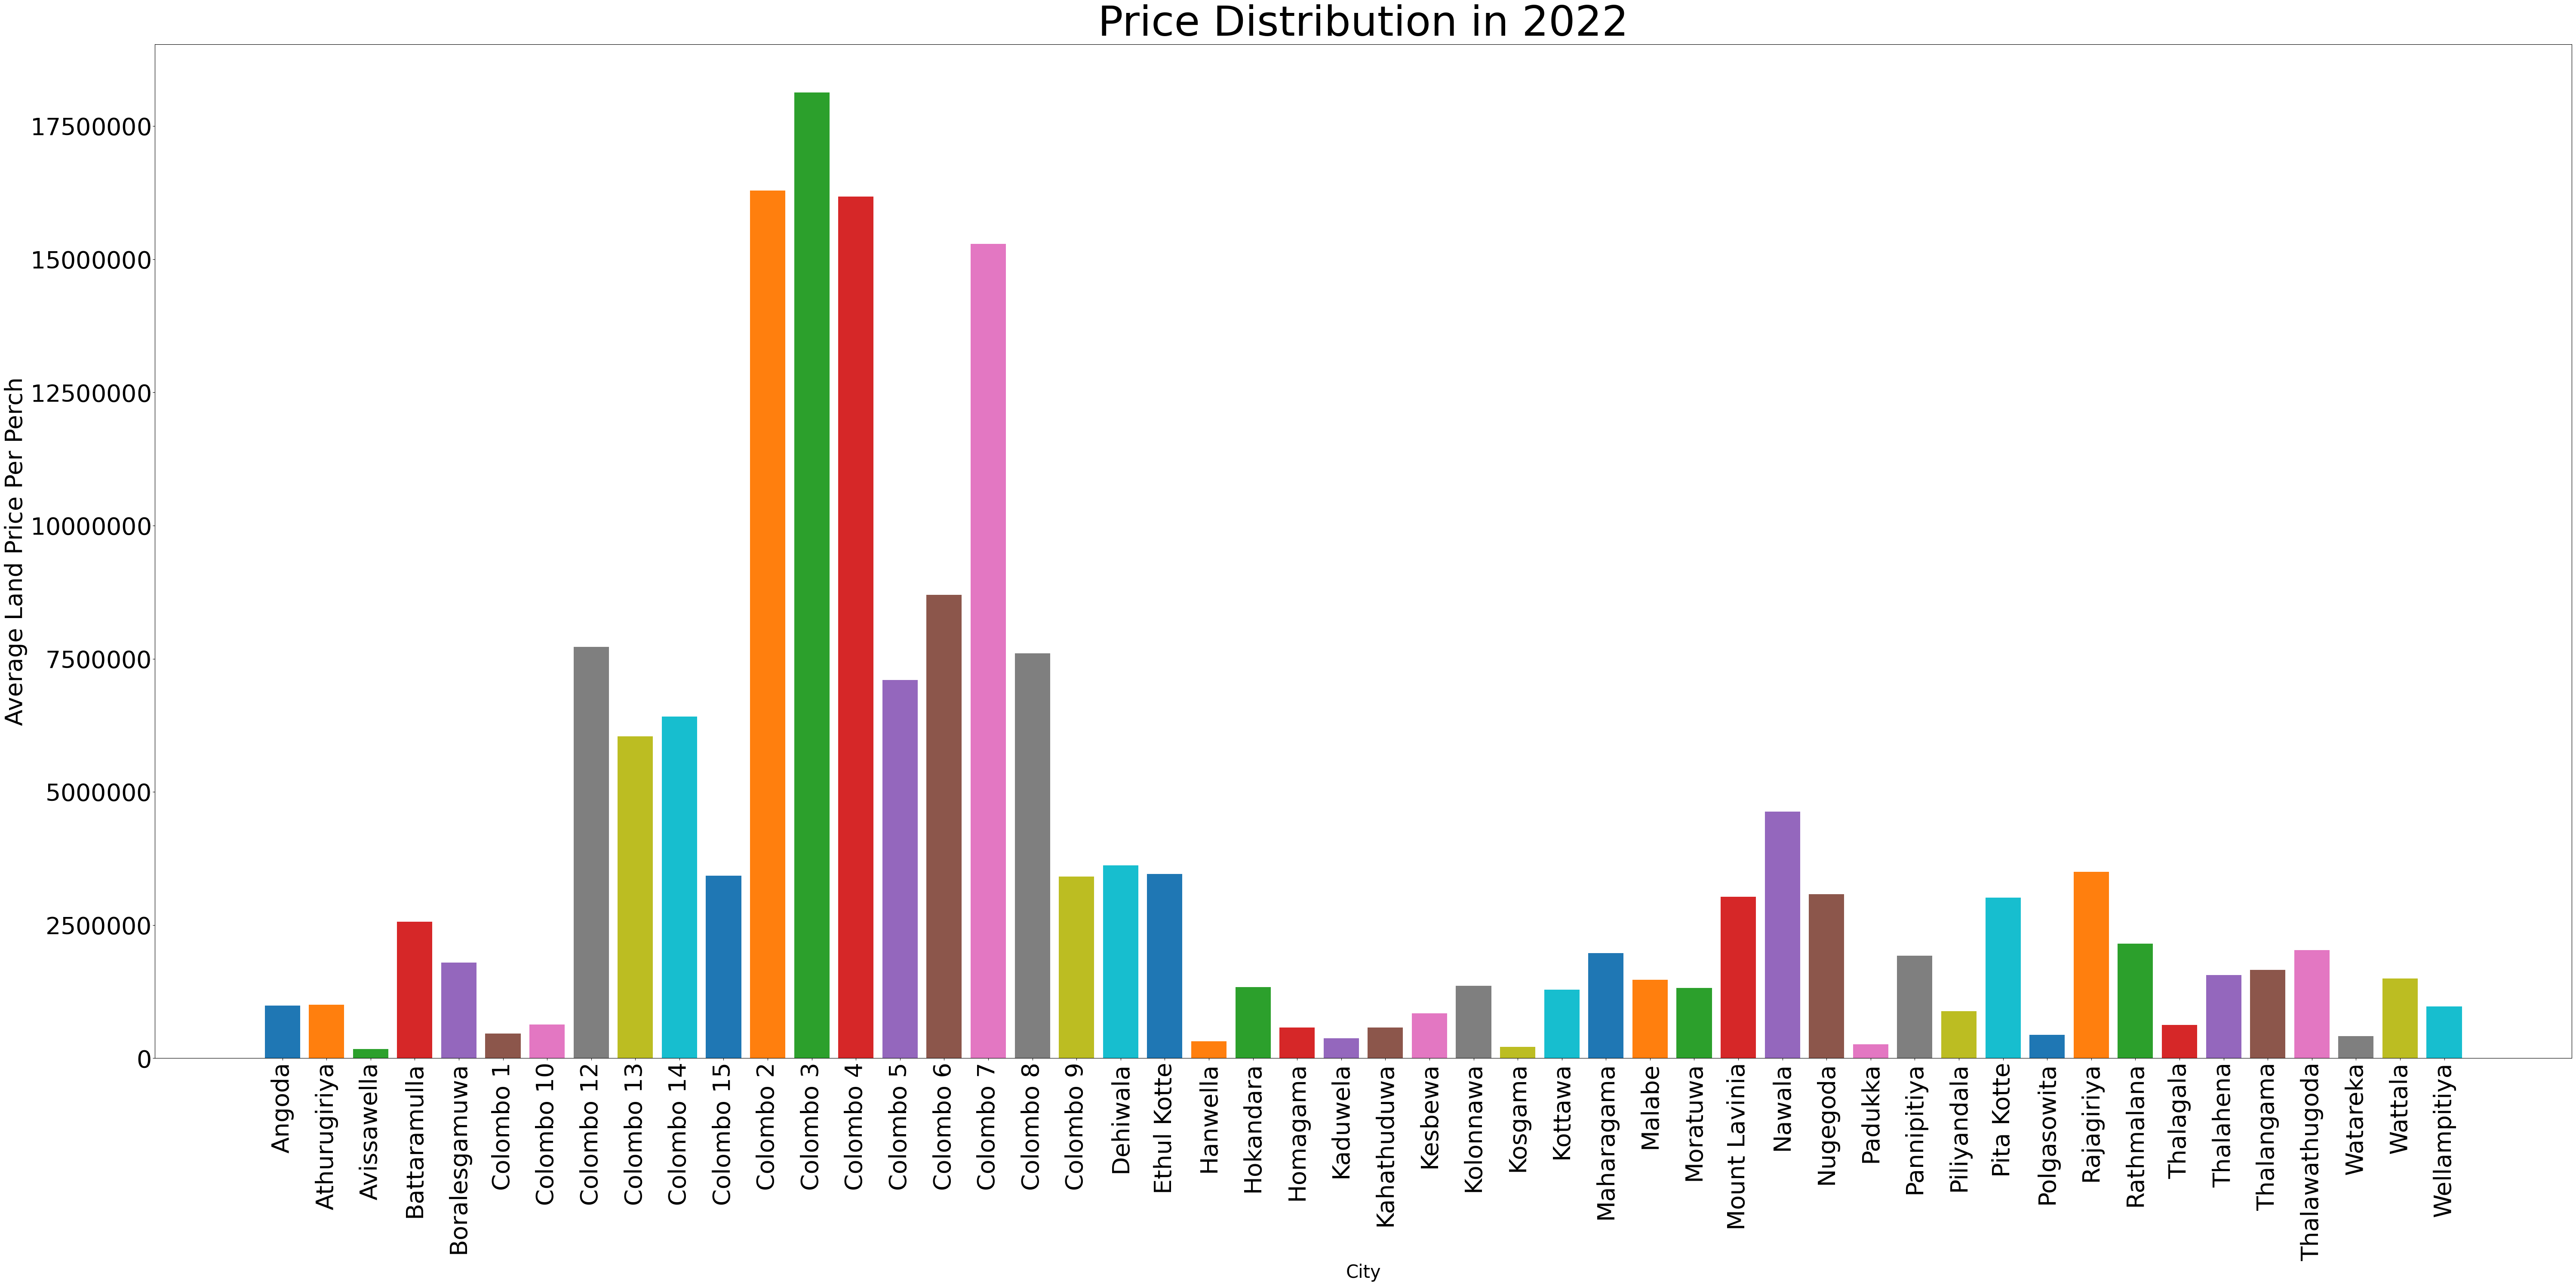

In [29]:
city_grouped_2022 = df_2022.groupby('main_city')

plt.figure(figsize=(60, 30)) 

for name, group in city_grouped_2022:
    filtered_data = group.dropna(subset=['price_land_pp'])
    plt.bar(name, filtered_data['price_land_pp'].mean())

plt.xlabel('City', fontsize=30)
plt.title('Price Distribution in 2022', fontsize=70)
plt.ylabel('Average Land Price Per Perch', fontsize=40)  

plt.xticks(rotation=90, fontsize=40)  

plt.yticks(fontsize=40)  

plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='plain', axis='y')

plt.tight_layout()  
plt.show()

### 2023

In [30]:
df = price_filtered_df

df['posted_date'] = pd.to_datetime(df['posted_date'], format='%m/%d/%Y')

df_2023 = df[(df['posted_date'] >= '01/01/2023') & (df['posted_date'] <= '31/12/2023')]

city_stats = df_2023.groupby('main_city')['price_land_pp'].agg(['min', 'max', 'mean', 'std', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

city_stats.columns = ['min_price', 'max_price', 'mean_price', 'std_price', 'median_price', '25%_percentile', '75%_percentile']

city_stats.reset_index(inplace=True)

city_stats

main_city  min_price  max_price  mean_price  std_price  median_price   
0           Angoda    0.750Mn    0.925Mn     0.824Mn    0.067Mn       0.800Mn  \
1     Athurugiriya    0.400Mn    1.200Mn     0.817Mn    0.167Mn       0.800Mn   
2      Avissawella    0.139Mn    0.218Mn     0.183Mn    0.034Mn       0.198Mn   
3     Battaramulla    1.450Mn    4.000Mn     2.663Mn    0.549Mn       2.600Mn   
4    Boralesgamuwa    1.250Mn    2.800Mn     1.901Mn    0.365Mn       1.850Mn   
5        Colombo 1    0.345Mn    0.685Mn     0.520Mn    0.100Mn       0.550Mn   
6       Colombo 10    0.345Mn    0.670Mn     0.613Mn    0.040Mn       0.600Mn   
7       Colombo 13    4.000Mn    6.500Mn     5.333Mn    0.707Mn       5.500Mn   
8       Colombo 14    6.000Mn    6.500Mn     6.333Mn    0.289Mn       6.500Mn   
9       Colombo 15    2.941Mn    4.500Mn     3.776Mn    0.621Mn       4.000Mn   
10       Colombo 2   15.000Mn   25.000Mn    18.105Mn    2.644Mn      17.000Mn   
11       Colombo 3    9.000Mn   28.000Mn    19.094Mn    3.763Mn      19.000Mn   
12       Colombo 4    9.500Mn   23.000Mn    15.569Mn    3.326Mn      16.000Mn   
13       Colombo 5    5.000Mn   10.500Mn     7.176Mn    1.330Mn       6.500Mn   
14       Colombo 6    4.750Mn   14.286Mn     9.191Mn    1.999Mn       9.200Mn   
15       Colombo 7   10.000Mn   25.000Mn    15.913Mn    3.994Mn      16.000Mn   
16       Colombo 8    5.500Mn   10.500Mn     7.676Mn    1.258Mn       8.000Mn   
17       Colombo 9    3.750Mn    6.000Mn     5.244Mn    0.685Mn       5.163Mn   
18        Dehiwala    2.000Mn    5.700Mn     3.711Mn    0.696Mn       3.700Mn   
19     Ethul Kotte    2.000Mn    4.500Mn     3.284Mn    0.636Mn       3.500Mn   
20        Hanwella    0.185Mn    0.385Mn     0.319Mn    0.032Mn       0.330Mn   
21       Hokandara    0.900Mn    1.700Mn     1.275Mn    0.231Mn       1.350Mn   
22        Homagama    0.300Mn    0.852Mn     0.579Mn    0.068Mn       0.570Mn   
23        Kaduwela    0.170Mn    0.565Mn     0.460Mn    0.047Mn       0.475Mn   
24     Kahathuduwa    0.330Mn    0.800Mn     0.511Mn    0.099Mn       0.500Mn   
25         Kesbewa    0.350Mn    1.100Mn     0.706Mn    0.242Mn       0.590Mn   
26       Kolonnawa    1.000Mn    1.000Mn     1.000Mn        NaN       1.000Mn   
27         Kosgama    0.185Mn    0.250Mn     0.214Mn    0.024Mn       0.215Mn   
28         Kottawa    0.552Mn    1.475Mn     1.101Mn    0.234Mn       1.150Mn   
29      Maharagama    1.333Mn    2.900Mn     1.950Mn    0.272Mn       1.950Mn   
30          Malabe    0.900Mn    2.500Mn     1.481Mn    0.274Mn       1.500Mn   
31        Moratuwa    0.875Mn    2.000Mn     1.422Mn    0.235Mn       1.440Mn   
32   Mount Lavinia    2.200Mn    4.643Mn     3.338Mn    0.451Mn       3.300Mn   
33          Nawala    2.241Mn    6.000Mn     4.577Mn    0.812Mn       4.783Mn   
34        Nugegoda    1.700Mn    5.000Mn     3.097Mn    0.623Mn       3.000Mn   
35         Padukka    0.170Mn    0.450Mn     0.274Mn    0.046Mn       0.260Mn   
36     Pannipitiya    0.773Mn    2.400Mn     1.783Mn    0.269Mn       1.900Mn   
37     Piliyandala    0.240Mn    1.450Mn     0.798Mn    0.254Mn       0.875Mn   
38      Pita Kotte    1.850Mn    4.200Mn     2.986Mn    0.473Mn       3.000Mn   
39     Polgasowita    0.275Mn    0.800Mn     0.418Mn    0.053Mn       0.430Mn   
40      Rajagiriya    1.600Mn    6.500Mn     3.858Mn    1.048Mn       3.786Mn   
41      Rathmalana    1.000Mn    3.000Mn     2.065Mn    0.454Mn       2.000Mn   
42       Thalagala    0.500Mn    0.550Mn     0.525Mn    0.035Mn       0.525Mn   
43       Thalahena    1.550Mn    2.000Mn     1.700Mn    0.177Mn       1.650Mn   
44      Thalangama    2.000Mn    2.700Mn     2.319Mn    0.227Mn       2.300Mn   
45  Thalawathugoda    0.900Mn    3.000Mn     1.955Mn    0.362Mn       1.961Mn   
46        Watareka    0.357Mn    0.550Mn     0.422Mn    0.042Mn       0.400Mn   
47         Wattala    1.500Mn    1.500Mn     1.500Mn    0.000Mn       1.500Mn   
48    Wellampitiya    0.800Mn    1.050Mn

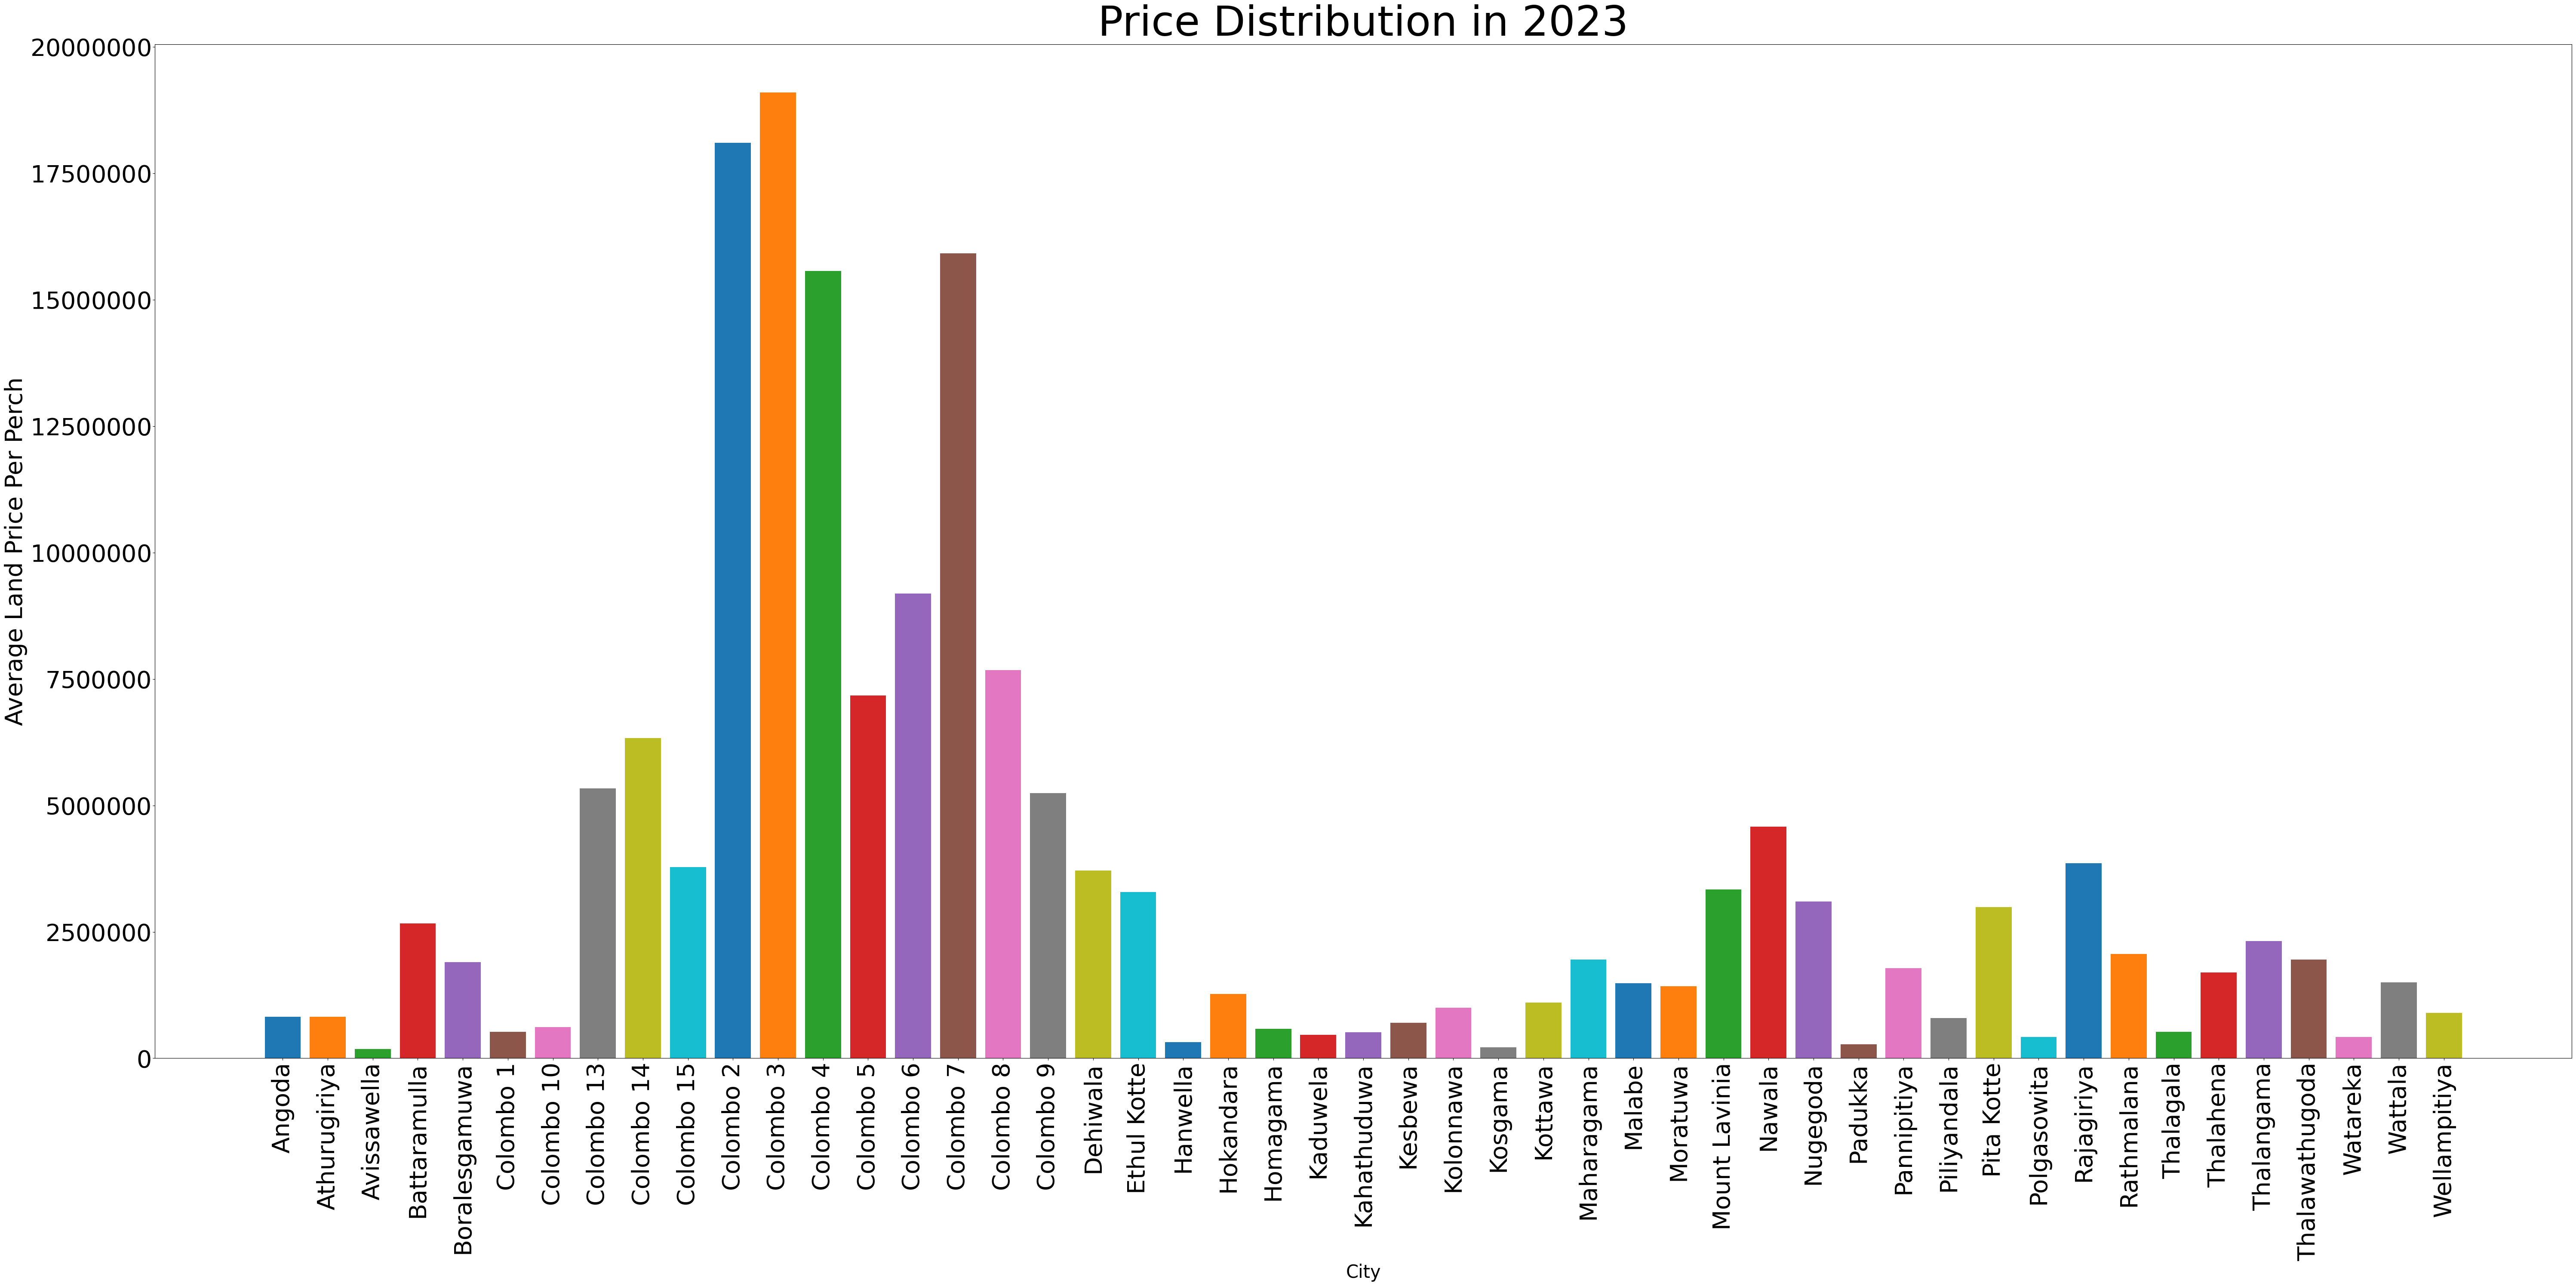

In [31]:
city_grouped_2023 = df_2023.groupby('main_city')

plt.figure(figsize=(60, 30)) 

for name, group in city_grouped_2023:
    filtered_data = group.dropna(subset=['price_land_pp'])
    plt.bar(name, filtered_data['price_land_pp'].mean())

plt.xlabel('City', fontsize=30)
plt.title('Price Distribution in 2023', fontsize=70)
plt.ylabel('Average Land Price Per Perch', fontsize=40)  

plt.xticks(rotation=90, fontsize=40)  

plt.yticks(fontsize=40)  

plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='plain', axis='y')

plt.tight_layout()  
plt.show()

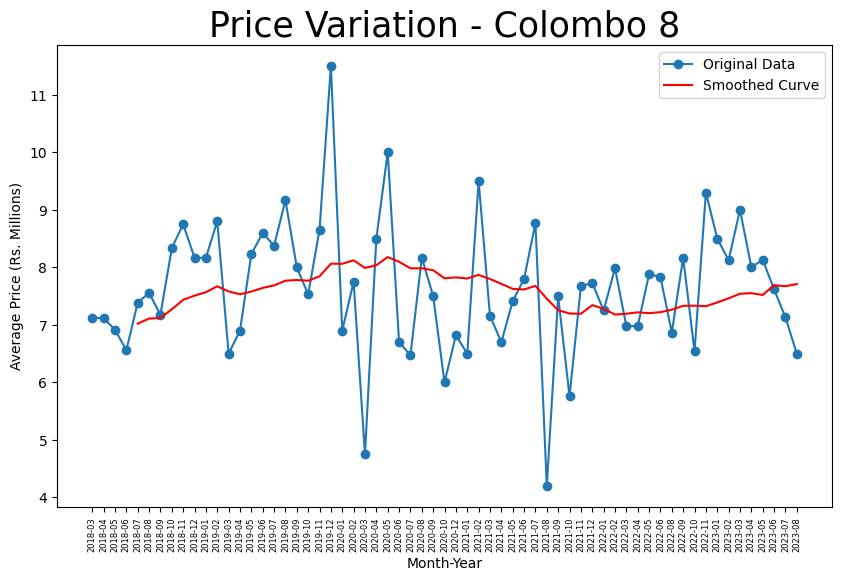

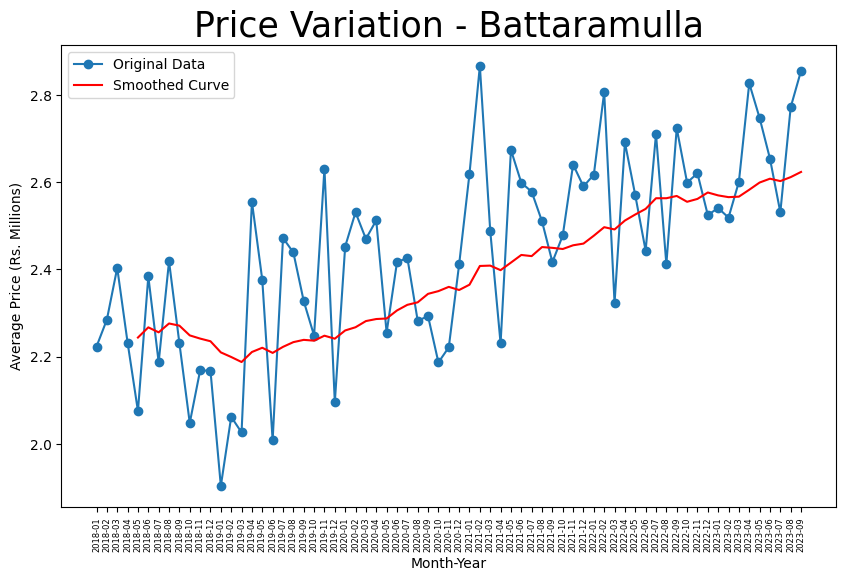

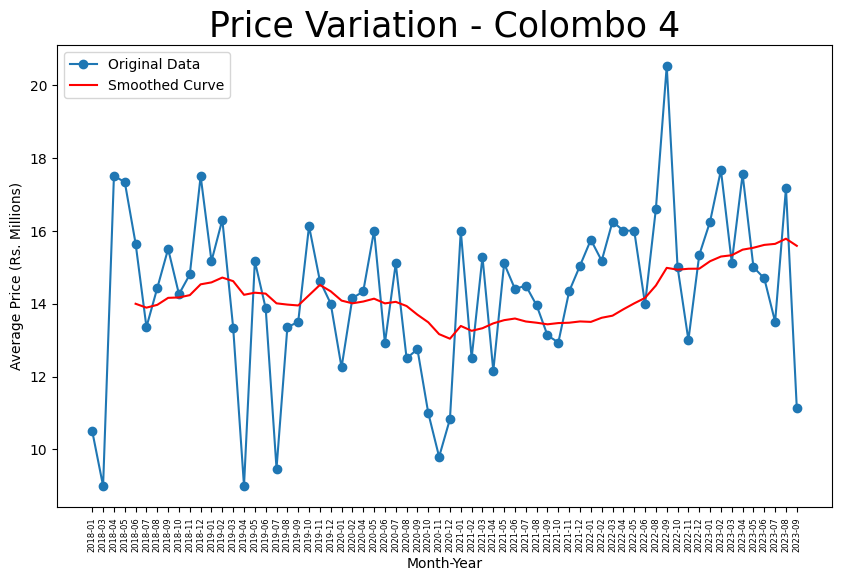

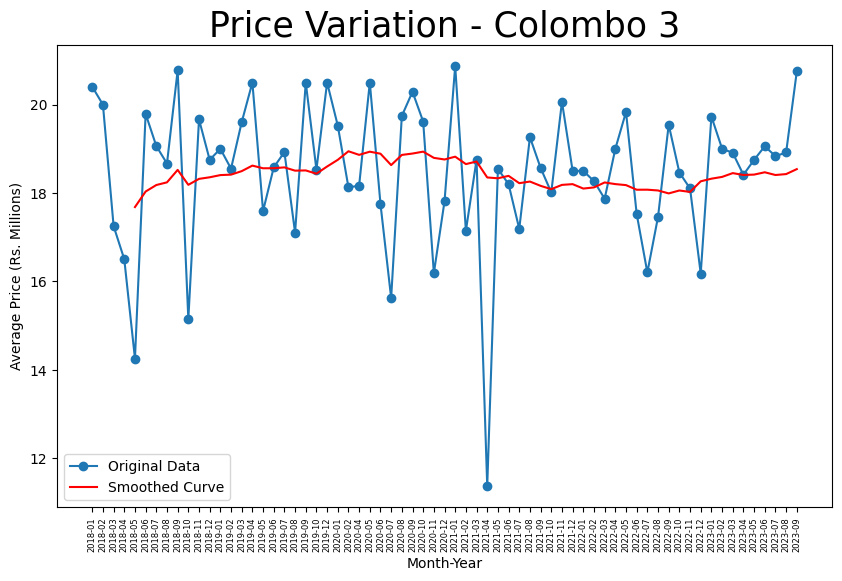

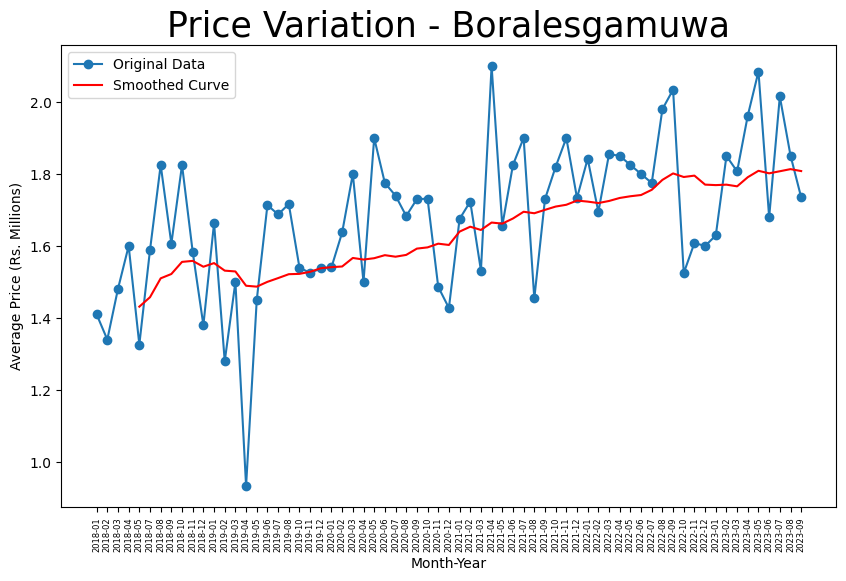

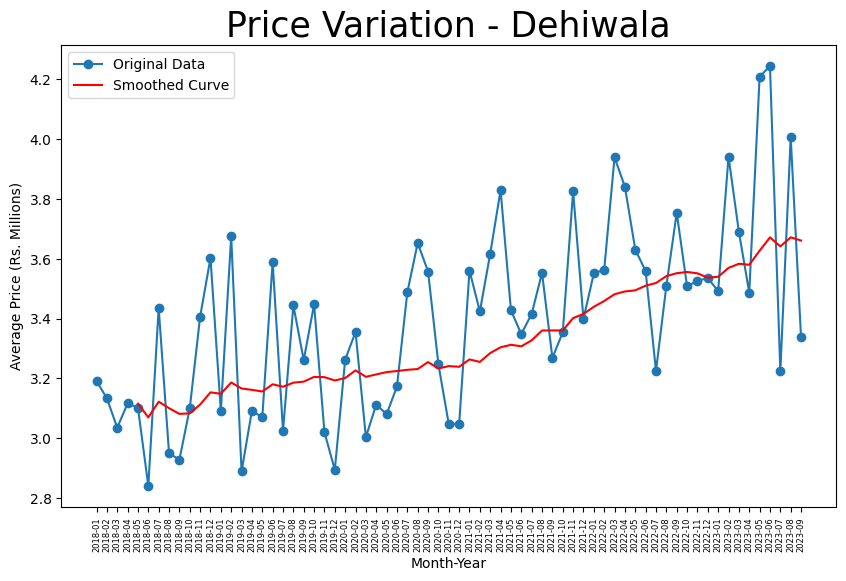

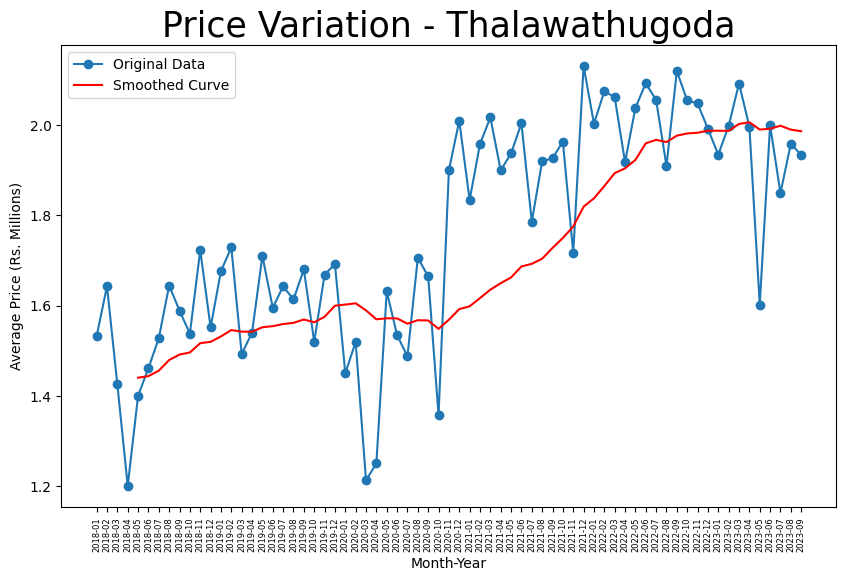

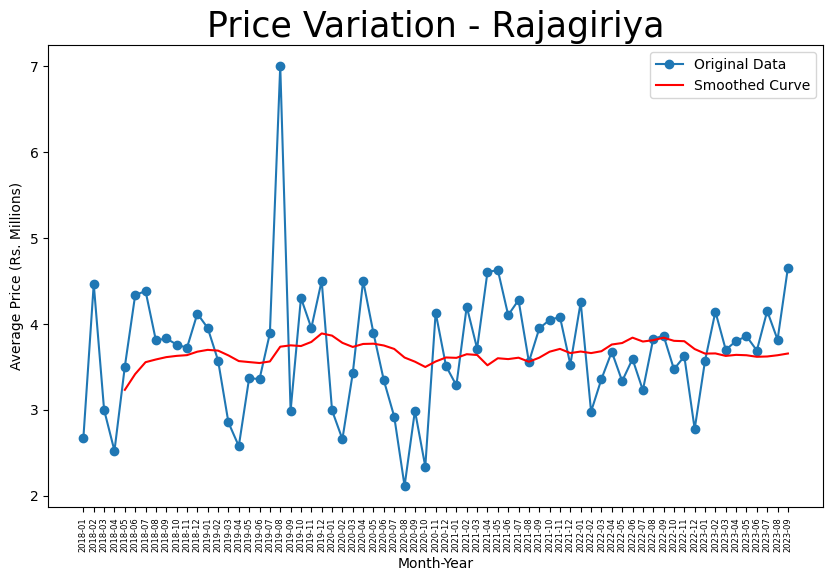

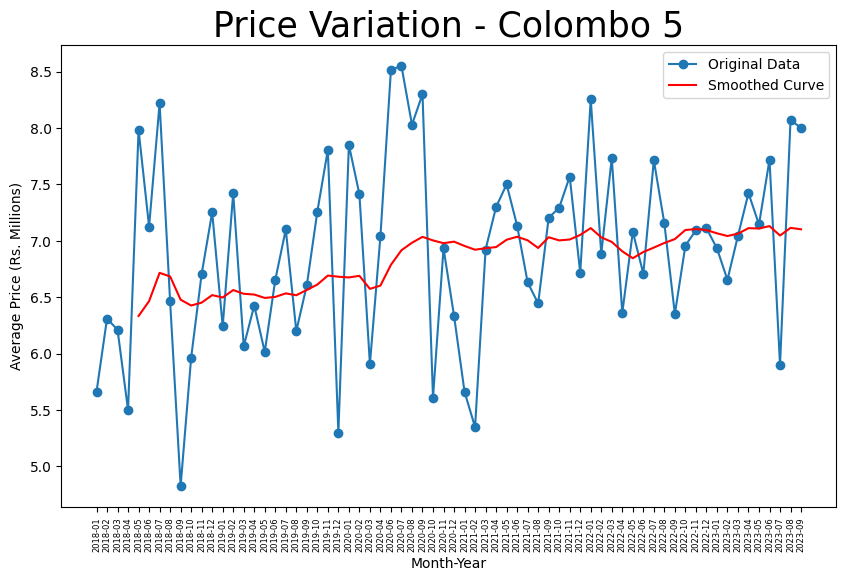

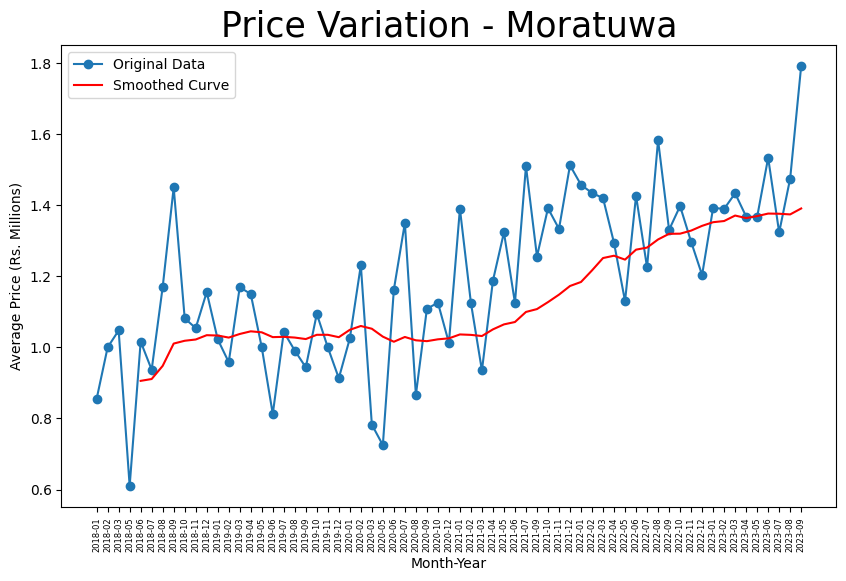

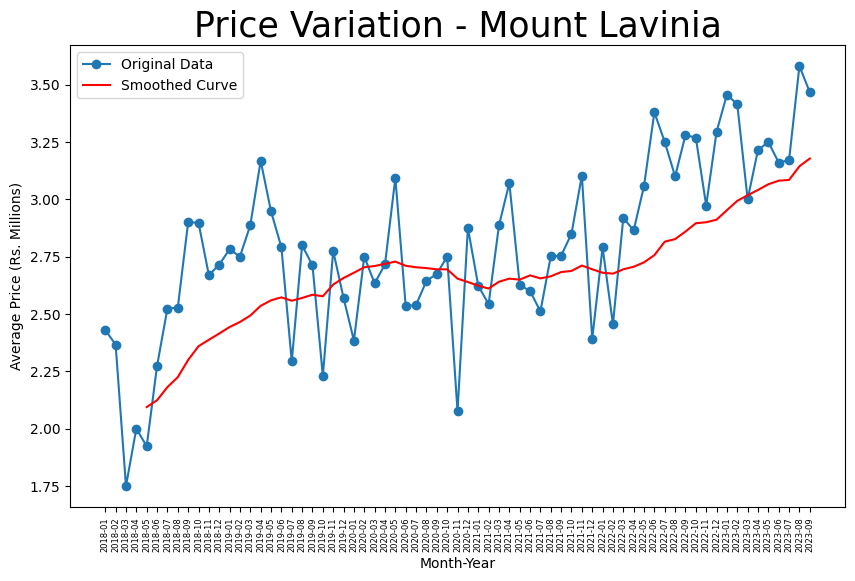

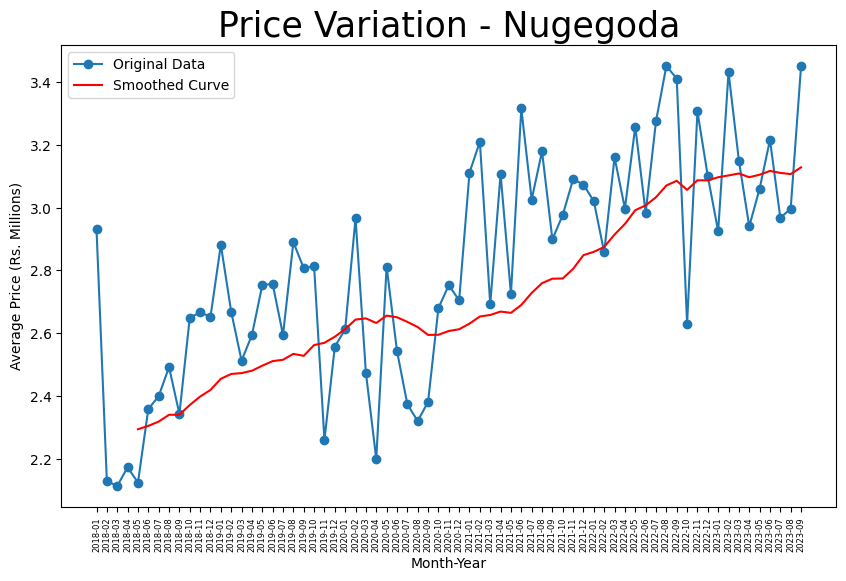

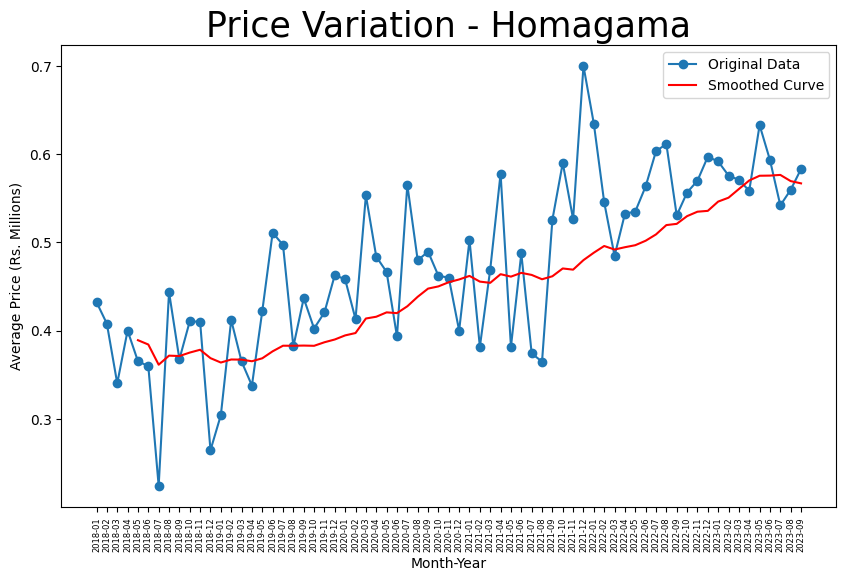

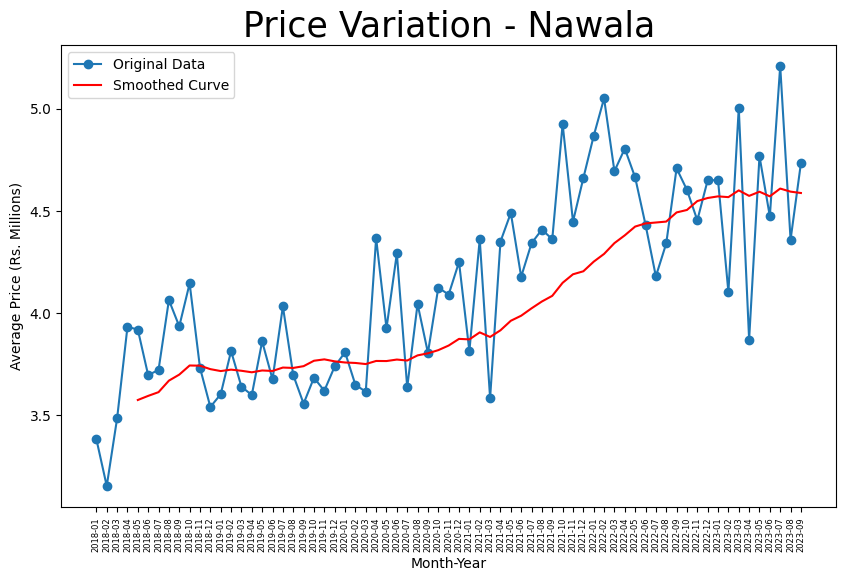

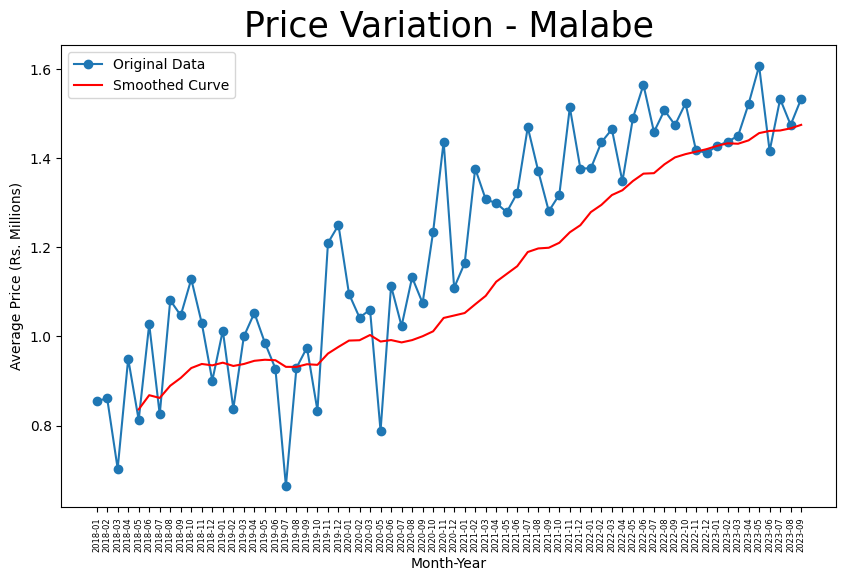

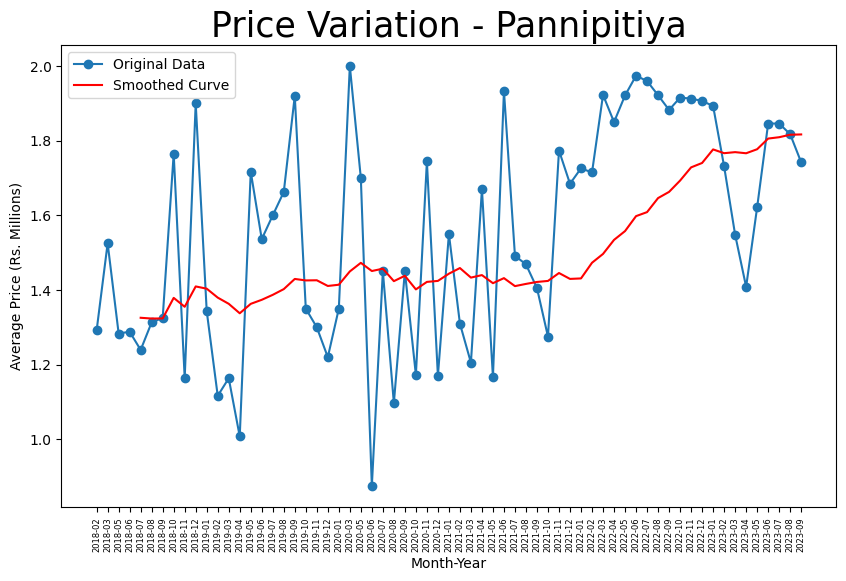

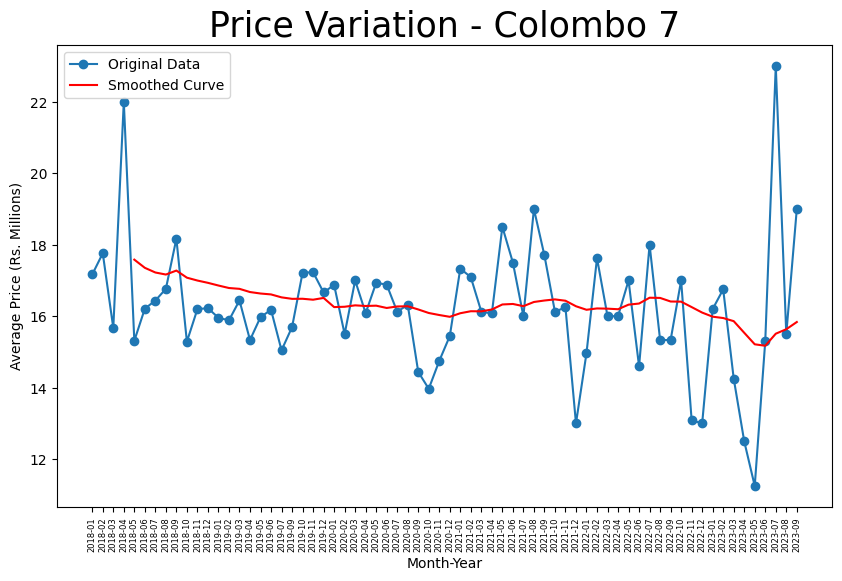

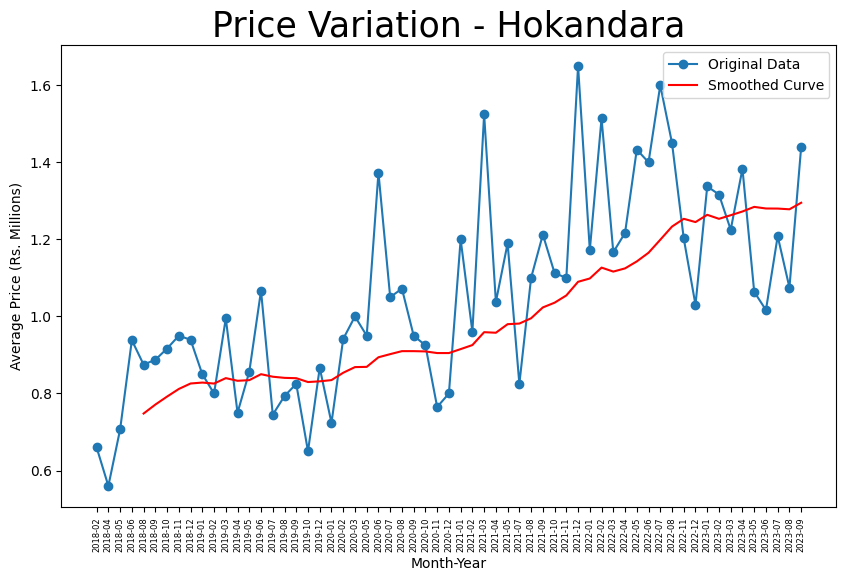

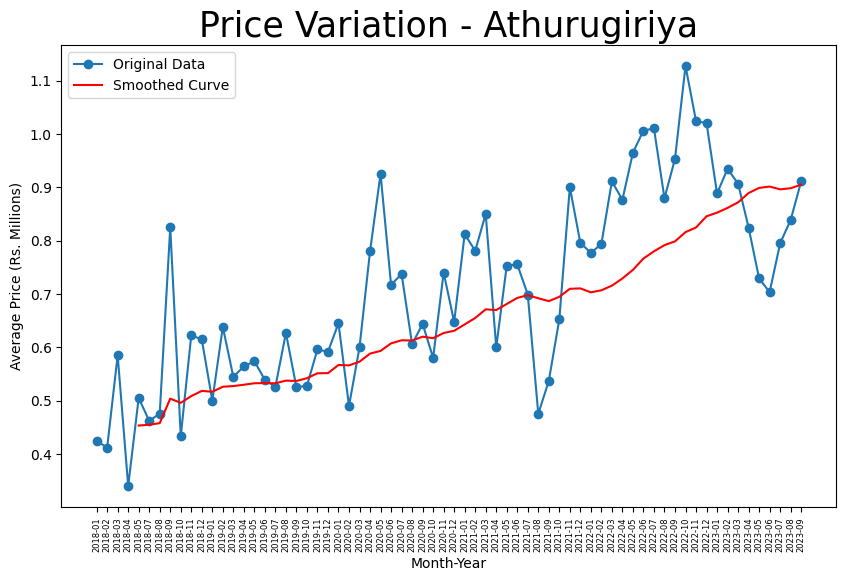

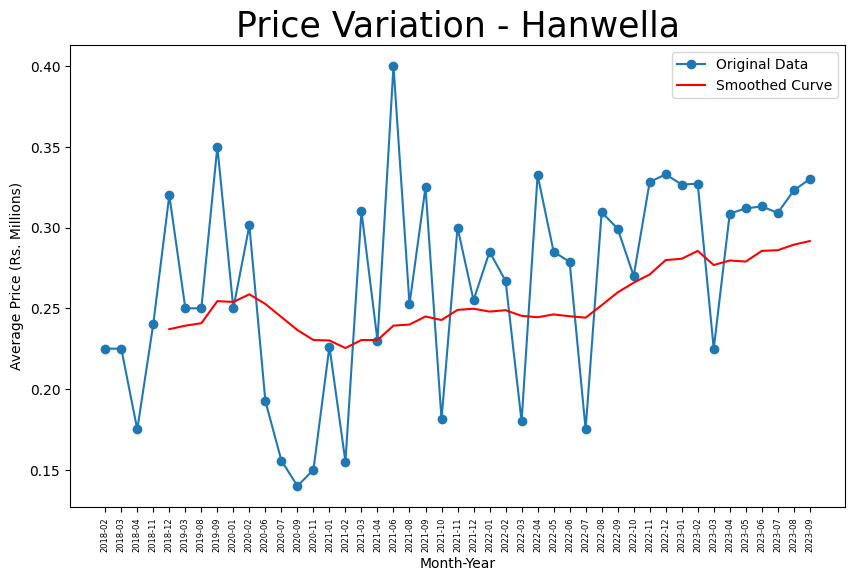

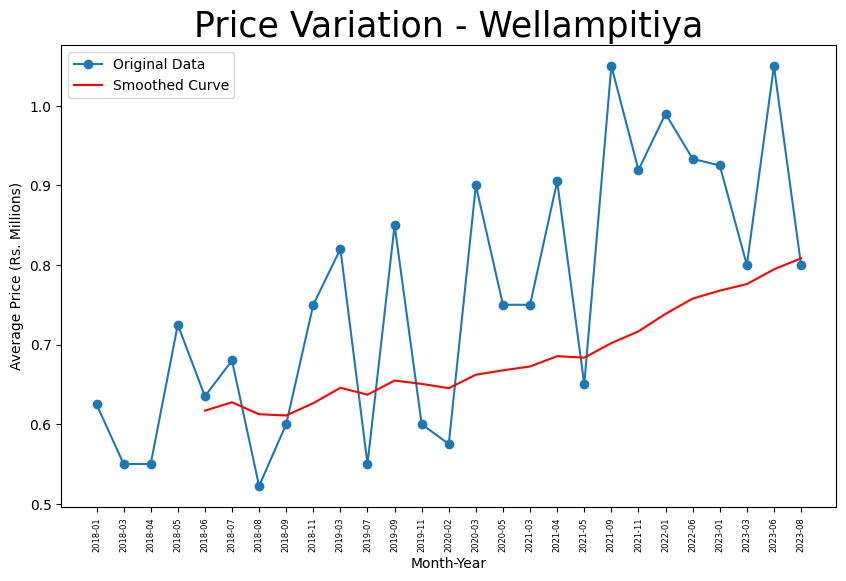

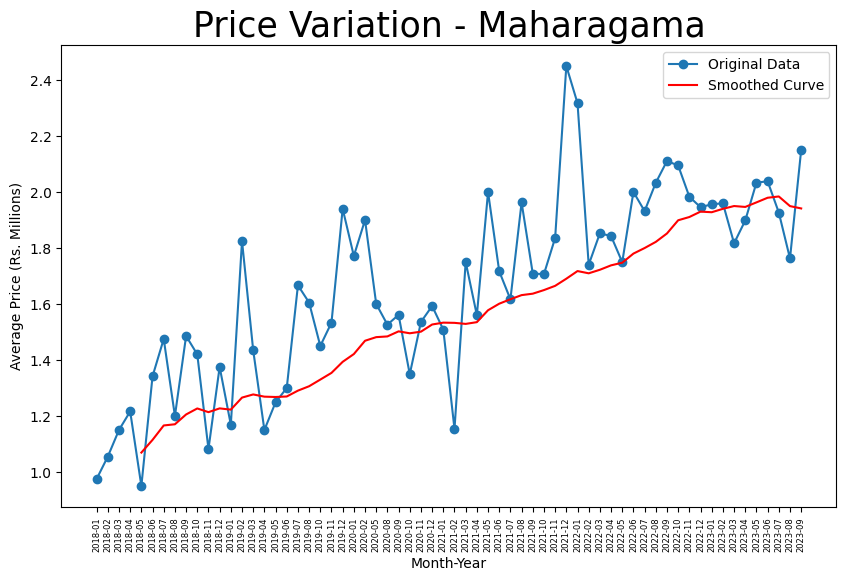

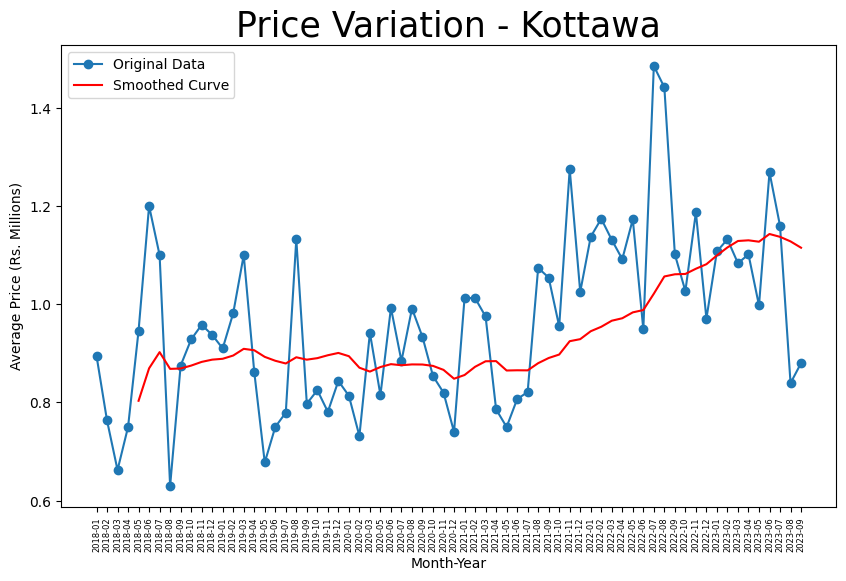

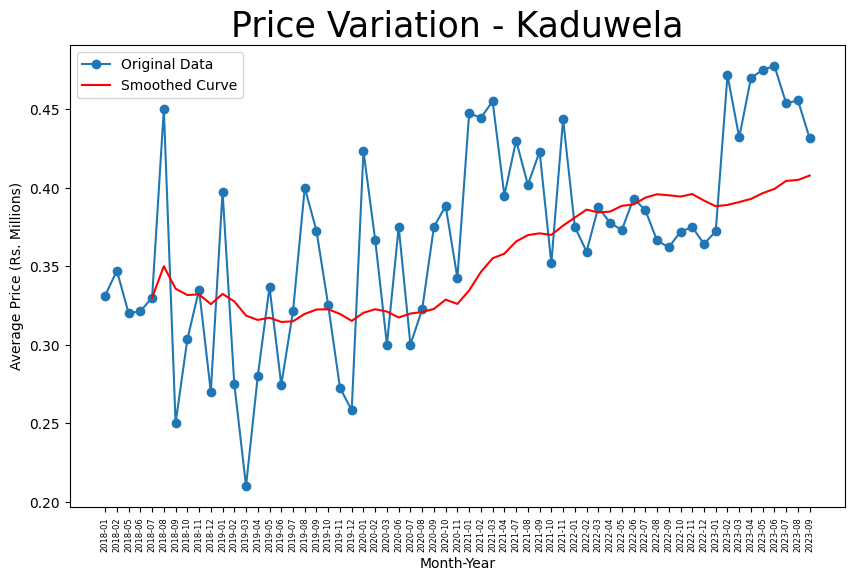

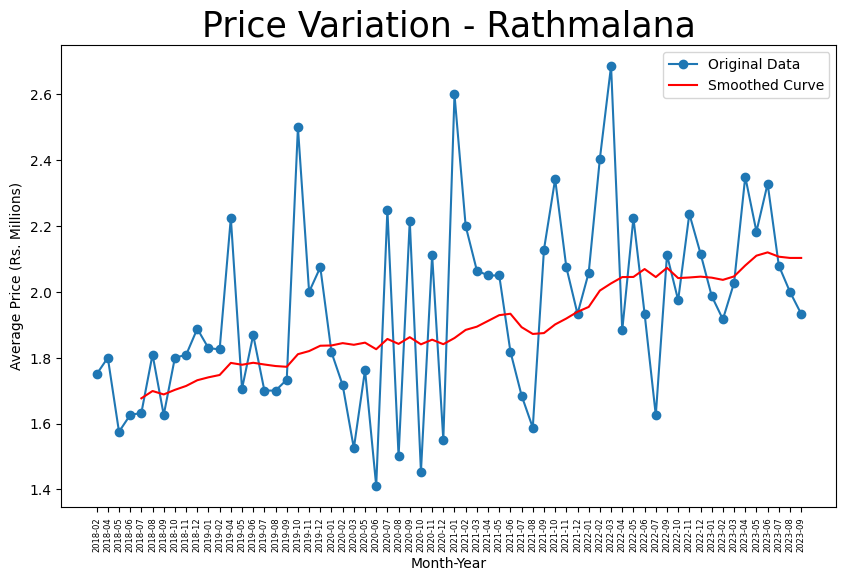

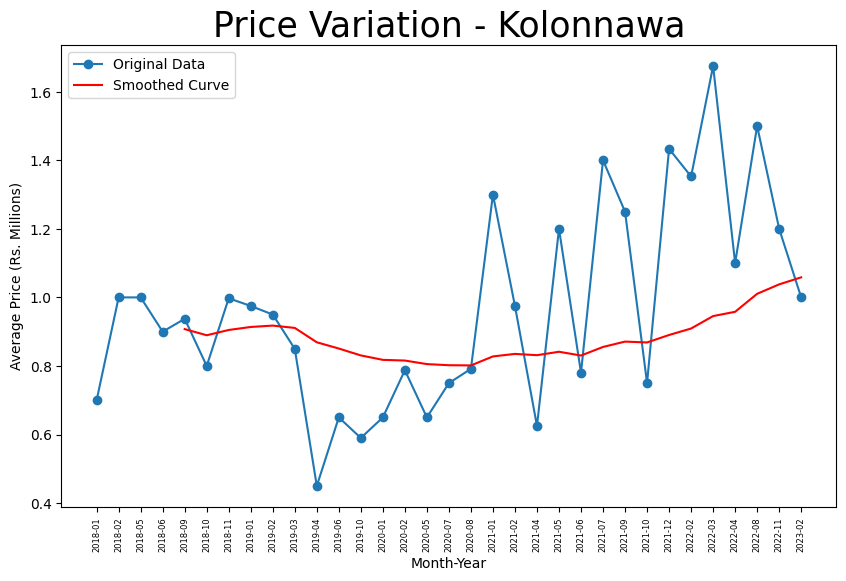

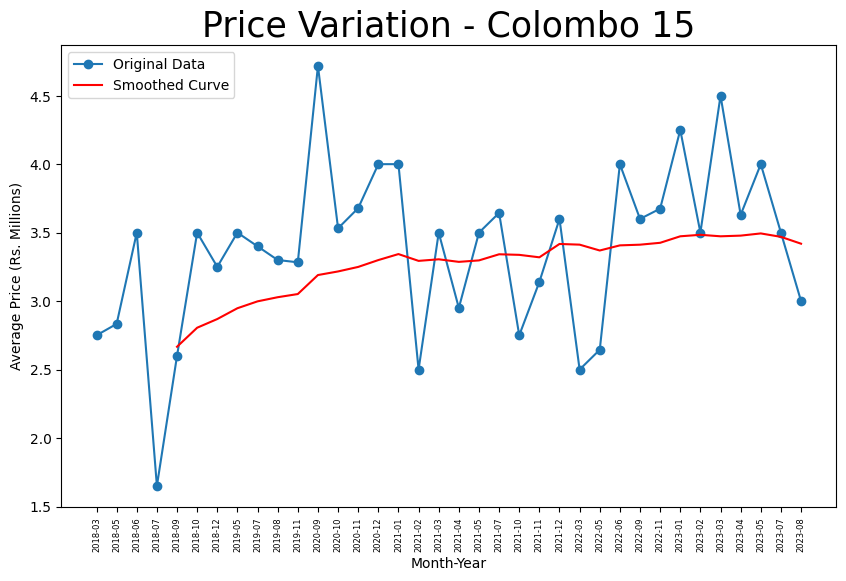

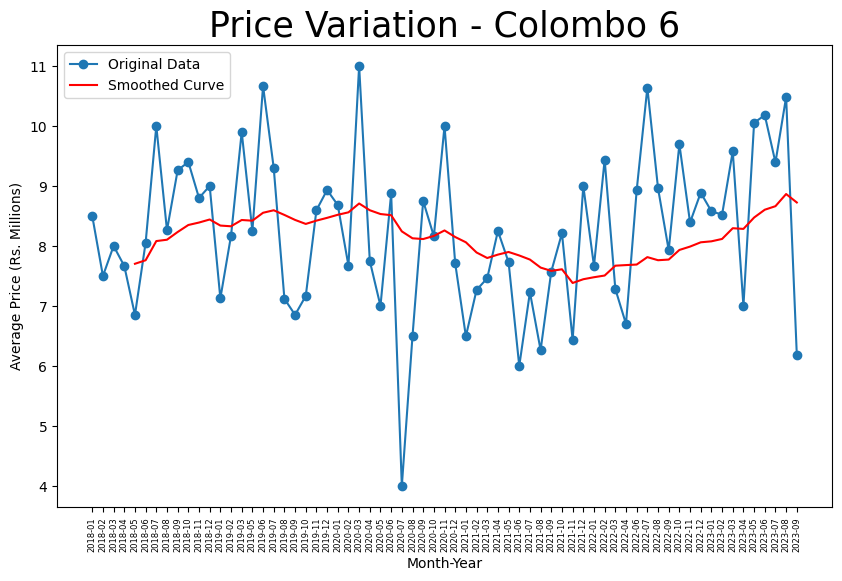

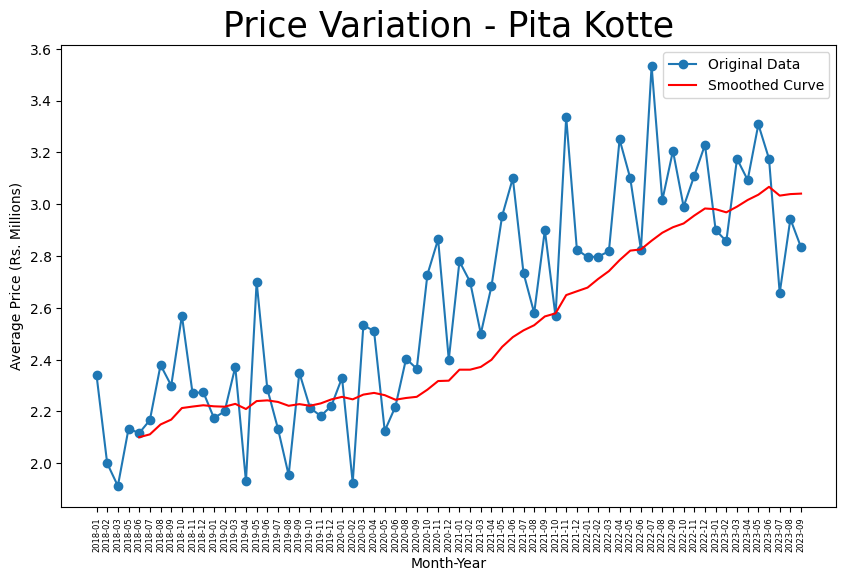

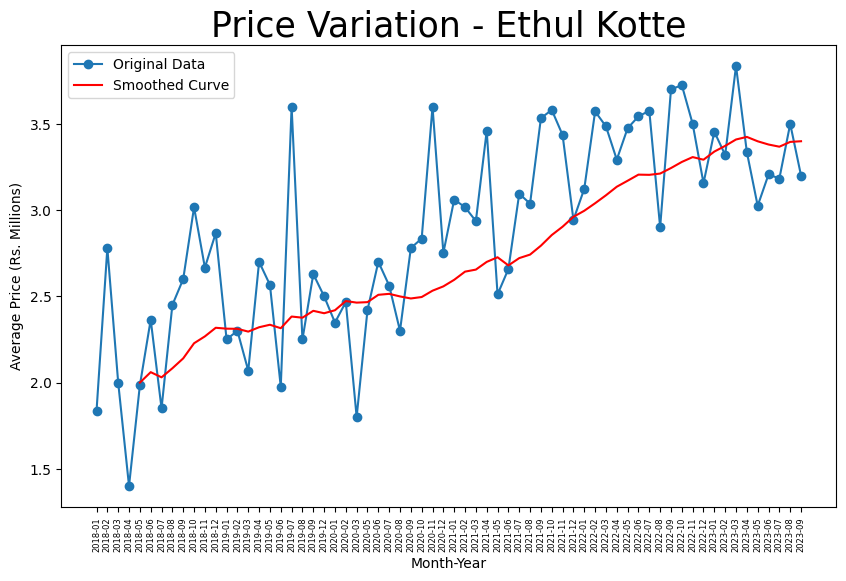

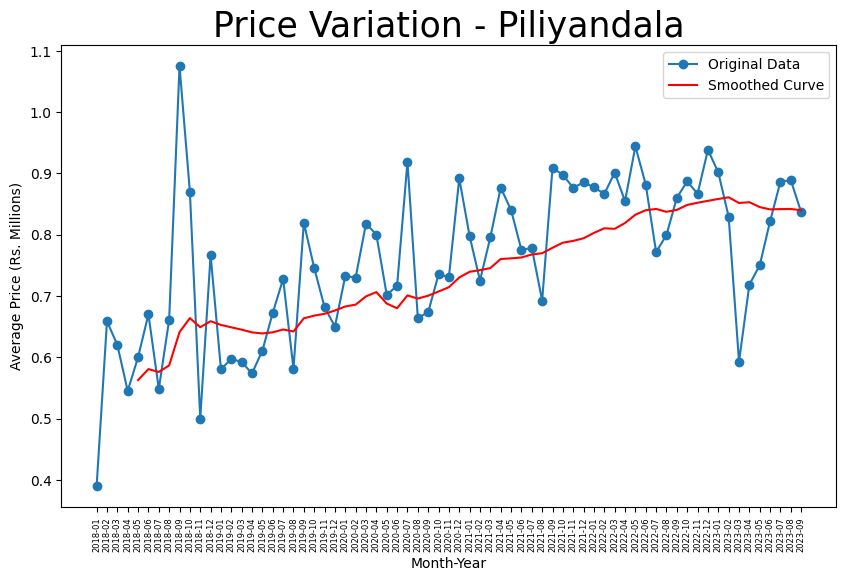

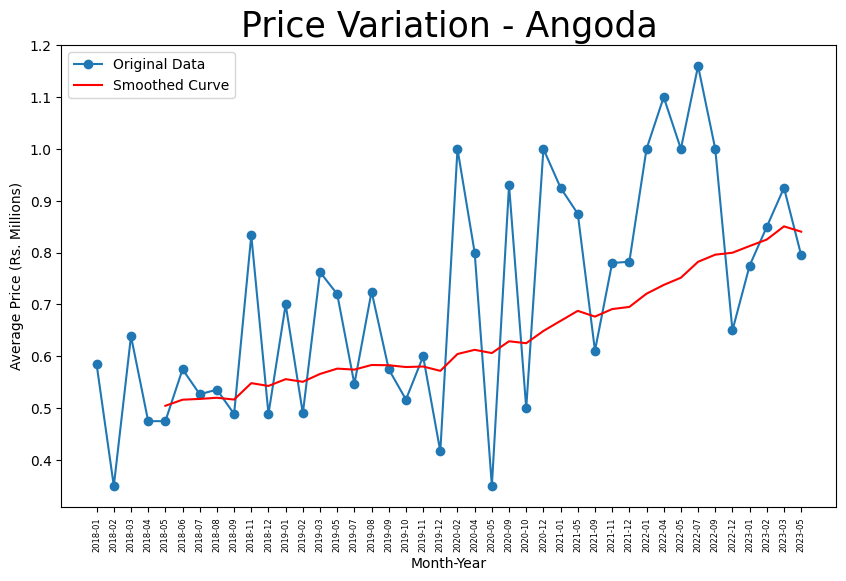

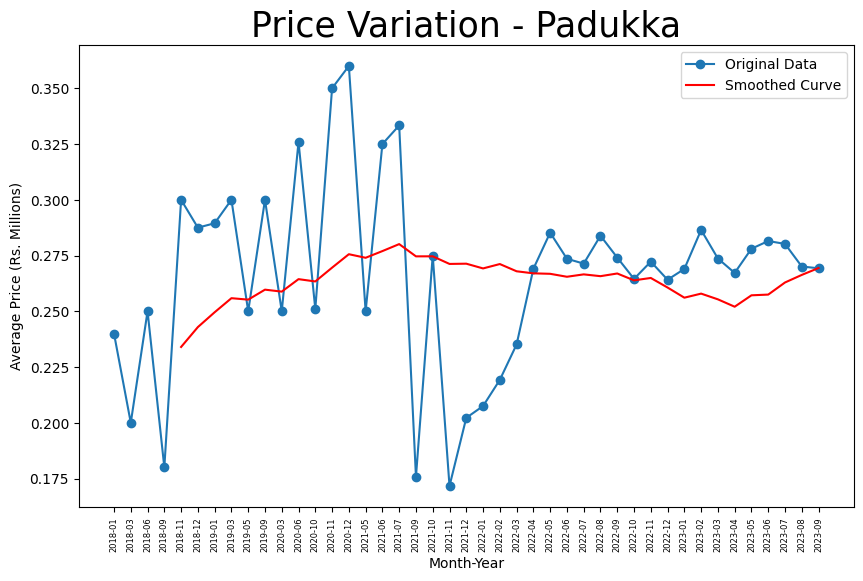

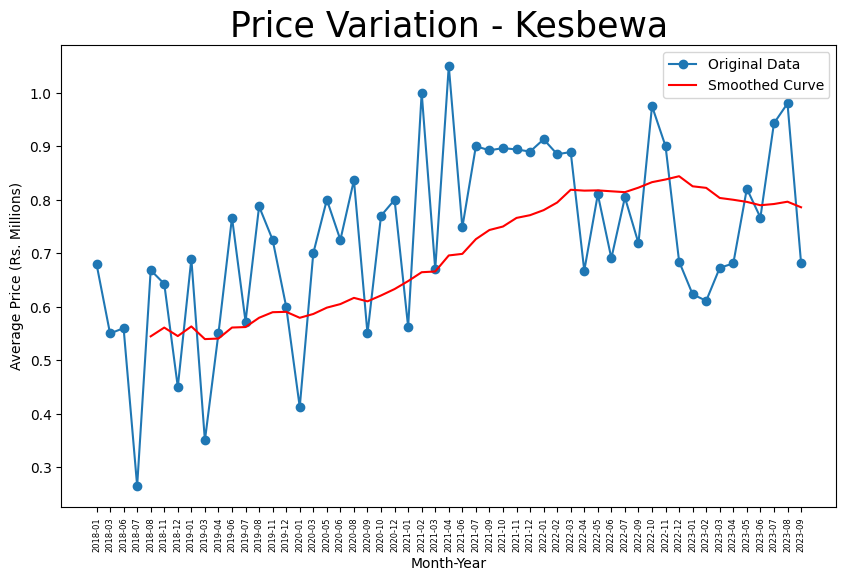

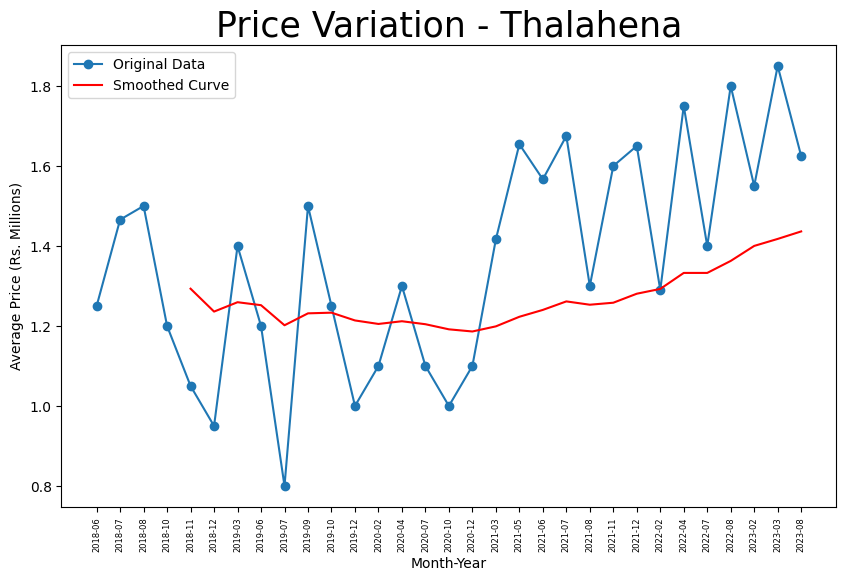

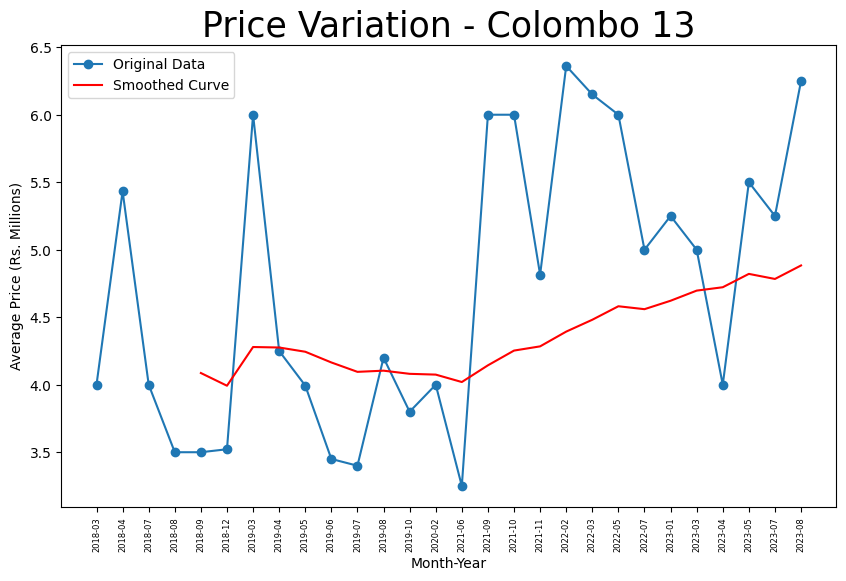

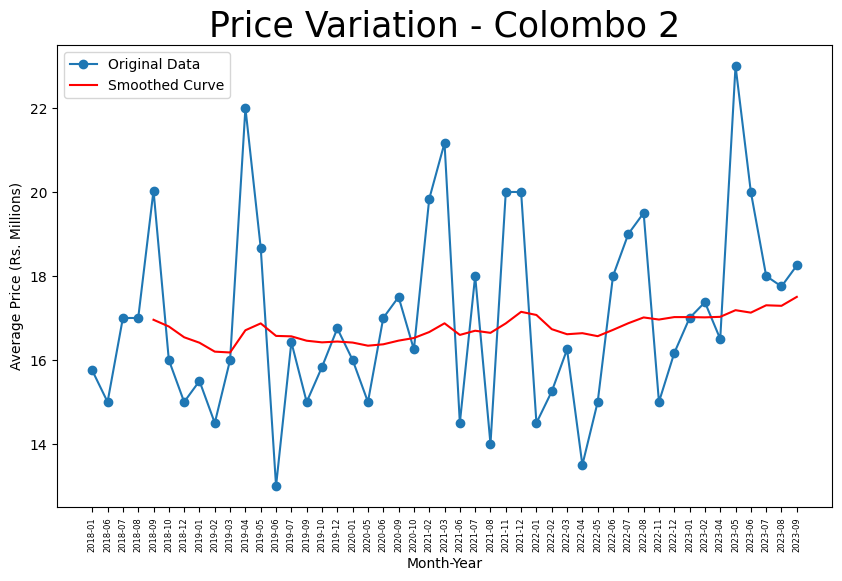

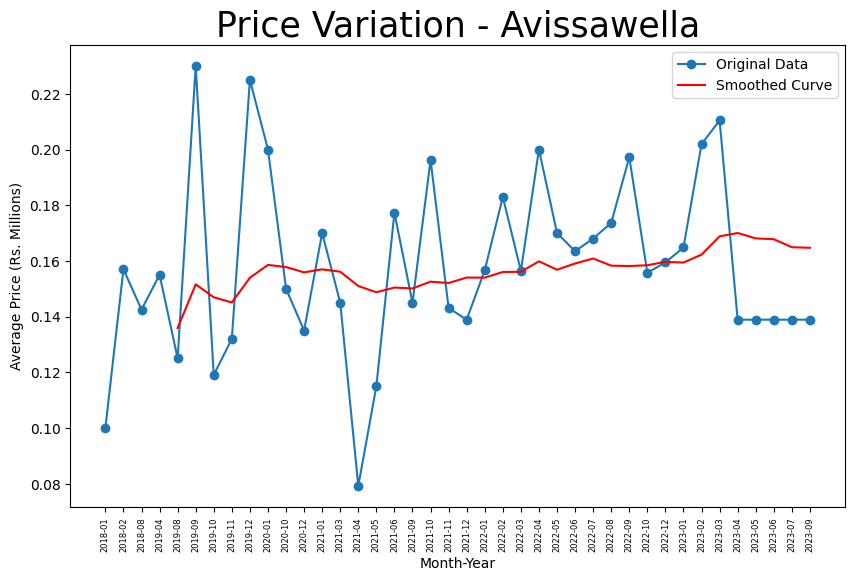

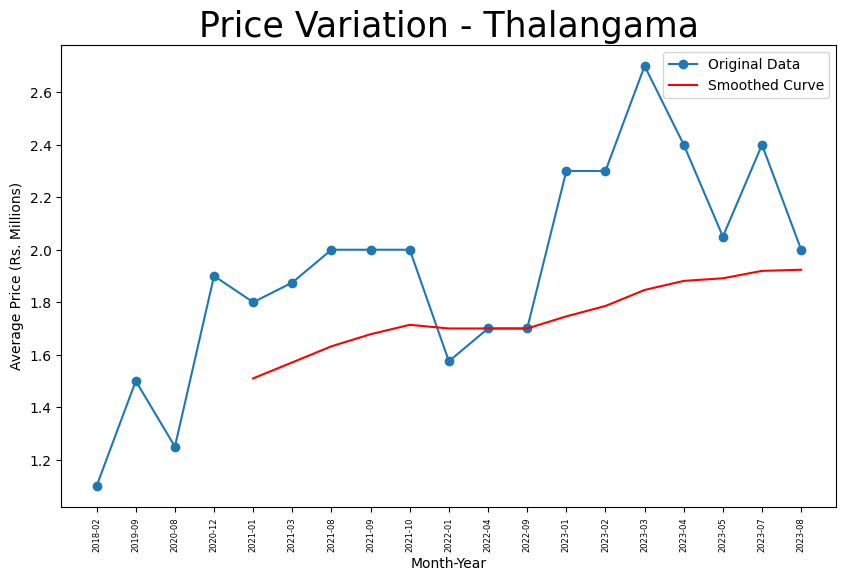

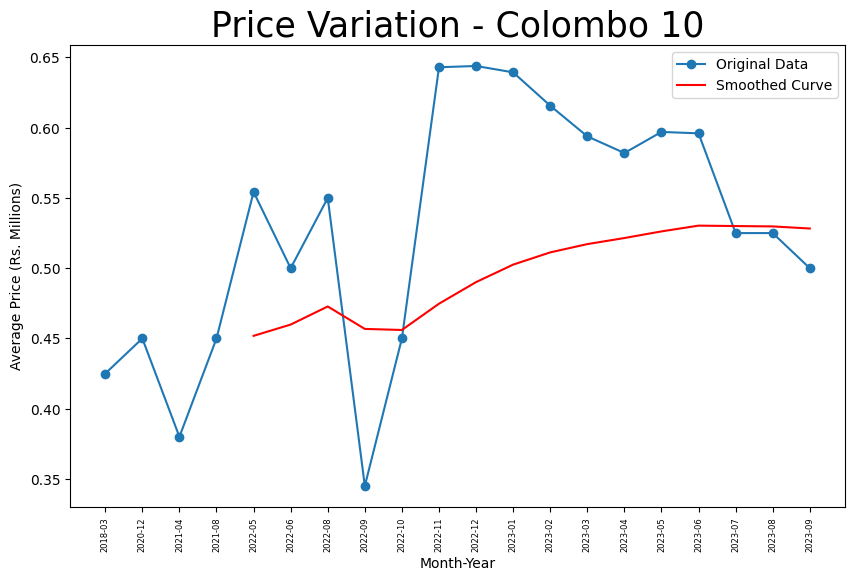

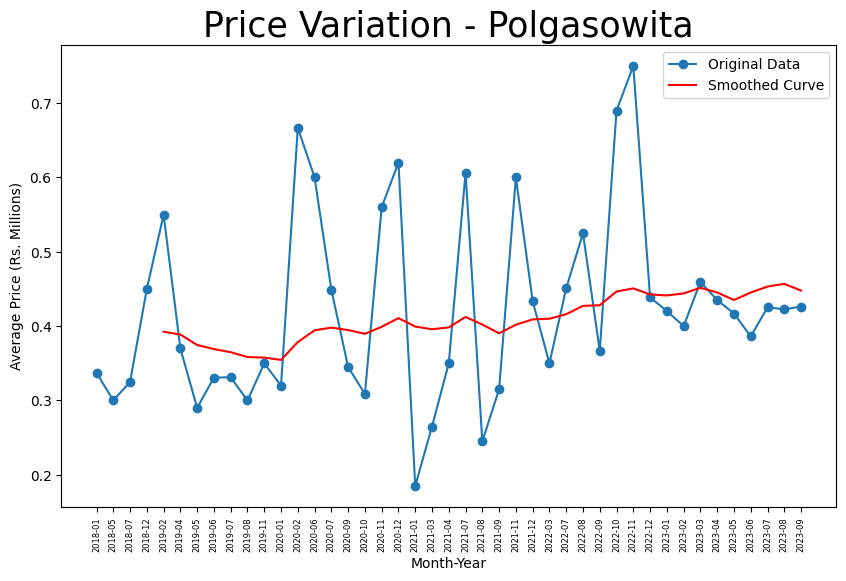

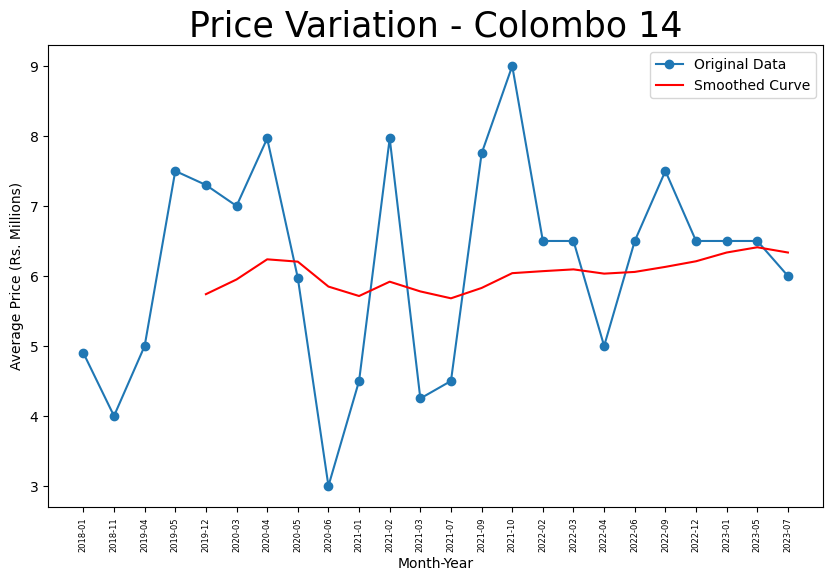

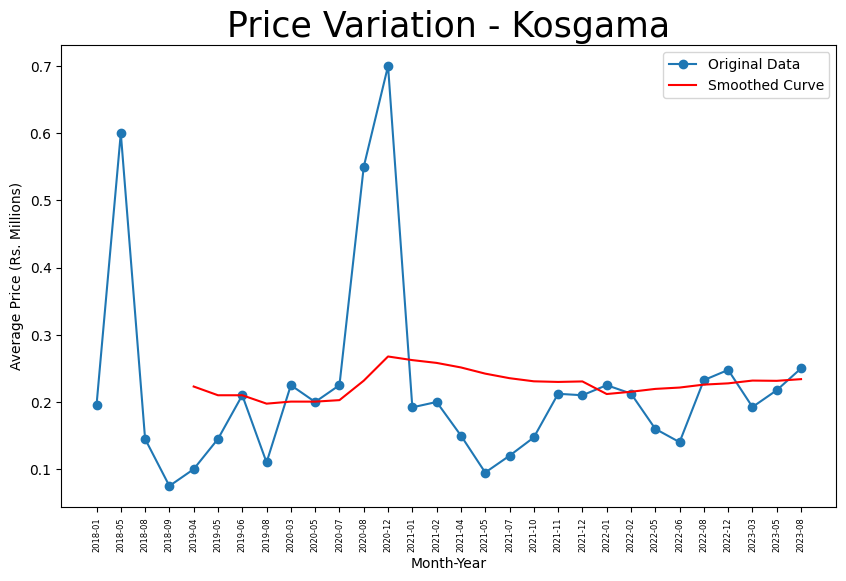

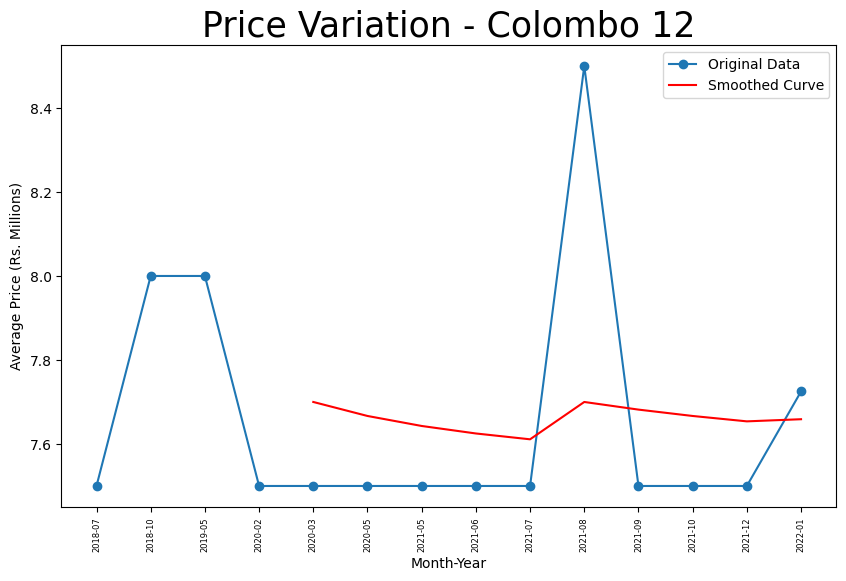

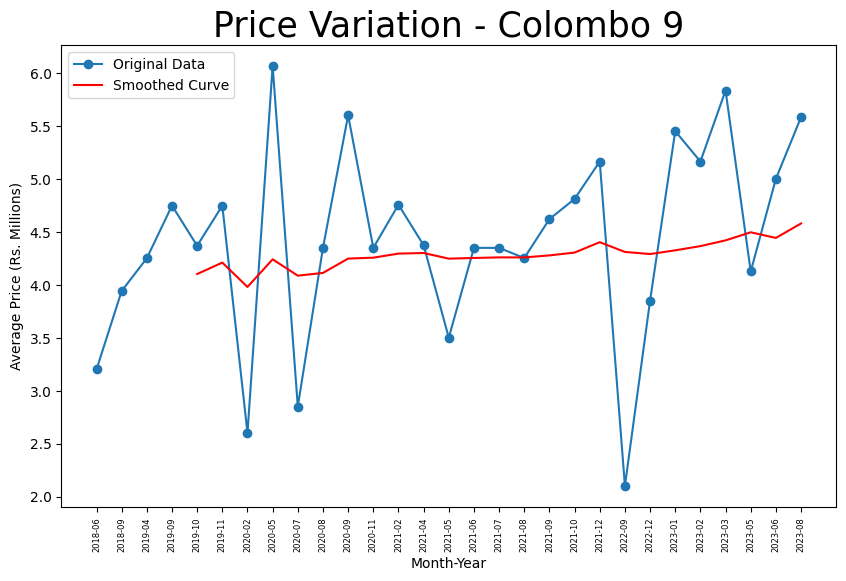

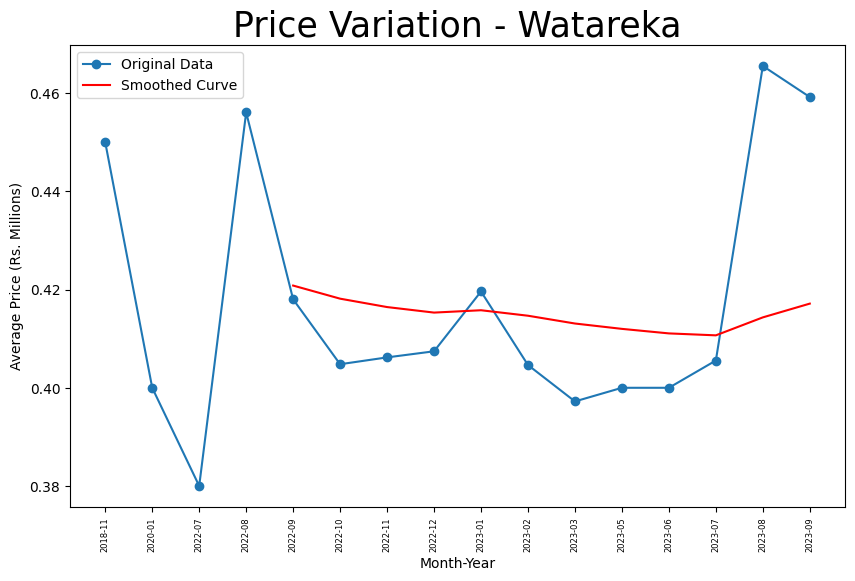

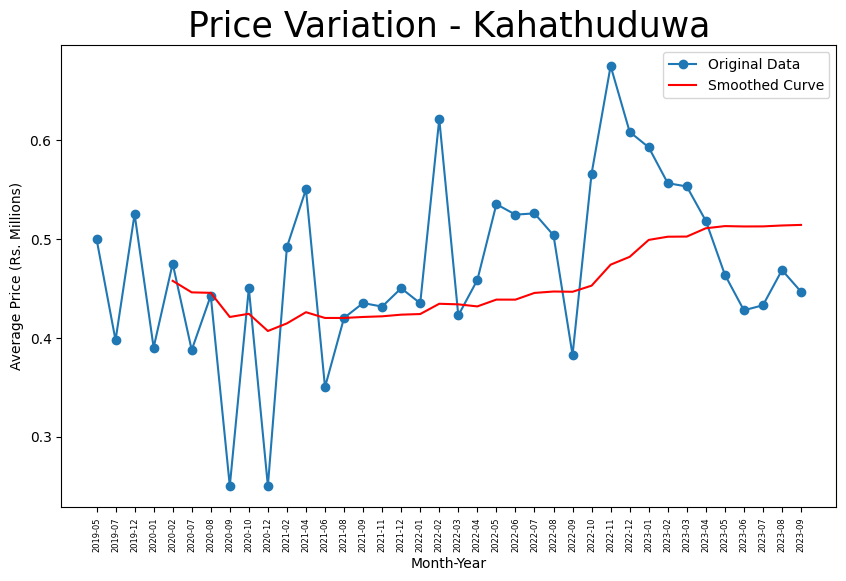

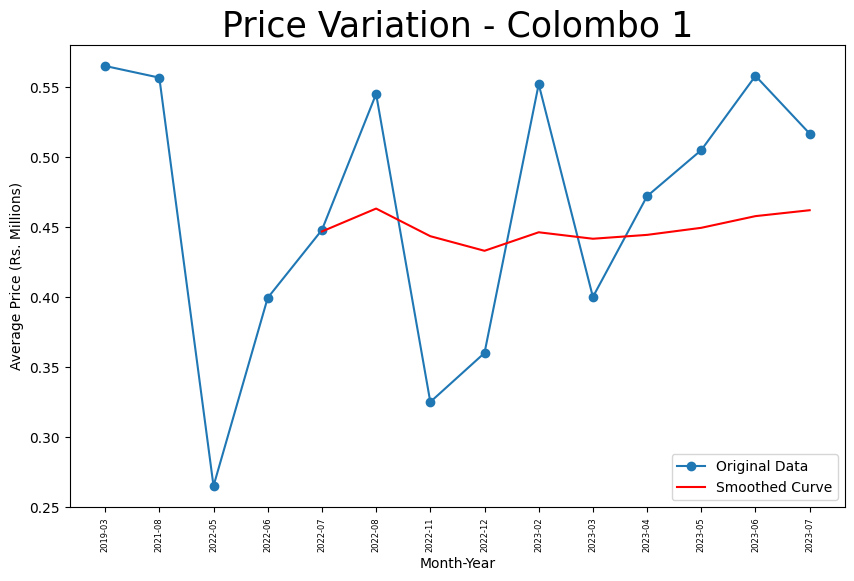

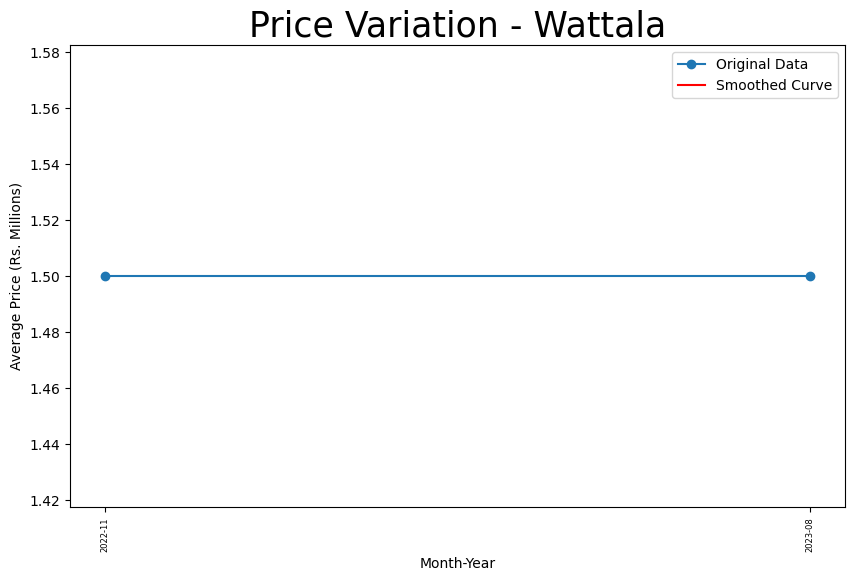

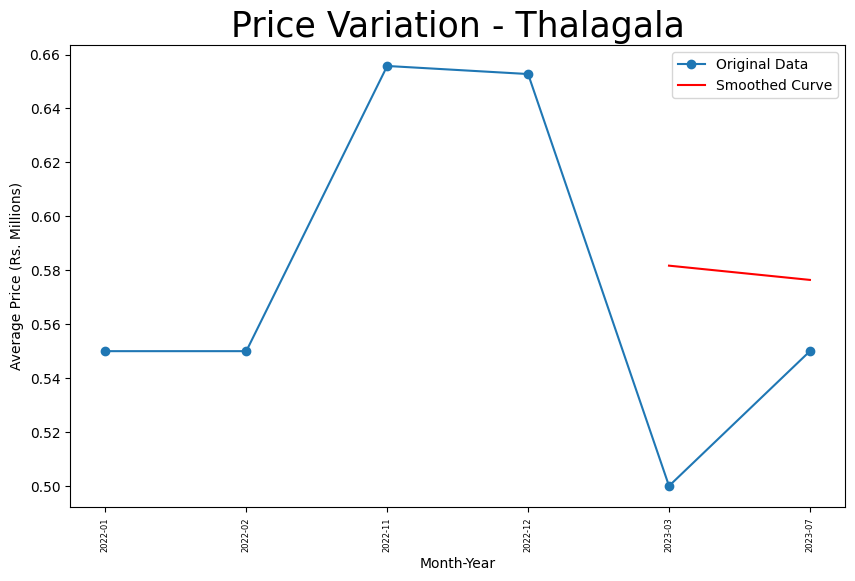

In [39]:
df = price_filtered_df

# Step 1: Convert 'posted_date' to datetime object
df['posted_date'] = pd.to_datetime(df['posted_date'])

df['month_year'] = df['posted_date'].dt.to_period('M')

grouped_data = df.groupby(['main_city', 'month_year'])

mean_prices = grouped_data['price_land_pp'].mean().reset_index()

mean_prices['price_land_pp'] = mean_prices['price_land_pp'] / 1000000

cities = price_filtered_df['main_city'].unique()

for city in cities:
    city_data = mean_prices[mean_prices['main_city'] == city]

    # Calculate moving average (smoothed curve)
    mean_prices.loc[mean_prices['main_city'] == city, 'smoothed_price'] = city_data['price_land_pp'].rolling(window=20, min_periods=5).mean()

    plt.figure(figsize=(10, 6))

    # Plot the original data
    plt.plot(city_data['month_year'].astype(str), city_data['price_land_pp'], marker='o', label='Original Data')

    # Plot the smoothed curve in red
    plt.plot(city_data['month_year'].astype(str), mean_prices.loc[mean_prices['main_city'] == city, 'smoothed_price'], color='red', label='Smoothed Curve')

    plt.title(f'Price Variation - {city}', fontsize=25)
    plt.xlabel('Month-Year')
    plt.ylabel('Average Price (Rs. Millions)')  
    plt.xticks(rotation=90, fontsize=6)
    plt.legend()
    plt.show()